# Milestone 1 - EDA and Preprocessing data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from typing import List, Tuple, Union
from scipy.stats import boxcox
from scipy.stats import probplot

pd.set_option('display.max_columns', None)

In [2]:
dataset_path = './fintech_data_29_52_1008.csv'

In [3]:
fintech_df = pd.read_csv(dataset_path)

# EDA

In [4]:
fintech_df.shape

(27030, 24)

what is does the rows look like?

In [5]:
fintech_df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
1,Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
2,YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
3,YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
4,YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


info regarding the dataset

In [6]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24702 non-null  object 
 2   Emp Length           25198 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1860 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

how many columns have missing values and by how many?

In [7]:
fintech_df.isnull().mean().sort_values(ascending=False)*100

Annual Inc Joint       93.118757
Emp Title               8.612653
Emp Length              6.777654
Int Rate                4.384018
Description             0.813910
State                   0.000000
Purpose                 0.000000
Type                    0.000000
Pymnt Plan              0.000000
Issue Date              0.000000
Grade                   0.000000
Term                    0.000000
Funded Amount           0.000000
Customer Id             0.000000
Loan Amount             0.000000
Loan Id                 0.000000
Tot Cur Bal             0.000000
Avg Cur Bal             0.000000
Addr State              0.000000
Zip Code                0.000000
Verification Status     0.000000
Annual Inc              0.000000
Home Ownership          0.000000
Loan Status             0.000000
dtype: float64

In [8]:
fintech_df.isnull().sum().sort_values(ascending=False)*100

Annual Inc Joint       2517000
Emp Title               232800
Emp Length              183200
Int Rate                118500
Description              22000
State                        0
Purpose                      0
Type                         0
Pymnt Plan                   0
Issue Date                   0
Grade                        0
Term                         0
Funded Amount                0
Customer Id                  0
Loan Amount                  0
Loan Id                      0
Tot Cur Bal                  0
Avg Cur Bal                  0
Addr State                   0
Zip Code                     0
Verification Status          0
Annual Inc                   0
Home Ownership               0
Loan Status                  0
dtype: int64

As you can see 5 columns have missing values which are: Emp Title, Emp Length, Annual Inc Joint, Int Rate, Description

In [9]:
fintech_df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1860.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25845.000000,27030.000000
mean,7.925754e+04,129055.124782,13746.438846,1.445167e+05,135571.697188,15442.939327,15442.939327,0.130702,10.904698
std,7.909597e+04,65960.411187,16785.513307,1.582944e+05,77822.021405,9424.206653,9424.206653,0.048983,6.344409
min,2.230000e+02,22020.000000,0.000000,1.000000e+00,1.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,86000.000000,3128.000000,2.954725e+04,68354.000000,8000.000000,8000.000000,0.091700,6.000000
50%,6.700000e+04,115000.000000,7455.500000,8.160850e+04,136046.000000,13500.000000,13500.000000,0.126100,10.000000
75%,9.500000e+04,154550.000000,19056.750000,2.168390e+05,202992.500000,20400.000000,20400.000000,0.159900,15.000000
max,9.550000e+06,686000.000000,337533.000000,2.752103e+06,270283.000000,40000.000000,40000.000000,0.309900,35.000000


In [10]:
def draw_corr_matrix(df: pd.DataFrame, figsize: tuple = (8, 6)) -> None:
    """
    Draw correlation matrix heatmap for the given dataframe.
    
    Args:
    - df (pd.DataFrame): Input dataframe.
    - figsize (tuple, optional): Figure size. Defaults to (8, 6).

    Returns:
    - None
    """
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

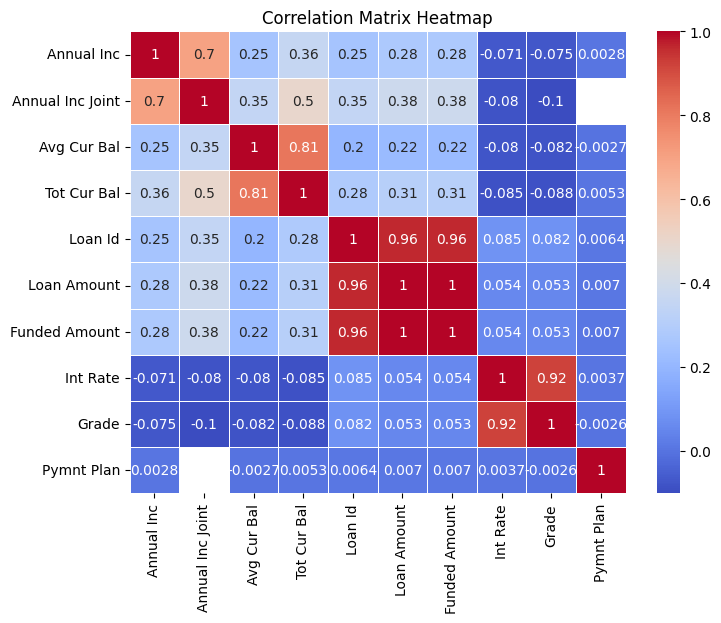

In [11]:
draw_corr_matrix(fintech_df)

Some Insights:
 1. there are no 2 variables negatively correlated
 2. There are some strong positive correlations between 2 variables exceeding 0.9 like (Funded Amount, Loan Id, 0.96) , (Funded Amount, Loan Amount, 1), (Loan Amount, Loan Id, 0.96), (Grade, Int Rate, 0.92)
 3. Some weaker positive correlations that should be mentioned are (Total Cur Bal, Avg Cur Bal, 0.81), (Annual Inc, Annual Inc Joint, 0.7)

### Tidy up column names

In [12]:
fintech_df.columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Annual Inc', 'Annual Inc Joint', 'Verification Status', 'Zip Code',
       'Addr State', 'Avg Cur Bal', 'Tot Cur Bal', 'Loan Id', 'Loan Status',
       'Loan Amount', 'State', 'Funded Amount', 'Term', 'Int Rate', 'Grade',
       'Issue Date', 'Pymnt Plan', 'Type', 'Purpose', 'Description'],
      dtype='object')

In [13]:
fintech_df_2 = fintech_df.copy()

In [14]:
def tidy_up_columns(df: pd.DataFrame)  -> pd.DataFrame:
    """
    Tidy up column names of the given dataframe by lowering the column names and removing any leading/trailing whitespaces.


    Args:
    - df (pd.DataFrame): Input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with tidied column names.
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [15]:
fintech_df_2 = tidy_up_columns(fintech_df_2)

In [16]:
fintech_df_2.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

### Choose Suitable Index

In [17]:
fintech_df_2['customer_id'].nunique() == fintech_df_2.shape[0] 

True

In [18]:
fintech_df_2['customer_id']

0        YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...
1        Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...
2        YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...
3        YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...
4        YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...
                               ...                        
27025    YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YT...
27026    YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XH...
27027    Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceD...
27028    YidsXHgxOVx4OTAjXHhjM0pceGNkKlx4ZDJceDlkXHhlZF...
27029    YickXHgxMVx4MDVceGM3JVx4ZjZGXHhhNllmXHhmNDRceG...
Name: customer_id, Length: 27030, dtype: object

In [19]:
def set_index(col_name: str, df: pd.DataFrame) -> pd.DataFrame:
    """
    Set the specified column as the index of the DataFrame.

    Args:
    col_name (str): The name of the column to be set as the index.
    df (pd.DataFrame): The DataFrame to be modified.

    Returns:
    pd.DataFrame: The modified DataFrame with the specified column as the index.
    """
    
    df = df.set_index(col_name)
    return df

In [20]:
fintech_df_2 = set_index('customer_id', fintech_df_2)

In [21]:
fintech_df_2.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


## Question 1: What is the average loan amount and interest rate by employment length, and does employment stability (e.g., longer employment) correlate with better loan terms (lower interest rates)?

In [22]:
def analyze_loan_terms_by_emp_length(df: pd.DataFrame, emp_length_col: str='emp_length', loan_col: str='loan_amount', int_rate_col: str='int_rate'):
    """
    Analyzes the average loan amount and interest rate by employment length,
    and visualizes any potential correlation between employment stability and loan terms.
    
    Parameters:
    - df: DataFrame containing the loan and employment data.
    - emp_length_col: The column name for employment length (default is 'emp_length').
    - loan_col: The column name for loan amount (default is 'loan_amount').
    - int_rate_col: The column name for interest rate (default is 'int_rate').
    
    Returns:
    - None: Displays bar plots of average loan amount and interest rate by employment length.
    """
    avg_loan_int_by_emp_length = df.groupby(emp_length_col).agg(
        avg_loan_amount=(loan_col, 'mean'),
        avg_interest_rate=(int_rate_col, 'mean')
    ).reset_index()

    avg_loan_int_by_emp_length = avg_loan_int_by_emp_length.sort_values(by=emp_length_col)

    plt.figure(figsize=(12, 5))
    sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_loan_amount', palette="viridis")
    plt.title('Average Loan Amount by Employment Length')
    plt.xlabel('Employment Length')
    plt.ylabel('Average Loan Amount')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_interest_rate', palette="magma")
    plt.title('Average Interest Rate by Employment Length')
    plt.xlabel('Employment Length')
    plt.ylabel('Average Interest Rate (%)')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\001\AppData\Local\Temp\ipykernel_44444\592411899.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_loan_amount', palette="viridis")


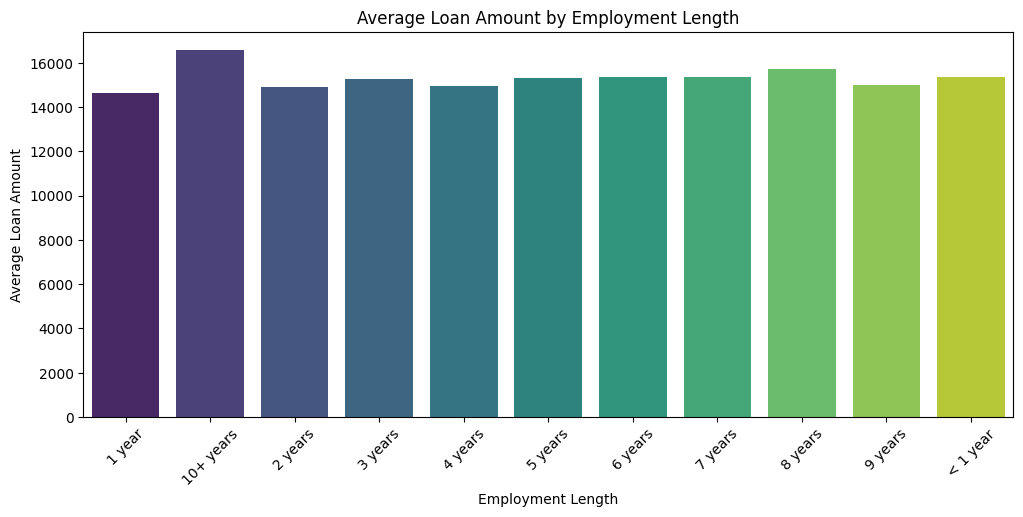

C:\Users\001\AppData\Local\Temp\ipykernel_44444\592411899.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_interest_rate', palette="magma")


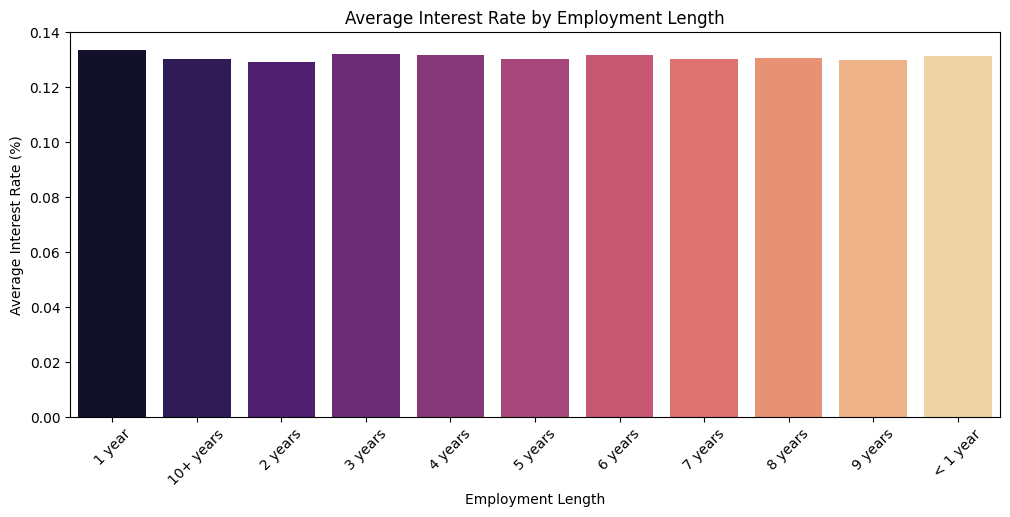

In [23]:
analyze_loan_terms_by_emp_length(fintech_df_2.copy())


Some insights from both plots:

1. The average loan amount appears fairly consistent across different employment lengths, with only slight variations. Notably, those with 10+ years of employment have a slightly higher average loan amount, but the differences across employment lengths are not substantial. This suggests that loan amount may not be strongly influenced by employment stability.
2. Borrowers with `10+ years` of employment tend to receive slightly higher loan amounts, which could indicate a preference among lenders to extend slightly larger loans to individuals with more established employment histories. However, this trend is not strong across other employment lengths.
3. The average interest rate remains nearly uniform across all employment lengths, showing minimal variation. This implies that employment length does not significantly impact the interest rate offered, suggesting that lenders may prioritize other factors over employment stability when determining interest rates.
4. Overall, the data shows that both loan amounts and interest rates are only marginally affected by employment length. This indicates that lenders might rely more on other attributes rather than employment length when assessing loan terms, as stability in employment does not appear to provide a significant advantage in terms of better loan terms

## Question 2: What is the relationship between loan grades and loan statuses (e.g., Default, Fully Paid, Late)? Do higher-grade loans have a lower occurance of negative statuses like defaults or late payments?

In [24]:
def analyze_grade_vs_status(df: pd.DataFrame, grade_col: str = 'grade', status_col: str = 'loan_status') -> None:
    """
    Analyzes the relationship between loan grades and loan statuses and visualizes 
    the distribution of statuses for each grade using a stacked bar chart.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with grade and status columns.
    - grade_col (str): Column name for loan grades (default is 'grade').
    - status_col (str): Column name for loan statuses (default is 'loan_status').
    
    Returns:
    - None: Displays a stacked bar chart showing the distribution of loan statuses by grade.
    """
    grade_mapping = {
        'A': range(1,6),
        'B': range(6,11),
        'C': range(11,16),
        'D': range(16,21),
        'E': range(21,26),
        'F': range(26,31),
        'G': range(31,36)
    }
    def get_grade(x: int):
        for k, v in grade_mapping.items():
            if x in v:
                return k

    df['letter_grade'] = df[grade_col].apply(lambda x: get_grade(x))
    grade_status_counts = df.groupby(['letter_grade', status_col]).size().unstack(fill_value=0)
    grade_status_percentages = grade_status_counts.div(grade_status_counts.sum(axis=1), axis=0) * 100

    grade_status_percentages.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 10))

    plt.title('Distribution of Loan Statuses by Grade')
    plt.xlabel('Loan Grade')
    plt.ylabel('Percentage of Loan Status')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



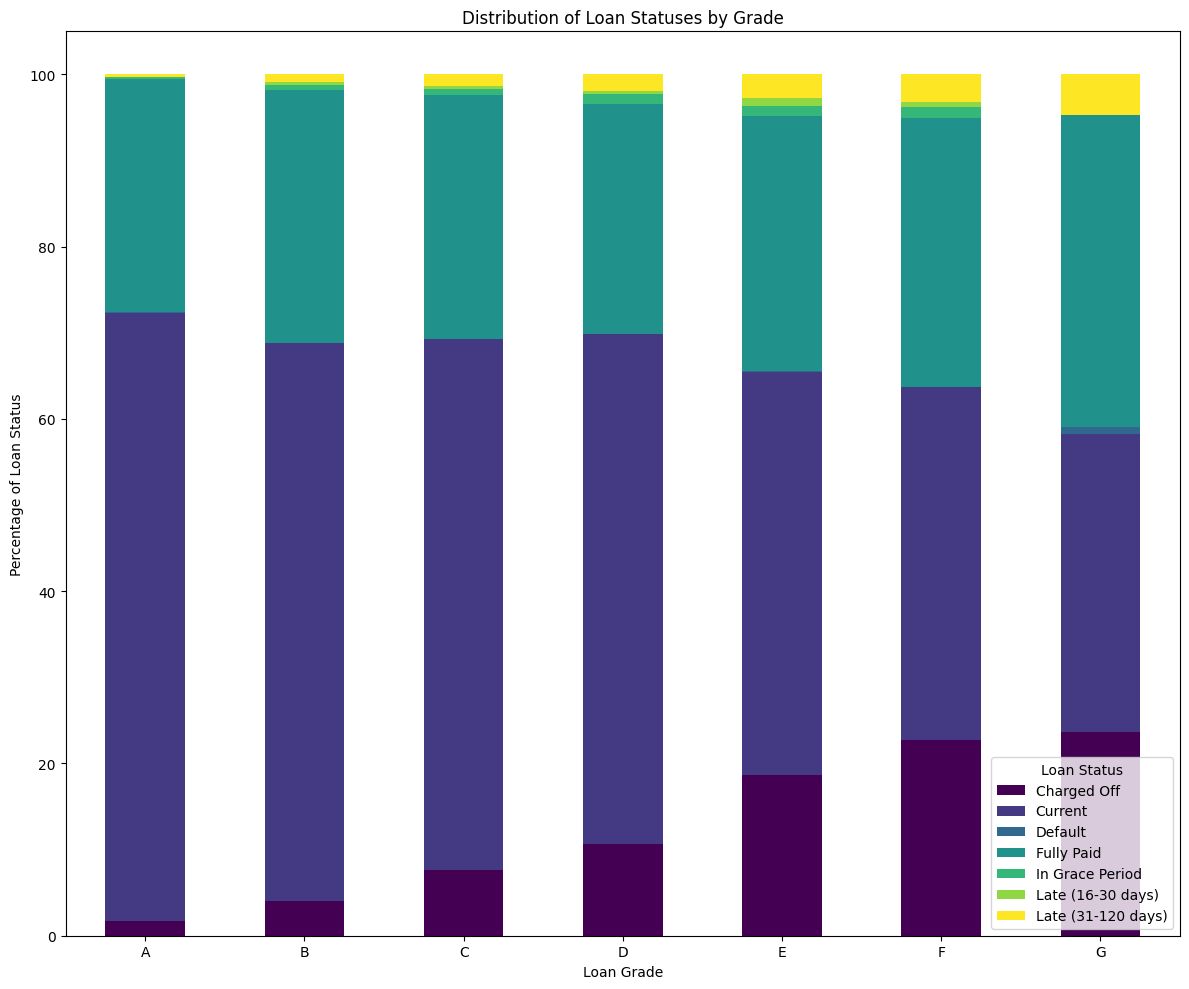

In [25]:
analyze_grade_vs_status(fintech_df_2.copy())

Insights from the Plot
1. Grades F and G have a noticeable increase in "Default" and "Charged Off" statuses, suggesting higher risk.
2. Grades D to G show a slight increase in late payment statuses (both "Late 16-30 days" and "Late 31-120 days") which could indicate that lower-grade loans are also more susceptible to payment delays..
3. The proportion of "Charged Off" increase as we go from grade A to B indicating more loans are considered as bad debt in higher grades.
4. The proportion of "Current" decrease as we go from grade A to B indicating more loans are actively being paid off in lower grades.



#### More exploration: How does the loan term (36 vs. 60 months) impact the relationship between loan grades and loan statuses (e.g., Default, Fully Paid, Late)? Specifically, do loans with longer terms have a higher incidence of negative statuses (such as defaults or late payments) within each loan grade? Additionally, is the effect of loan term on loan status more pronounced in lower grades?

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_grade_status_by_term(
    df: pd.DataFrame, 
    grade_col: str = 'grade', 
    status_col: str = 'loan_status', 
    term_col: str = 'term'
) -> None:
    """
    Analyzes the relationship between loan grades, loan statuses, and loan terms,
    and visualizes the distribution of statuses for each grade and term combination
    using stacked bar charts.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with grade, status, and term columns.
    - grade_col (str): Column name for loan grades (default is 'grade').
    - status_col (str): Column name for loan statuses (default is 'loan_status').
    - term_col (str): Column name for loan terms (default is 'loan_term').

    Returns:
    - None: Displays stacked bar charts showing the distribution of loan statuses by grade for each term.
    """
    grade_mapping = {
        'A': range(1, 6),
        'B': range(6, 11),
        'C': range(11, 16),
        'D': range(16, 21),
        'E': range(21, 26),
        'F': range(26, 31),
        'G': range(31, 36)
    }
    
    def get_grade(x: int):
        for k, v in grade_mapping.items():
            if x in v:
                return k
    
    df['letter_grade'] = df[grade_col].apply(lambda x: get_grade(x))
    
    for term in df[term_col].unique():
        term_data = df[df[term_col] == term]
        grade_status_counts = term_data.groupby(['letter_grade', status_col]).size().unstack(fill_value=0)
        grade_status_percentages = grade_status_counts.div(grade_status_counts.sum(axis=1), axis=0) * 100

        grade_status_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
        
        plt.title(f'Distribution of Loan Statuses by Grade for {term} Term')
        plt.xlabel('Loan Grade')
        plt.ylabel('Percentage of Loan Status')
        plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()




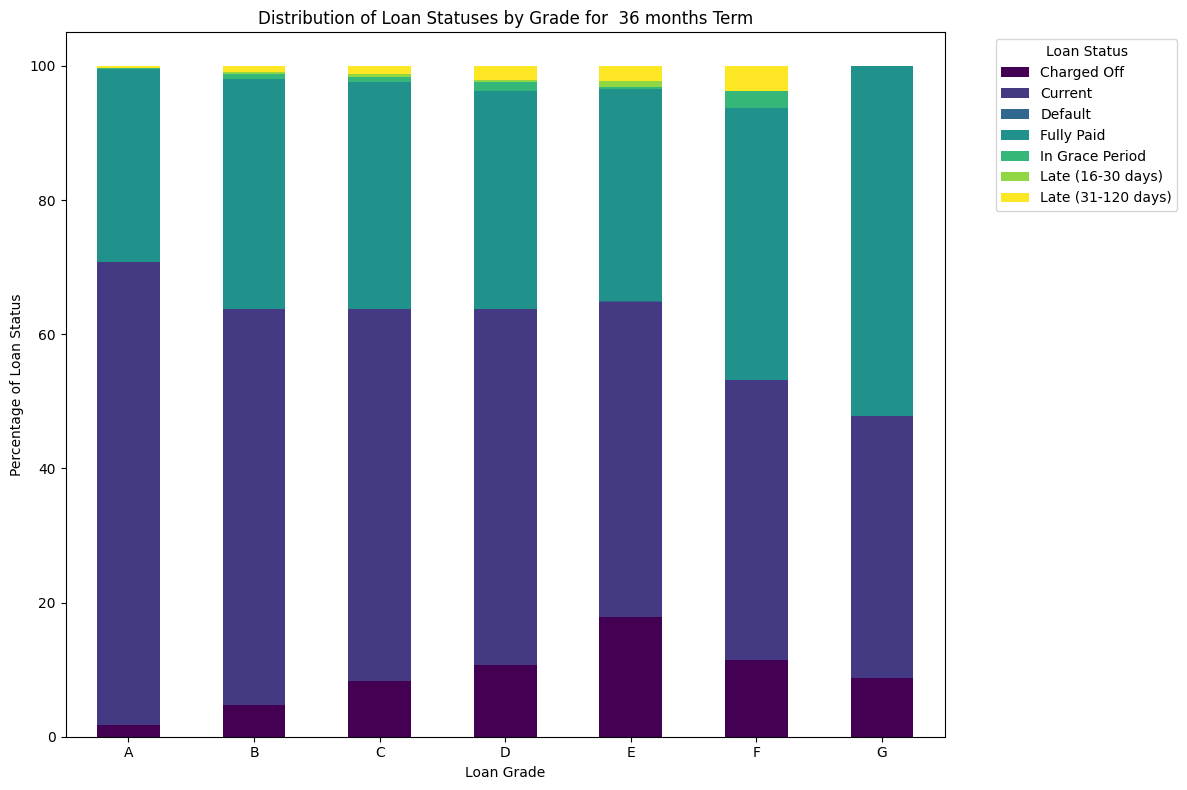

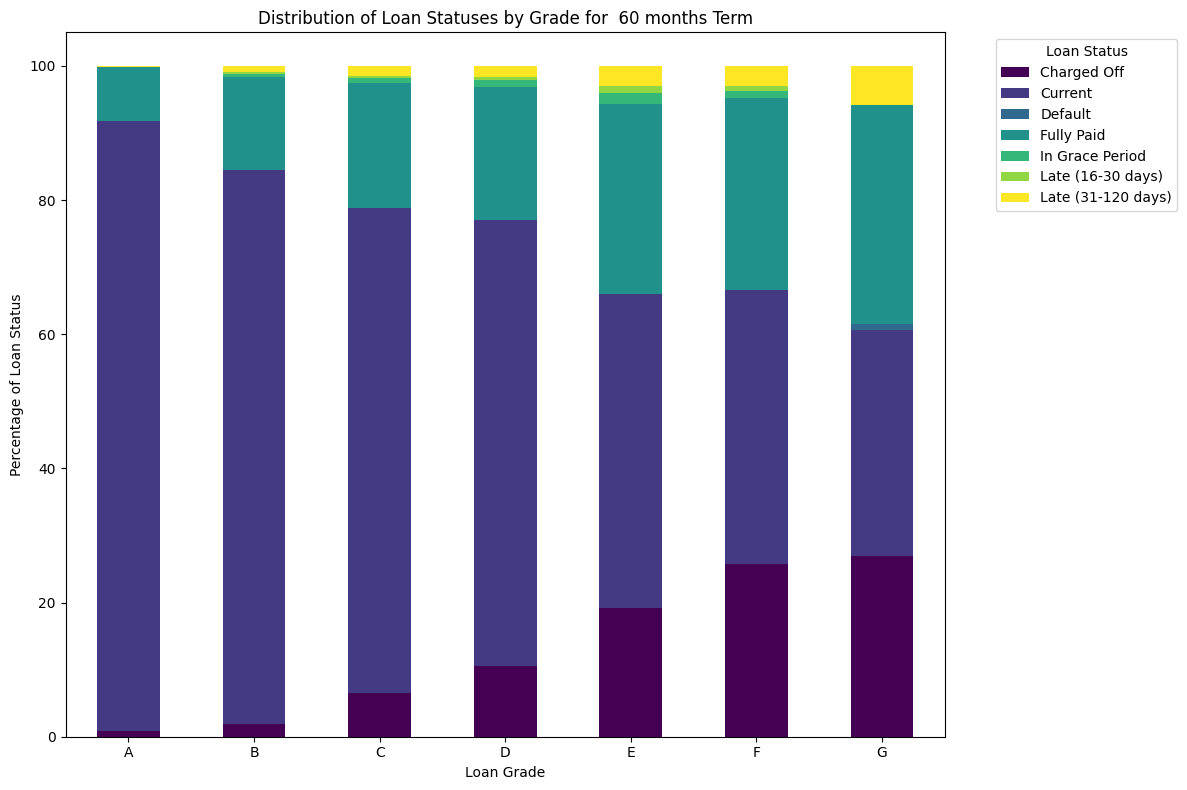

In [27]:
analyze_grade_status_by_term(fintech_df_2.copy())

Here are some insights from this graph, which shows the distribution of loan statuses by grade for 36-month loan terms:

1. As grades go from A to G the `Fully Paid` status proportion increases in general which indicates that people in low grades are more likely to pay their loans back may be due to fear of facing charges.

2. Grades D to G show a noticeable increase in the `Charged Off` and `Default` statuses. This trend indicates that loans with lower grades have a higher likelihood of becoming bad debts. As the grade decreases from D to G, the risk of default or charge-off becomes more prominent.

3. The percentage of loans that are in the `Current` status decreases as you move from higher grades (A and B) to lower grades (F and G). This could imply that borrowers in lower grades are more likely to fall behind on payments.

4. Late payments (both `Late 16-30 days` and `Late 31-120 days`) are slightly more prevalent in lower grades (D to F) compared to higher grades. This trend suggests that borrowers with lower credit grades may struggle more with timely payments.

5. Overall, the graph indicates a clear relationship between loan grade and loan performance. Higher grades (A and B) tend to perform better with fewer negative statuses, while lower grades (D to G) have a higher proportion of defaults, charge-offs, and late payments. This pattern is consistent with the risk associated with loan grading systems, where higher grades represent lower risk.

Here are some insights from the graph showing the distribution of loan statuses by grade for 60-month loan terms:

1. For longer 60-month loans, lower grades (E, F, G) show a significant proportion of `Charged Off` loans. This pattern suggests a strong correlation between lower grades and the likelihood of loans not being paid back over longer terms. Borrowers with lower grades struggle more to fulfill longer-term obligations.

2. As grades go from A to G the `Fully Paid` status proportion increases in general which indicates that people in low grades are more likely to pay their loans back may be due to fear of facing charges.

3. There is a noticeable presence of late payments (both `Late 16-30 days` and `Late 31-120 days`) in the lowest grades (F and G). This indicates that borrowers with the lowest grades are not only more likely to default but also more likely to have trouble making timely payments.

4. The percentage of loans that are in the `Current` status decreases as you move from higher grades (A and B) to lower grades (F and G). This could imply that borrowers in lower grades are more likely to fall behind on payments.

Comparing this to the 36-month term distribution, it’s clear that the 60-month term amplifies risk across all grades, particularly for lower grades (D-G), with a notable increase in `Charged Off` and `Late` statuses. This suggests that longer terms increase the likelihood of payment challenges, especially for lower-grade borrowers. However, both loan terms have similar trends in terms of all statuses vs grade distribution. The main difference is the increased risk associated with longer loan terms. 


## Question 3: How does the loan default rate vary across different loan purposes and income levels? Is there a specific purpose or income bracket associated with a higher likelihood of default?

In [28]:
def analyze_loan_status_by_purpose_and_income(
    df: pd.DataFrame, 
    income_col: str = 'annual_inc', 
    purpose_col: str = 'purpose', 
    status_col: str = 'loan_status', 
    statuses: List[str] = None
) -> None:
    """
    Analyzes the distribution of each loan status across different loan purposes and income levels,
    and visualizes it using a heatmap for each loan status.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with income, purpose, and status columns.
    - income_col (str): Column name for income (default is 'annual_inc').
    - purpose_col (str): Column name for loan purpose (default is 'purpose').
    - status_col (str): Column name for loan statuses (default is 'loan_status').
    - statuses (List[str]): List of loan statuses to analyze. If None, analyzes all unique statuses.

    Returns:
    - None: Displays heatmaps showing the distribution of each loan status by loan purpose and income level.
    """
    low_income_threshold = df[income_col].quantile(0.33)
    high_income_threshold = df[income_col].quantile(0.66)

    def categorize_income(income: float) -> str:
        if income <= low_income_threshold:
            return 'Low'
        elif income <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    df['income_level'] = df[income_col].apply(categorize_income)

    if statuses is None:
        statuses = df[status_col].unique()

    for status in statuses:
        df[f'is_{status}'] = df[status_col].apply(lambda x: 1 if x == status else 0)

        status_rate = df.groupby([purpose_col, 'income_level'])[f'is_{status}'].mean().unstack(fill_value=0) * 100

        plt.figure(figsize=(12, 8))
        sns.heatmap(status_rate, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': f'{status} Rate (%)'})
        plt.title(f'{status} Rate by Loan Purpose and Income Level')
        plt.xlabel('Income Level')
        plt.ylabel('Loan Purpose')
        plt.tight_layout()
        plt.show()

        df.drop(columns=[f'is_{status}'], inplace=True)


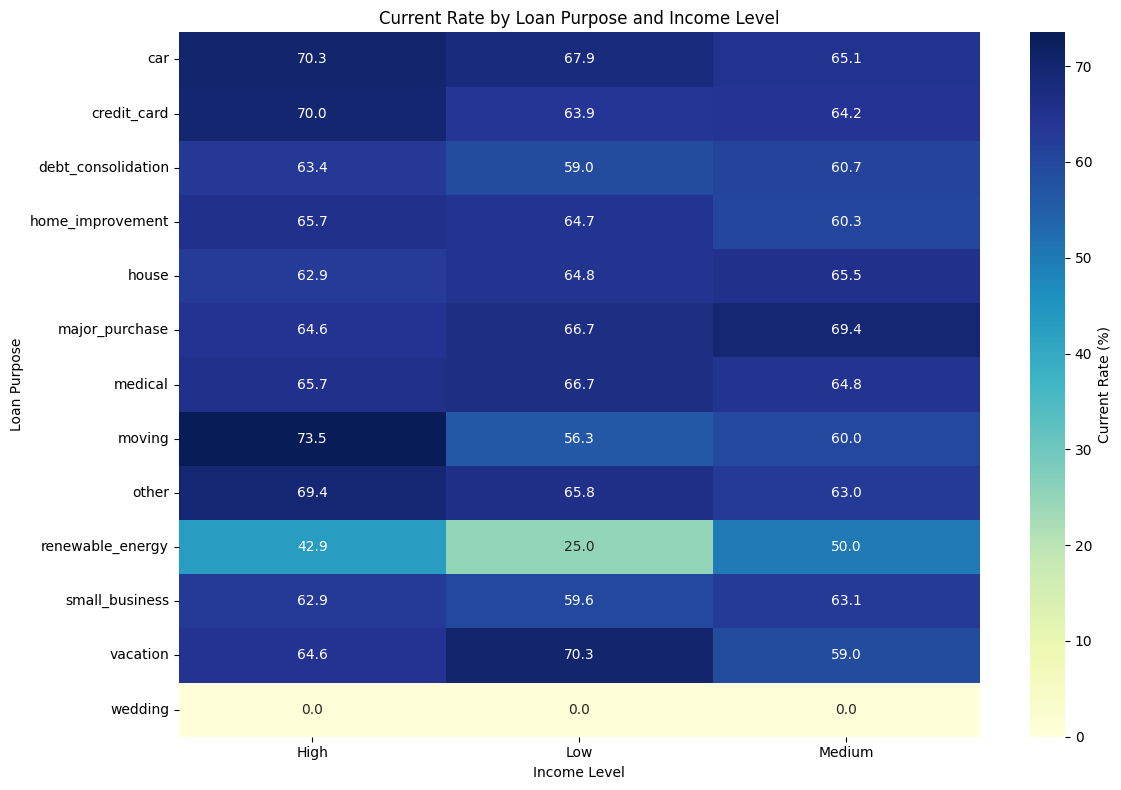

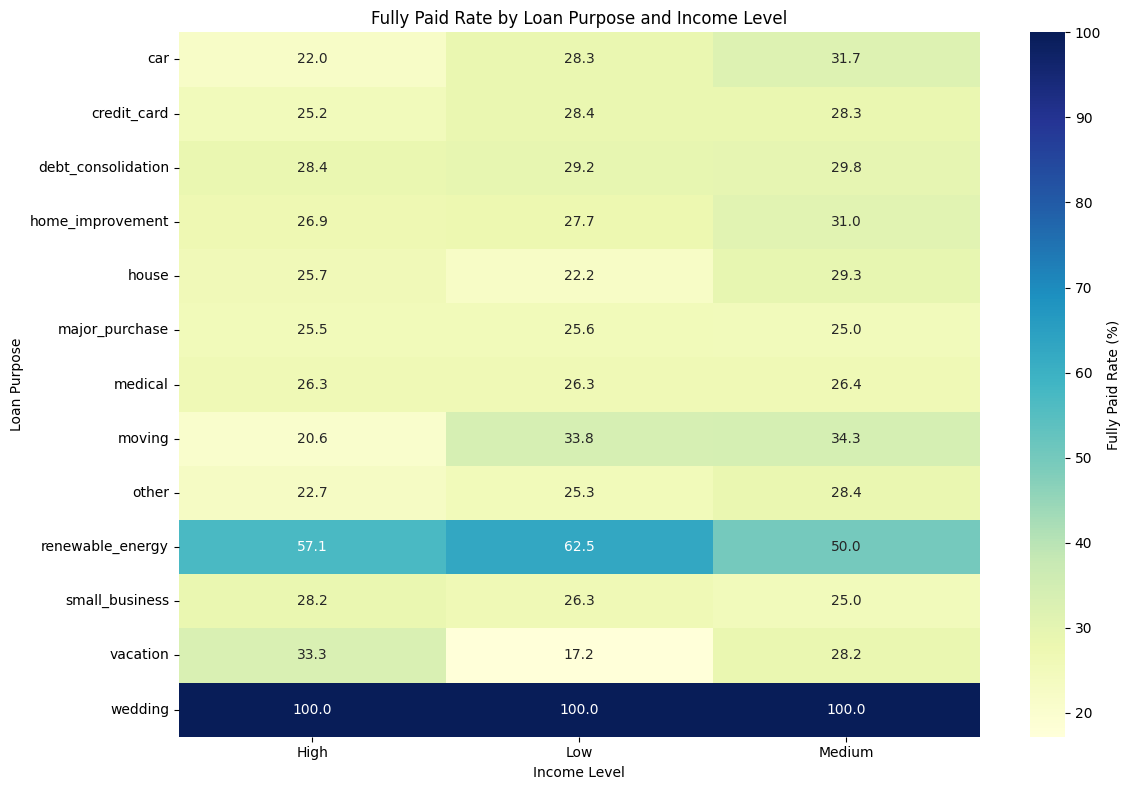

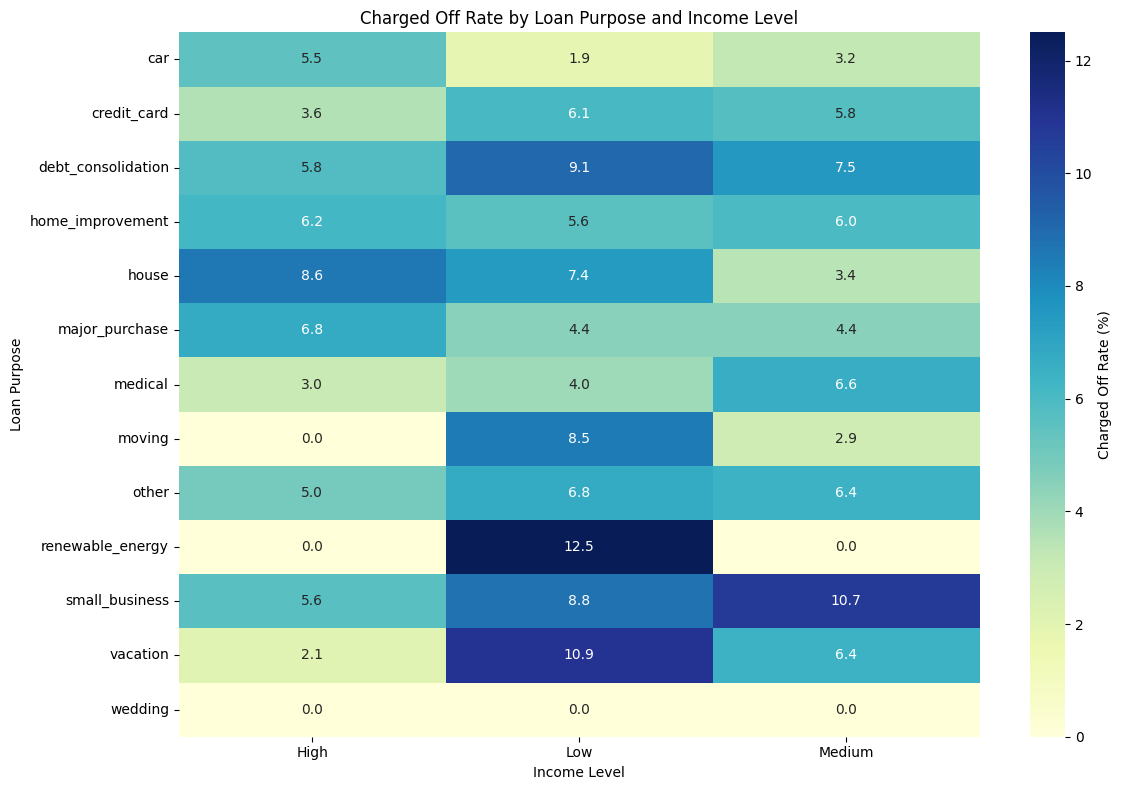

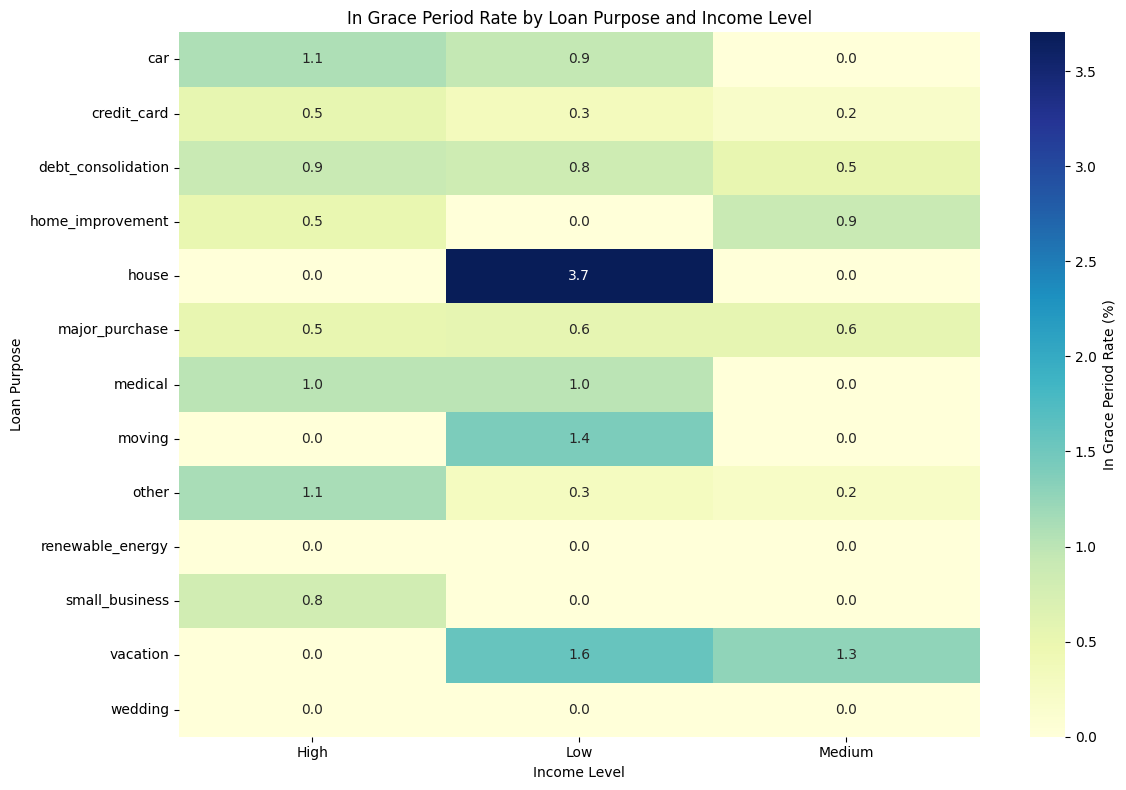

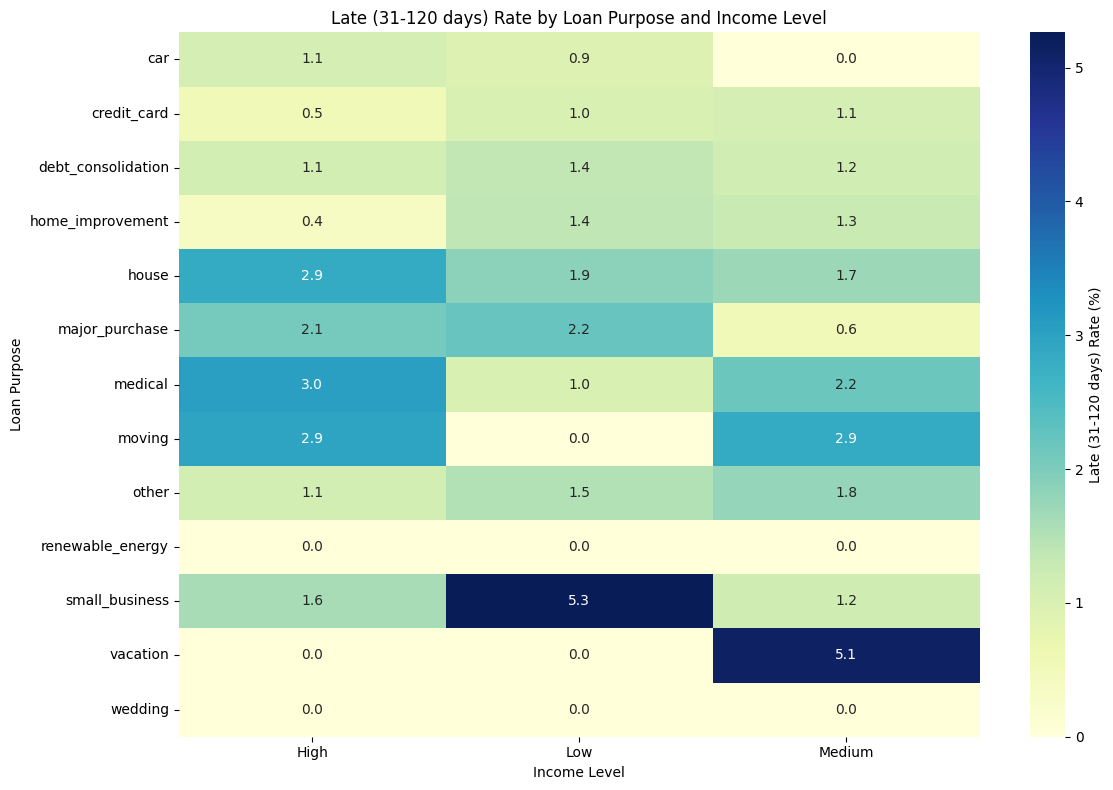

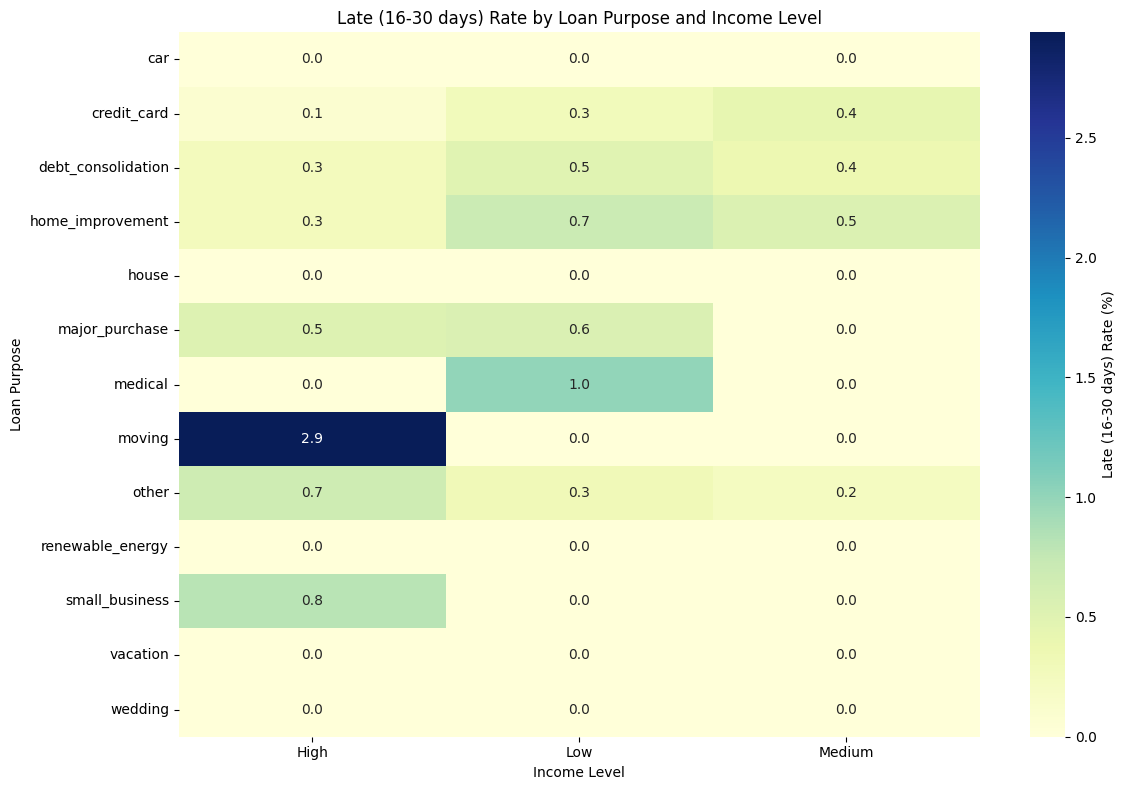

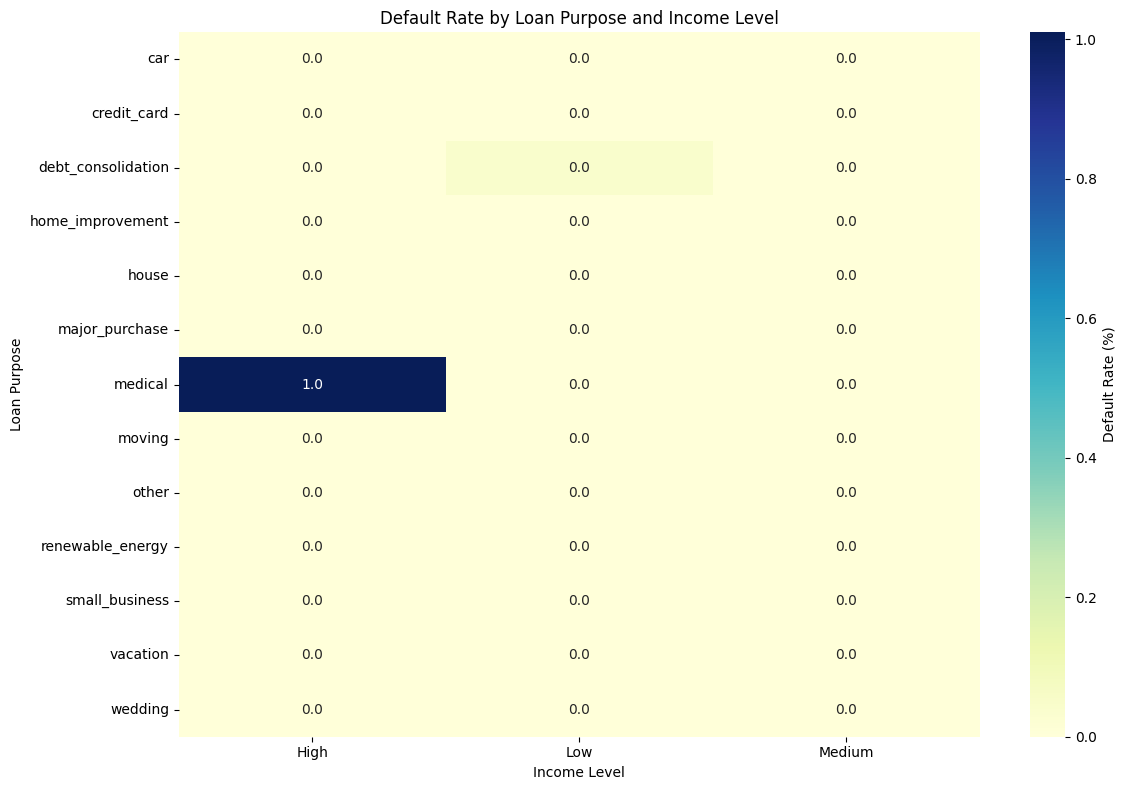

In [29]:
analyze_loan_status_by_purpose_and_income(fintech_df_2.copy())

Insights:
1. Current Rate by Loan Purpose and Income Level
    - The "Current" rate is relatively high across most purposes and income levels, indicating active loans.
    - "Renewable energy" loans have a lower "Current" rate, particularly for low and high income levels, suggesting potential payment delays or non-standard repayment behavior in this category.

2. Fully Paid Rate by Loan Purpose and Income Level
    - The "Fully Paid" rate is highest for "wedding" loans, reaching 100% across all income levels, indicating a strong repayment behavior for wedding loans.
    - "Renewable energy" loans also show a relatively high "Fully Paid" rate, particularly in low income (62.5%) and high income (57.1%) levels, indicating better repayment in these segments.

3. Charged Off Rate by Loan Purpose and Income Level
    - "Debt consolidation" and "Renewable Energy" loans in the low-income bracket show a higher "Charged Off" rate (9.1%) and (12.5%) respectively, suggesting increased risk for this purpose in the low-income category.
    - "Small business" loans in low and medium income levels also show elevated "Charged Off" rates, indicating a potential riskier profile for these groups

4. In Grace Period Rate by Loan Purpose and Income Level
    - The "In Grace Period" rate is relatively low across most categories, indicating limited short-term payment delays.
    - "House" loans in the low-income category have a notable grace period rate (3.7%), suggesting that borrowers may face some challenges in maintaining consistent payments.

5. Late (31-120 Days) Rate by Loan Purpose and Income Level
   - Overall the rates indicate that few people are late (31-120 days) for payments.
   - "Small business" loans in the low-income group also have a higher late rate, indicating challenges with loan repayment in this category.
  
6. Late (16-30 Days) Rate by Loan Purpose and Income Level
   - "Moving" loans in the high-income category have a higher rate of being late within 16-30 days (2.9%), suggesting possible short-term cash flow issues.
   - All categories show very low late rates, indicating not many borrowers are experiencing short-term payment difficulties.

  
7. Default Rate by Loan Purpose and Income Level
   - "Medical" loans show a default rate of 1% in the high-income group, which is notable as this is the only significant default observed across all categories.
   - The almost zero default rates across other purposes and income levels suggest that outright default is relatively rare in this dataset.

## Question 4: How does the average loan amount vary by state and income level? Are there certain states where lower-income borrowers are more likely to take out larger loans compared to other states?

In [30]:
def analyze_loan_amount_by_state_and_income(
    df: pd.DataFrame, 
    state_col: str = 'addr_state', 
    income_col: str = 'annual_inc', 
    loan_col: str = 'loan_amount'
) -> None:
    """
    Analyzes the average loan amount by state and income level, 
    and visualizes it using a heatmap.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with state, income, and loan amount columns.
    - state_col (str): Column name for state (default is 'addr_state').
    - income_col (str): Column name for income (default is 'annual_inc').
    - loan_col (str): Column name for loan amount (default is 'loan_amnt').

    Returns:
    - None: Displays a heatmap showing the average loan amount by state and income level.
    """
    low_income_threshold = df[income_col].quantile(0.33)
    high_income_threshold = df[income_col].quantile(0.66)

    def categorize_income(income: float) -> str:
        if income <= low_income_threshold:
            return 'Low'
        elif income <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    df['income_level'] = df[income_col].apply(categorize_income)

    avg_loan_by_state_income = df.groupby([state_col, 'income_level'])[loan_col].mean().unstack(fill_value=0)

    plt.figure(figsize=(15, 15))
    sns.heatmap(avg_loan_by_state_income, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Loan Amount ($)'})
    plt.title('Average Loan Amount by State and Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()


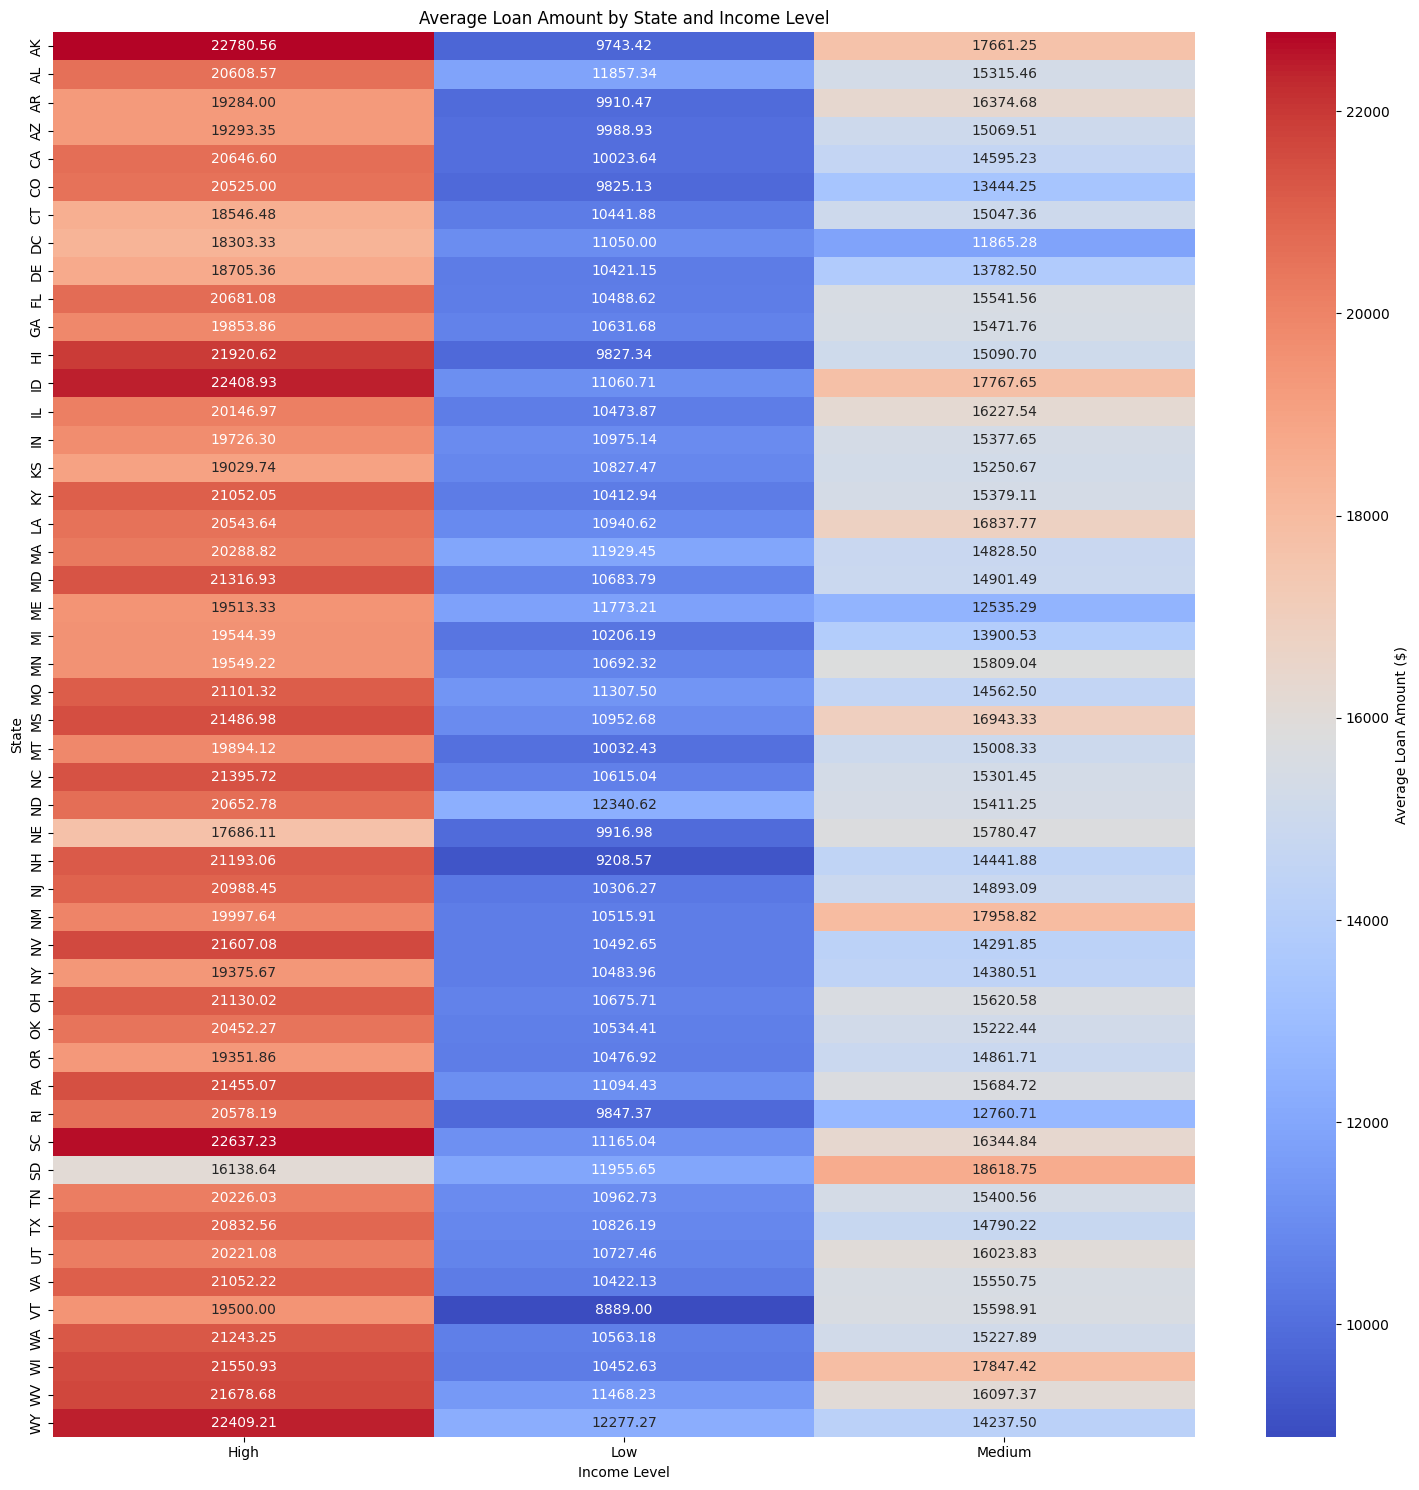

In [31]:
analyze_loan_amount_by_state_and_income(fintech_df_2.copy())

Here are some insights based on the heatmap showing the average loan amount by state and income level:

1. In general, high-income borrowers tend to have the highest average loan amounts across most states. This trend suggests that borrowers with higher income levels are more likely to take out larger loans, likely due to their greater repayment capacity and possibly higher creditworthiness.

2. There are certain states where low-income borrowers still have relatively high average loan amounts, such as Wisconsin (WI), South Dakota (SD) and New Mexico (NM). This could indicate higher living costs or greater loan needs in those states for low-income individuals, prompting them to take on larger loans than low-income borrowers in other states.

3. States like Wisconsin (WI), Idaho (ID), and South Carolina (SC) consistently show higher average loan amounts across all income levels. This could reflect the overall higher cost of living or financial demands in these areas, prompting borrowers to take larger loans regardless of income level.

4. For medium-income borrowers, the loan amounts are generally lower compared to high-income borrowers, but there’s some variation by state. States like New York (NY), New Jersey (NJ) and South Dakota (SD) show slightly higher average loan amounts for medium-income levels compared to other states, indicating regional economic factors or cost-of-living considerations.

## Question 5: Which states have the highest average loan amounts coupled with high rates of bad debt (defined as loans in default or charged-off status)?

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_high_risk_states(
    df: pd.DataFrame, 
    loan_col: str = 'loan_amount', 
    status_col: str = 'loan_status', 
    high_loan_threshold: float = None, 
    bad_debt_statuses: list = ['Default', 'Charged Off']
) -> pd.DataFrame:
    """
    Identifies states with both high average loan amounts and high bad debt rates (default or charged off).
    Additionally, visualizes these states on a scatter plot.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data.
    - loan_col (str): Column name for loan amount (default is 'loan_amnt').
    - status_col (str): Column name for loan status (default is 'loan_status').
    - high_loan_threshold (float): Threshold for defining high loan amounts. If None, it is set to the dataset's 66th percentile.
    - bad_debt_statuses (list): List of statuses indicating bad debts (default is ['Default', 'Charged Off']).

    Returns:
    - pd.DataFrame: DataFrame with states ranked by average loan amount and bad debt rate.
    """
    if high_loan_threshold is None:
        high_loan_threshold = df[loan_col].quantile(0.50)
    
    df['is_bad_debt'] = df[status_col].apply(lambda x: 1 if x in bad_debt_statuses else 0)

    state_summary = df.groupby('addr_state').agg(
        bad_debt_rate=('is_bad_debt', 'mean'),
        avg_loan_amount=(loan_col, 'mean')
    ).reset_index()

    state_summary = state_summary.sort_values(by=['bad_debt_rate', 'avg_loan_amount'], ascending=[False, False]).reset_index(drop=True)

    high_risk_states = state_summary[
        (state_summary['avg_loan_amount'] >= high_loan_threshold) &
        (state_summary['bad_debt_rate'] > state_summary['bad_debt_rate'].mean())
    ]

    high_risk_states = high_risk_states.sort_values(by=['bad_debt_rate', 'avg_loan_amount'], ascending=[False, False]).reset_index(drop=True)
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=state_summary, x='avg_loan_amount', y='bad_debt_rate', hue=(state_summary['addr_state'].isin(high_risk_states['addr_state'])),
                    palette={True: 'red', False: 'blue'}, legend=False)
    
    for _, row in state_summary.iterrows():
        is_in_high_risk = row['addr_state'] in high_risk_states['addr_state'].values
        plt.text(row['avg_loan_amount'], row['bad_debt_rate'], row['addr_state'], horizontalalignment='right', fontsize=10, color='darkred' if is_in_high_risk else 'blue')

    plt.axvline(x=high_loan_threshold, color='grey', linestyle='--', label='High Loan Threshold')
    plt.axhline(y=state_summary['bad_debt_rate'].mean(), color='grey', linestyle='--', label='Average Bad Debt Rate')

    plt.title('Average Loan Amount vs. Bad Debt Rate by State')
    plt.xlabel('Average Loan Amount ($)')
    plt.ylabel('Bad Debt Rate (%)')
    plt.legend(['High Loan Threshold', 'Average Bad Debt Rate'])
    plt.tight_layout()
    plt.show()

    return state_summary, high_risk_states



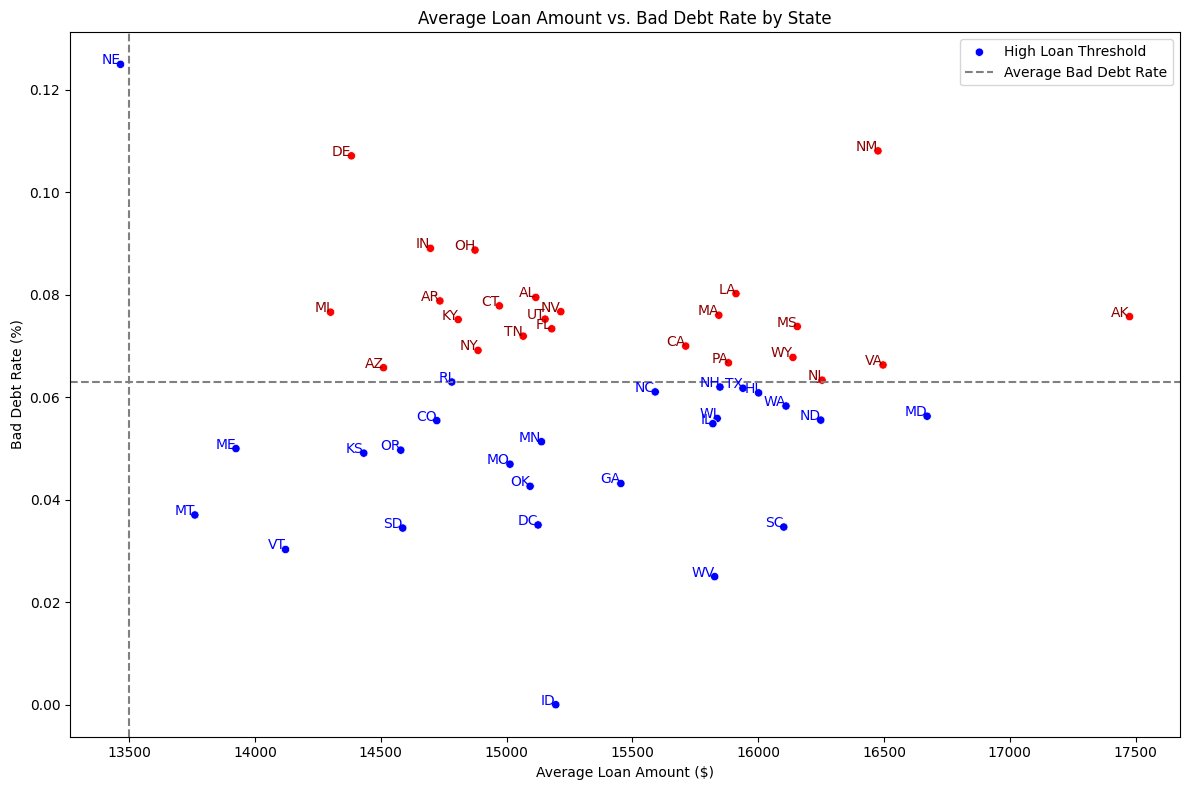

In [33]:
state_summary, high_risk_states = analyze_high_risk_states(fintech_df_2.copy())

In [34]:
high_risk_states

,addr_state,bad_debt_rate,avg_loan_amount
0,NM,0.108108,16476.182432
1,DE,0.107143,14383.035714
2,IN,0.089087,14697.104677
3,OH,0.088745,14874.431818
4,LA,0.080247,15911.805556
5,AL,0.079511,15116.055046
6,AR,0.078818,14734.852217
7,CT,0.077859,14971.228710
8,NV,0.076726,15215.473146
9,MI,0.076623,14300.129870


Insights for the df and the plot:

1. States in red represent those that meet the criteria for high average loan amounts and higher-than-average bad debt rates. These states have bad debt rates above the overall average, indicating increased financial risk.

2. Many high-risk states, like New Mexico (NM) and Delaware (DE), have particularly high bad debt rates (>= 10%) compared to others. These states also have moderate to high average loan amounts, suggesting that larger loans might correlate with higher bad debt in certain regions. Delaware (DE) has a high bad debt rate (10.71%) and a lower average loan amount ($14,383), but its rate suggests potential risk.
Indiana (IN) and Ohio (OH) follow NM and DE with bad debt rates close to 9%, indicating consistent repayment challenges.
   
3. Blue points represent states with lower bad debt rates or lower average loan amounts. For example,  West Virginia (WV) and Idaho (ID) despite having a relatively high loan amount, has a very low bad debt rate. This may indicate lower financial risk in that state despite high borrowing amounts.

4. Nebraska (NE) has the highest bad debt rate but still one of the lowest avg loan amount so that's why it's in blue.

In [35]:
state_summary

,addr_state,bad_debt_rate,avg_loan_amount
0,NE,0.125000,13465.178571
1,NM,0.108108,16476.182432
2,DE,0.107143,14383.035714
3,IN,0.089087,14697.104677
4,OH,0.088745,14874.431818
5,LA,0.080247,15911.805556
6,AL,0.079511,15116.055046
7,AR,0.078818,14734.852217
8,CT,0.077859,14971.228710
9,NV,0.076726,15215.473146


## Question 6: What is the distribution of loan amounts across different loan statuses?

In [36]:
def draw_boxplot_for_two_columns(col_name_1: str, col_name_2: str, df: pd.DataFrame):
    """
    Draw a boxplot for the relationship between two columns in the given dataframe.

    Args:
    col_name_1 (str): The name of the first column.
    col_name_2 (str): The name of the second column.
    df (pd.DataFrame): The dataframe containing the columns to be plotted.
    """
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col_name_1, y=col_name_2, data=df)
    plt.title(f'{col_name_1} vs {col_name_2}')
    plt.xlabel(col_name_1, fontsize=12)
    plt.ylabel(col_name_2, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

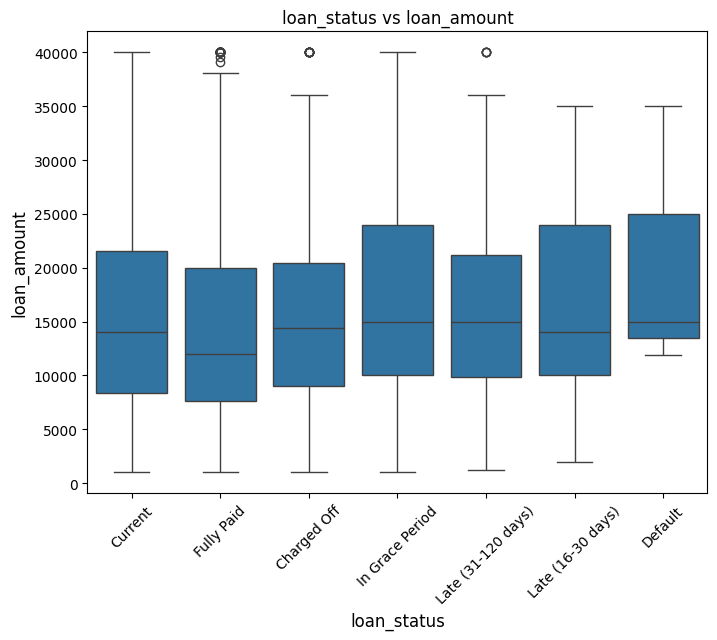

In [37]:
draw_boxplot_for_two_columns('loan_status', 'loan_amount', fintech_df_2.copy())

In [38]:
def get_loan_amount_for_each_status(df: pd.DataFrame) -> pd.Series:
    """
    This function takes a pandas DataFrame as input and returns a pandas Series where each index is a loan
    status and the corresponding value is the total loan amount for that status.

    Args:
    df (pd.DataFrame): A pandas DataFrame containing loan data.

    Returns:
    pd.Series: A pandas Series where each index is a loan status and the corresponding value is the
    total loan amount for that status.
    """
    
    loan_amount = df.groupby('loan_status')['loan_amount'].sum().sort_values(ascending=False)
    return loan_amount

In [39]:
get_loan_amount_for_each_status(fintech_df_2.copy())

loan_status
Current               272381825.0
Fully Paid            107814475.0
Charged Off            27742925.0
Late (31-120 days)      5053900.0
In Grace Period         2863825.0
Late (16-30 days)       1503800.0
Default                   61900.0
Name: loan_amount, dtype: float64

#### Insights from Loan Amount Distribution by Loan Status

- **Current loans** have the highest total loan amount, summing to approximately \$272.4 million. This indicates that the majority of loans are still in progress and have not yet reached a conclusion, whether paid off, late, or defaulted.
- **Fully Paid loans** make up the second-largest share, with \$107.8 million in total. This is a positive sign of a significant portion of loans being repaid successfully.
- **Charged Off loans** represent \$27.7 million in total, indicating a notable amount of loans that have been written off due to the borrower's inability to repay.
- **Late loans** (31-120 days late) account for \$5.05 million, while **Late loans** (16-30 days late) total only \$1.5 million. This suggests that most late loans are significantly overdue.
- **In Grace Period loans** make up \$2.86 million. This represents loans that are temporarily delinquent but have a grace period for repayment.
- **Defaulted loans** are the smallest category, totaling just \$61,900. This is a good indication that defaults are rare, but these loans are likely beyond recovery.
  
#### Observations from the Boxplot:
- **Fully Paid loans** have a slightly lower median loan amount than other statuses, indicating that borrowers with smaller loans may be more likely to repay fully.
- There are outliers in categories like **Fully Paid** and **Charged Off**, representing significantly larger loans compared to the majority.


In [40]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

## Question 7: What is the distribution of loan amounts across different income levels?

In [41]:
def plot_loan_amount_by_income_level(df: pd.DataFrame, 
                                     income_col: str='annual_inc', 
                                     loan_col: str='loan_amount', 
                                     low_quantile: int=0.33,
                                     high_quantile: int=0.66):
    """
    Categorizes income levels into 'Low', 'Medium', and 'High' based on quantiles, 
    and plots a box plot of loan amounts by income level.
    
    Parameters:
    - data: DataFrame containing the income and loan columns
    - income_col: The column name for income (default is 'annual_inc')
    - loan_col: The column name for loan amount (default is 'loan_amount')
    
    Returns:
    - None: Displays the box plot
    """
    # Define income quantiles for categorizing income levels
    low_income_threshold = df[income_col].quantile(low_quantile)
    high_income_threshold = df[income_col].quantile(high_quantile)

    # Categorize income levels
    def categorize_income(inc):
        if inc <= low_income_threshold:
            return 'Low'
        elif inc <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    # Apply categorization to create a new column for income levels
    df['income_level'] = df[income_col].apply(categorize_income)
    df['income_level'] = pd.Categorical(df['income_level'], categories=['Low', 'Medium', 'High'], ordered=True)
    for level in ['Low', 'Medium', 'High']:
        min_income = df[df['income_level'] == level][income_col].min()
        max_income = df[df['income_level'] == level][income_col].max()
        print(f"{level} Income Level: Min = {min_income}, Max = {max_income}")

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(x='income_level', y=loan_col, data=df, palette='viridis')

    # Add labels and title
    plt.xlabel('Income Level')
    plt.ylabel('Loan Amount')
    plt.title('Distribution of Loan Amounts by Income Level')

    # Show the plot
    plt.show()


Low Income Level: Min = 223.0, Max = 53000.0
Medium Income Level: Min = 53040.0, Max = 82000.0
High Income Level: Min = 82041.0, Max = 9550000.0


C:\Users\001\AppData\Local\Temp\ipykernel_44444\3286803330.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_level', y=loan_col, data=df, palette='viridis')


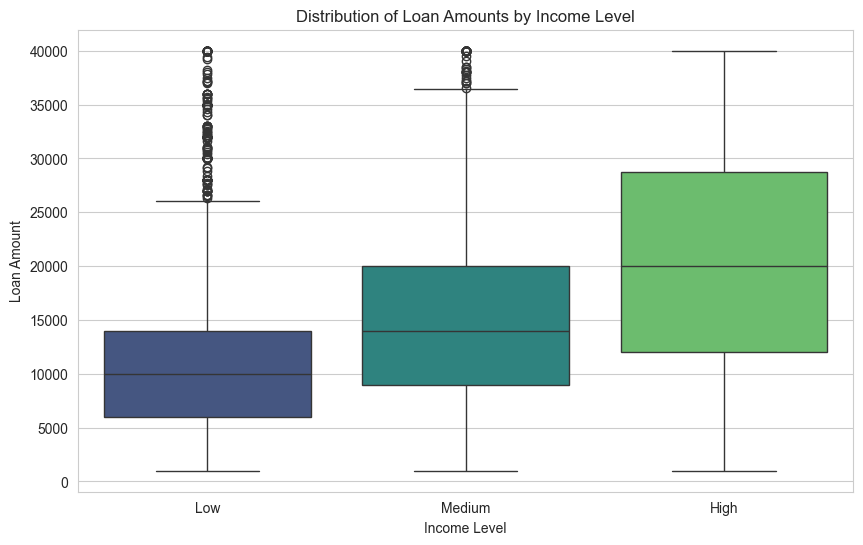

In [42]:
plot_loan_amount_by_income_level(fintech_df_2.copy())

From this box plot, we can observe the following insights:
1. Loan Amount Increases with Income Level: Higher income levels generally correspond to larger loan amounts, as shown by the upward shift in the median loan amount across "Low," "Medium," and "High" income groups.

2. Variability in Loan Amounts: The "High" income group has the largest spread in loan amounts, indicating that borrowers with higher incomes tend to take out loans of varying sizes.

3. Outliers in Low and Medium Income Groups: There are a significant number of high loan amount outliers in the "Low" and "Medium" income groups, suggesting that some borrowers in these categories may be taking on larger loans than typical for their income level. Also, number of outliers decrease as income level increases

# Data Cleaning

### Cleaning the columns

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df: pd.DataFrame, column: str):
    """
    Plot a boxplot for the specified column in the DataFrame.

    Args:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column to plot.
    """

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

def calculate_whiskers(df: pd.DataFrame, column: str) -> Tuple[pd.Series, float, float]:
    """
    Calculate the lower and upper whiskers for the specified column using the IQR method.

    Args:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column to calculate whiskers for.

    Returns:
    Tuple[pd.Series, float, float]: A tuple containing the whiskers, lower whisker
    value, and upper whisker value.
    """

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    iqr_outliers_mask = (df[column] < lower_whisker) | (df[column] > upper_whisker)
    return iqr_outliers_mask, lower_whisker, upper_whisker

def remove_outliers_using_boxplot(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Remove outliers from the DataFrame using the IQR method and a boxplot visualization.

    Args:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column to remove outliers from.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    
    plot_boxplot(df, column)
    iqr_outliers_mask, _, _ = calculate_whiskers(df, column)
    df = df[~iqr_outliers_mask]
    return df

In [44]:
def plot_hist(df: pd.DataFrame, column: str):
    """
    Plot histogram of a given column in a DataFrame.

    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - column (str): Name of the column to plot.
    """

    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [45]:
def plot_kde(df: pd.DataFrame, column: str):
    """
    Plot kernel density estimate (KDE) plot of a given column in a DataFrame.

    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - column (str): Name of the column to plot the KDE for.
    """

    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [46]:
def convert_to_z_score(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Convert the values in a column to z-scores.

    Args:
    df (pd.DataFrame): The DataFrame containing the column to convert.
    column (str): The name of the column to convert.

    Returns:
    pd.DataFrame: The DataFrame with the column converted to z-scores.
    """
    
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [47]:
def plot_z_score(df: pd.DataFrame, column: str) -> pd.Series:
    """
    This function calculates the z-score for a given column in a pandas DataFrame and returns a pandas Series
    with the z-scores as well as plots the z-scores.
    
    Args:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the column for which the z-scores are to be calculated
    
    Returns:
    pd.Series: A pandas Series with the z-scores for the given column.
    """
    z_score = (df[column] - df[column].mean()) / df[column].std()
    plt.figure(figsize=(8, 6))
    sns.kdeplot(z_score, shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    return z_score

def remove_outliers_using_z_score(df: pd.DataFrame, column: str, threshold: float=3) -> pd.DataFrame:
    """
    Remove outliers from the DataFrame using the z-score method.

    Args:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the column for which the outliers are to be removed.
    threshold (float, optional): The threshold value for the z-score. Defaults to 3.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    
    z_score = (df[column] - df[column].mean()) / df[column].std()
    outliers_mask = z_score.abs() > threshold
    df = df[~outliers_mask]
    return df

In [48]:
def get_orig_col_name(col_name: str) -> str:
    """
    Get the original column name from a column name that includes any transformations.

    Args:
    col_name (str): The column name that may include transformations.

    Returns:
    str: The original column name.
    """
    
    extra_names = ['standardized', 'cleaned', 'imputed', 'labelEncoded', 'log', 'sqrt', 'norm', 'log1p', 'boxcox']
    
    orig_col_name = col_name
    for extra_name in extra_names:
        orig_col_name = orig_col_name.replace(f'_{extra_name}', '')
    return orig_col_name

In [49]:
def log_transform_col(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Applies a natural logarithm transformation to a specified column in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to be transformed.
    col (str): The column to be transformed.

    Returns:
    pd.DataFrame: The DataFrame with the specified column transformed by a natural logarithm.
    """

    orig_col_name = get_orig_col_name(col)
    if df[col].min() <= 0:
        df[f'{orig_col_name}_log1p'] = np.log1p(df[col])
    else:
        df[f'{orig_col_name}_log'] = np.log(df[col])
    
    return df

def sqrt_transform_col(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Applies a square root transformation to a specified column in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to be transformed.
    col (str): The column to be transformed.

    Returns:
    pd.DataFrame: The DataFrame with the specified column transformed by a square root.
    """

    orig_col_name = get_orig_col_name(col)
    df[f'{orig_col_name}_sqrt'] = np.sqrt(df[col])
    return df



def apply_boxcox(df: pd.DataFrame, column_name: str) -> Tuple[pd.DataFrame, float]:
    """
    Applies Box-Cox transformation to a specified column to make it more normally distributed.
    
    Parameters:
    - df: DataFrame containing the column to be transformed
    - column_name: Name of the column to transform
    
    Returns:
    - Transformed column and lambda value used for the transformation
    """
    if (df[column_name] <= 0).any():
        df[column_name] = df[column_name] + abs(df[column_name].min()) + 1

    transformed_data, fitted_lambda = boxcox(df[column_name])

    df[f'{column_name}_boxcox'] = transformed_data

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df[column_name], ax=axes[0], kde=True)
    axes[0].set_title(f'Original Distribution of {column_name}')

    sns.histplot(transformed_data, ax=axes[1], kde=True)
    axes[1].set_title(f'Box-Cox Transformed Distribution of {column_name} (λ = {fitted_lambda:.2f})')

    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    probplot(df[column_name], dist="norm", plot=ax[0])
    ax[0].set_title(f"QQ Plot of Original {column_name}")
    probplot(transformed_data, dist="norm", plot=ax[1])
    ax[1].set_title(f"QQ Plot of Transformed {column_name} (λ = {fitted_lambda:.2f})")

    plt.show()

    return df, fitted_lambda


def normalization(df: pd.DataFrame, col: str, type_of_norm: str) -> pd.DataFrame:
    """
    Normalize the specified column in the DataFrame using either standardization or min-max scaling.

    Args:
    df (pd.DataFrame): The input DataFrame.
    col (str): The column to normalize.
    type_of_norm (str): The type of normalization to apply. Can be either 'standardization
    or 'min-max scaling'.
    
    Returns:
    pd.DataFrame: The DataFrame with the normalized column.
    """
    
    assert type_of_norm in ['standard', 'min_max'], 'type_of_norm should be either standard or min_max'
    orig_col_name = get_orig_col_name(col)
    if type_of_norm == 'standard':
        scaler = StandardScaler()
    elif type_of_norm == 'min_max':
        scaler = MinMaxScaler()
    df[f'{orig_col_name}_norm'] = scaler.fit_transform(df[[col]])
    return df
    


#### Lets make an encoding function in case we need it 

In [50]:
global_lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])

def encode_col(df: pd.DataFrame, type_of_encoding: str, col_name: str, need_to_sort: bool=False) -> pd.DataFrame:
    """
    This function encodes a column in a DataFrame based on the type of encoding specified. It encodes the column 
    and stores the original and encoded values in a lookup table if type_of_encoding = 'label'.

    Args:
    - df (pd.DataFrame): The DataFrame that contains the column to be encoded.
    - type_of_encoding (str): The type of encoding to be used. It can be 'ohe' or 'label'.
    - col_name (str): The name of the column to be encoded.
    - need_to_sort (bool): Whether the column needs to be sorted before encoding. Default is False.

    Returns:
    - pd.DataFrame: The DataFrame with the encoded column.
    """

    assert type_of_encoding in ['label', 'onehot'], 'Invalid type of encoding. Please choose either "label" or "onehot"'
    
    global global_lookup_table

    orig_col_name = get_orig_col_name(col_name)

    lookup_table = pd.DataFrame()
    if type_of_encoding == 'label':
        if need_to_sort:
            sorted_values = sorted(df[col_name].dropna().unique())
            df[f'{orig_col_name}_labelEncoded'] = pd.Categorical(df[col_name], categories=sorted_values, ordered=True).codes
            lookup_table['Original'] = sorted_values
        else:
            df[f'{orig_col_name}_labelEncoded'] = pd.Categorical(df[col_name]).codes
            lookup_table['Original'] = df[col_name].unique()

        lookup_table['Encoded'] = range(len(lookup_table['Original']))
        lookup_table['Column'] = orig_col_name
        global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
        
    elif type_of_encoding == 'onehot':
        one_hot_df = pd.get_dummies(df[col_name], prefix=orig_col_name, dtype=int)
        df = pd.concat([df, one_hot_df], axis=1)
    return df


#### Drop Duplicates

no duplicates so no need to drop anything

In [51]:
fintech_df_2[fintech_df_2.duplicated()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,


### emp_title

In [52]:
fintech_df_2['emp_title'].value_counts()

emp_title
Teacher                            468
Manager                            402
Owner                              229
Driver                             212
Registered Nurse                   188
                                  ... 
Quality Management Specialist        1
VP-Information Security Officer      1
elevator constructor                 1
Registered Nurse Mgr                 1
Medical Esthetician                  1
Name: count, Length: 13165, dtype: int64

In [53]:
fintech_df_2['emp_title'].nunique()

13165

In [54]:
fintech_df_2['emp_title'].unique()

array(['president/owner', 'PETTY OFFICER FIRST CLASS', 'nyco ', ...,
       'Scm', 'Sr. Marketing Administrator', 'Medical Esthetician'],
      dtype=object)

In [55]:
def clean_str_in_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    Clean the strings in the specified column by converting them to lowercase and stripping leading/trailing whitespaces.
    
    Args:
    - df (pd.DataFrame): The input DataFrame.
    - col_name (str): The name of the column to clean.

    Returns:
    - pd.DataFrame: The DataFrame with the cleaned column.
    """
    
    df[col_name] = df[col_name].str.lower().str.strip()
    return df

In [56]:
fintech_df_2 = clean_str_in_col(fintech_df_2, 'emp_title')

In [57]:
fintech_df_2['emp_title'].nunique()

10977

#### Impute

I believe the missingness mechanism for emp_title is `MNAR` (Missing Not At Random) because the missing values are likely not related to other observed variables nor missing completely at random. It's possible that some customers either preferred to keep their employment title confidential, felt uncomfortable sharing it, or found it difficult to accurately describe their job title.

In [58]:
fintech_df_2['emp_title'].isna().sum()

2328

In [59]:
'unknown' in fintech_df_2['emp_title'].unique()

False

In [60]:
def impute_emp_title(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function imputes the missing values in the 'emp_title' column of the given DataFrame
    with the value = 'unknown'.

    Args:
    - df (pd.DataFrame): The input DataFrame.
    - col_name (str): The name of the column to impute.

    Returns:
    - pd.DataFrame: The DataFrame with the missing values in the 'emp_title' column imputed
    """

    df[f'{col_name}_imputed'] = df[col_name].fillna('unknown')

    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = [col_name]
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = ['unknown']
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    return df

In [61]:
fintech_df_2 = impute_emp_title(fintech_df_2, 'emp_title')

In [62]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown


In [63]:
fintech_df_2['emp_title_imputed'].isna().sum()

0

### emp_length

In [64]:
fintech_df_2['emp_length'].unique()

array(['10+ years', '4 years', '2 years', '6 years', '1 year', '5 years',
       '7 years', nan, '< 1 year', '9 years', '3 years', '8 years'],
      dtype=object)

In [65]:
def clean_emp_length(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function cleans the employment lengths column in a given DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the column we want to clean.
    col_name (str): The name of the column containing the employment lengths.

    Returns:
    pd.DataFrame: The cleaned DataFrame with the emp_length corrected.
    """

    df[f'{col_name}_cleaned'] = df[col_name].str.replace('years', '').str.replace('year', '').str.replace('< 1', '0.5').str.replace('10+', '11').str.strip()
    df[f'{col_name}_cleaned'] = df[f'{col_name}_cleaned'].astype(float)
    return df

In [66]:
fintech_df_2 = clean_emp_length(fintech_df_2, 'emp_length')

In [67]:
fintech_df_2['emp_length_cleaned'].unique()

array([11. ,  4. ,  2. ,  6. ,  1. ,  5. ,  7. ,  nan,  0.5,  9. ,  3. ,
        8. ])

#### Impute

In [68]:
fintech_df_2['emp_length_cleaned'].isna().sum()

1832

In [69]:
fintech_df_2[fintech_df_2['emp_length_cleaned'].isna()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_title_imputed,emp_length_cleaned
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
YidcXFx4MTlceGQ4XHhkNlx4YWMqXHhkMH5GU1x4ODlceGMyXHhjMFx4ZDJceDBiXHgxYlx4MGZceDlkXHhmMFx4ZDdOXHg5ZVx4YzZXKCRceDg2XHgxY1x4ZjRceGMzXHhkZCEn,NaN,NaN,MORTGAGE,85008.0,NaN,Verified,125xx,NY,22726.0,295441.0,245551,Charged Off,30000.0,NY,30000.0,60 months,0.1561,15,14 February 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation,unknown,NaN
YidceGUwJFx4MTVlXHhlNVx4ODRceGE3WXNPPlx4YmZceGMzXHg5OGlceGVlXiZceGJkXHg5OVx4YjZ0XHJceDhkXHg5MVx4ZGRceDEza1x4YzJoXHg4OVx4ZGYn,NaN,NaN,RENT,26727.0,NaN,Verified,145xx,NY,1048.0,15723.0,19228,Current,4000.0,NY,4000.0,36 months,0.1408,12,17 September 2017,False,Individual,debt_consolidation,Debt consolidation,unknown,NaN
YidceGZmXHJceGFiXHhhNlx4YmJceDdmXHhjOW9ceDk3XHhmODhceDhmW1x4YWV9XHg5ZSJceGY0XHgxNFx4YjhceDAyXHhiODVCXHhmY09ceDEwQFx4YWElYFx4MWMn,NaN,NaN,MORTGAGE,82000.0,142000.0,Source Verified,151xx,PA,23919.0,215271.0,206514,Current,21000.0,PA,21000.0,60 months,0.1774,15,19 July 2019,False,Joint App,other,Other,unknown,NaN
YidceDk0XHgxMFx4OTZceGIyXHhhOFx4Y2FVXHg5NThceDFjXHgwMVx4ZjMpW1x4MDNnXHg4OVx4ZjBceGVkXHhmOFx4ZmVtMFhDXHgxMFx4Yzl9XHhmZFx4OTA7NSc=,NaN,NaN,MORTGAGE,65000.0,NaN,Verified,473xx,IN,11175.0,122921.0,16264,Charged Off,3800.0,IN,3800.0,36 months,0.1199,11,16 March 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,unknown,NaN
YidceDkyKT1ceDEyXHhhZm5ceGFlXHhiM1x4ZWNceDg1M1x4ZGZBMEciXHhhMFx4ZjNceDk3QFVceDlkXHgxMD9ceDExXHg5MFx4MGZceDhhXHg4M1x4ZDRXXHhkMSc=,NaN,NaN,MORTGAGE,94000.0,NaN,Not Verified,087xx,NJ,3752.0,60032.0,228945,Fully Paid,25000.0,NJ,25000.0,60 months,0.1774,13,19 August 2019,False,Individual,debt_consolidation,Debt consolidation,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceDAzXHg4Zlx4ZDhceDlhXHgwNz9ceDE0XHhlMXRceGRhJFx4YmYvKlx4MGNceGU0XHhlOFx4ZGZceGFhYFlceGVhXHg4Y1x4ZDdceGFlXHg5NlZceDE0XHg5ZXZceDEyXHgwNCc=,NaN,NaN,MORTGAGE,113000.0,NaN,Not Verified,335xx,FL,30072.0,300719.0,123082,Current,12000.0,FL,12000.0,36 months,0.1524,12,19 November 2019,False,Individual,home_improvement,Home improvement,unknown,NaN
YidceDk1XHhlZERjNVx4MTJ2XHg3Zlx4MTM3IVx4ZmZ7a1x4OTVceGNjPi87XHgwNVlceDE4XHhlMClceGVlP1x4ZmNHM1x4MWJceDA1eyc=,NaN,NaN,RENT,23000.0,NaN,Verified,466xx,IN,2529.0,2529.0,20596,Current,4200.0,IN,4200.0,36 months,0.0756,2,19 March 2019,False,Individual,credit_card,Credit card refinancing,unknown,NaN
YicvXHgwZWlceGYzXHhlZlx4ZDdceGEyPnRceGI0UVx4ZTBceGYwXHhkNlJYT1M2dVxcXHhjNElceGQ0KEtceGM0IVx4MTZceDExLVx4OTQn,NaN,NaN,RENT,34832.0,NaN,Verified,913xx,CA,2104.0,16828.0,137256,Charged Off,13925.0,CA,13925.0,36 months,0.1499,12,17 March 2017,False,Individual,debt_consolidation,Debt consolidation,unknown,NaN


In [70]:
def impute_emp_length_by_income_bin(df: pd.DataFrame, bins: int=5, col_name: str='emp_length_cleaned', col_name_2: str='annual_inc') -> pd.DataFrame:
    """
    Imputes 'Emp Length' based on the mode within equal-frequency bins of 'Annual Inc'.
    
    Parameters:
    - data: DataFrame containing 'Emp Length' and 'Annual Inc' columns.
    - bins: Number of equal-frequency bins to create for 'Annual Inc'.
    - col_name: Name of the 'Emp Length' column.
    - col_name_2: Name of the 'Annual Inc' column.
    
    Returns:
    - DataFrame with imputed 'Emp Length' column.
    """
    
    df[f'{col_name_2}_bins'] = pd.qcut(df[col_name_2], q=bins, labels=False)
    
    income_bin_mode_emp_length = df.groupby(f'{col_name_2}_bins')[col_name].agg(lambda x: x.mode().iloc[0])
    
    orig_col_name = get_orig_col_name(col_name)
    df[f'{orig_col_name}_imputed'] = df.apply(
        lambda row: income_bin_mode_emp_length[row[f'{col_name_2}_bins']] if pd.isna(row[col_name]) else row[col_name],
        axis=1
    )
    
    return df


Imputing emp_length using annual_inc suggests that the missingness mechanism is Missing at Random (`MAR`). This indicates that the likelihood of missing values in emp_length is related to the observed annual_inc values. By using income information to fill in missing employment lengths, we assume that the missing values are dependent on this available data, making it a more informed imputation strategy. I used `annual_inc` for the imputation because normally as employmnet length increases, salary increases.

In [71]:
fintech_df_2 = impute_emp_length_by_income_bin(fintech_df_2, bins=5, col_name='emp_length_cleaned', col_name_2='annual_inc')

In [72]:
fintech_df_2['emp_length_cleaned'].value_counts().sort_values(ascending=False)

emp_length_cleaned
11.0    8855
0.5     2460
2.0     2364
3.0     2212
1.0     1795
4.0     1608
5.0     1603
7.0     1146
6.0     1142
8.0     1042
9.0      971
Name: count, dtype: int64

In [73]:
fintech_df_2['emp_length_imputed'].value_counts().sort_values(ascending=False)

emp_length_imputed
11.0    10687
0.5      2460
2.0      2364
3.0      2212
1.0      1795
4.0      1608
5.0      1603
7.0      1146
6.0      1142
8.0      1042
9.0       971
Name: count, dtype: int64

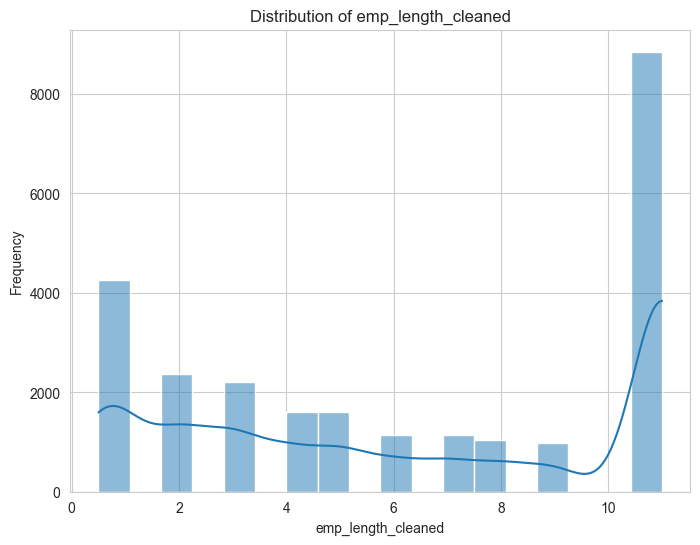

In [74]:
plot_hist(fintech_df_2, 'emp_length_cleaned')

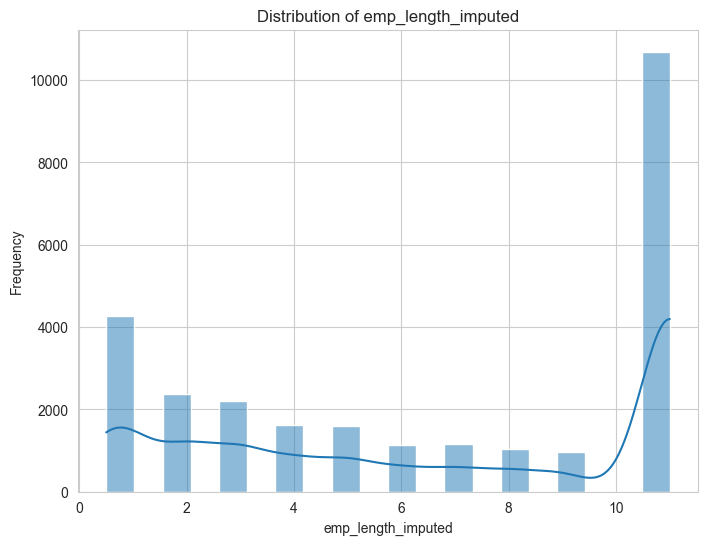

In [75]:
plot_hist(fintech_df_2, 'emp_length_imputed')

### home_ownership

In [76]:
fintech_df_2['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

In [77]:
fintech_df_2['home_ownership'].isna().sum()

0

#### Encode

I used one-hot encoding for the home_ownership column instead of label encoding because it treats each category as a distinct and independent feature. One-hot encoding is more suitable for categorical variables that don’t have an inherent ordinal relationship, like home_ownership ('MORTGAGE', 'OWN', 'RENT', 'ANY'). Label encoding, on the other hand, would assign numerical values, which could imply an ordinal relationship that doesn't exist. By using one-hot encoding, I ensure that the model does not interpret one category as having a higher or lower rank than another, making it a more accurate representation of this variable

In [78]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'home_ownership')

In [79]:
fintech_df_2['home_ownership_ANY'].unique(), fintech_df_2['home_ownership_MORTGAGE'].unique(), fintech_df_2['home_ownership_OWN'].unique(), fintech_df_2['home_ownership_RENT'].unique()

(array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]))

In [80]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown


### annual_inc

In [81]:
fintech_df_2['annual_inc'].unique()

array([80000., 75384., 33800., ..., 34832., 36044., 54995.])

In [82]:
fintech_df_2['annual_inc'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


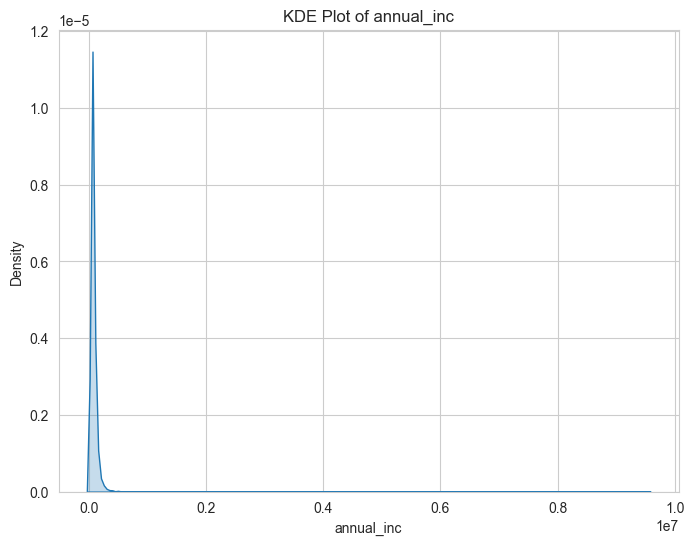

In [83]:
plot_kde(fintech_df_2, 'annual_inc')

##### Boxplots

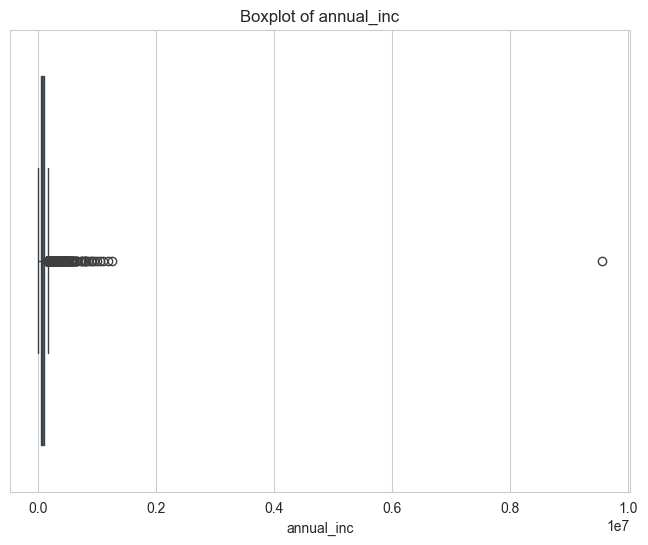

In [84]:
plot_boxplot(fintech_df_2, 'annual_inc')

In [85]:
fintech_df_2['annual_inc'].max()

9550000.0

In [86]:
annual_inc_iqr_oultlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'annual_inc')

In [87]:
annual_inc_iqr_oultlier_mask.sum()

1330

In [88]:
fintech_df_2 = log_transform_col(fintech_df_2, 'annual_inc')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


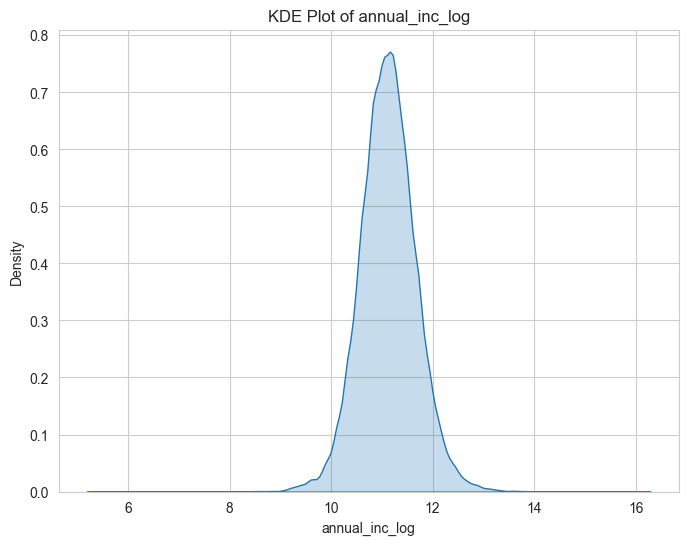

In [89]:
plot_kde(fintech_df_2, 'annual_inc_log')

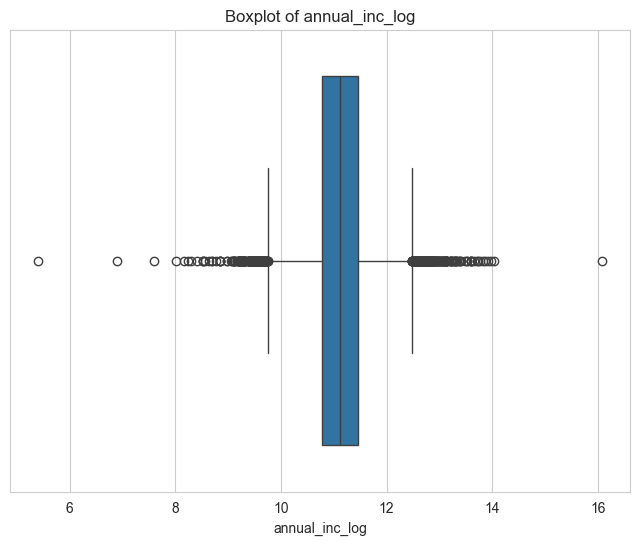

In [90]:
plot_boxplot(fintech_df_2, 'annual_inc_log')

In [91]:
annual_inc_log_iqr_outliers_mask, _, _ = calculate_whiskers(fintech_df_2, 'annual_inc_log')

In [92]:
print(f'Percentage of outliers: {annual_inc_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {annual_inc_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 2.0569737328893822
Number of outliers: 556


we can leave outliers as is as they are still numbers which could exist as annual_inc and there are only 556 outliers now (2.06%)

### annual_inc_joint

In [93]:
fintech_df_2['annual_inc_joint'].nunique()

637

In [94]:
fintech_df_2['annual_inc_joint'].isna().sum()

25170

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


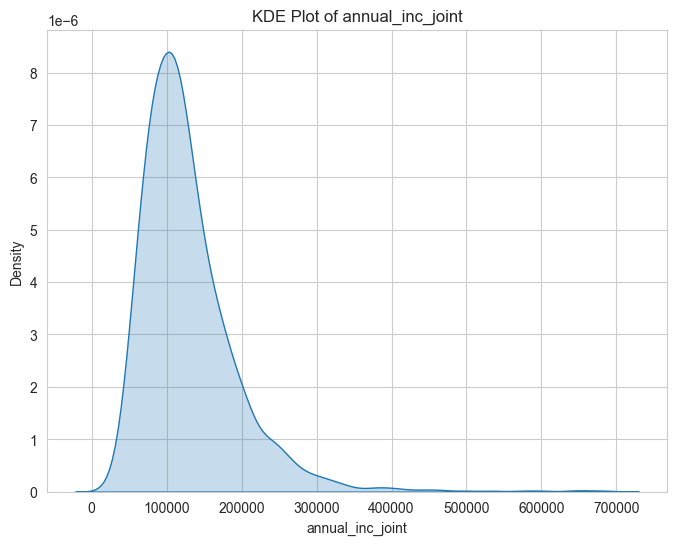

In [95]:
plot_kde(fintech_df_2, 'annual_inc_joint')

#### Outliers

##### Boxplots

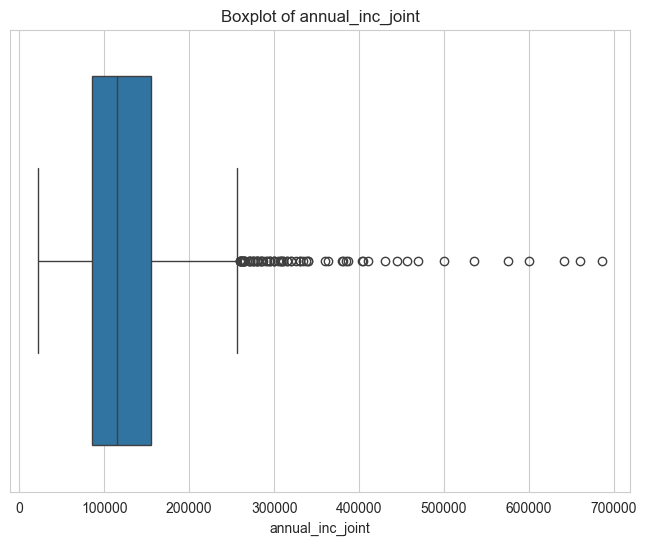

In [96]:
plot_boxplot(fintech_df_2, 'annual_inc_joint')

In [97]:
annual_inc_joint_iqr_outliers_mask, annual_inc_joint_lower_whisker, annual_inc_joint_upper_whisker = calculate_whiskers(fintech_df_2, 'annual_inc_joint')

In [98]:
fintech_df_2[annual_inc_joint_iqr_outliers_mask].shape[0]

75

as you can see there are some outliers according to the boxplot

In [99]:
fintech_df_2 = log_transform_col(fintech_df_2, 'annual_inc_joint')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


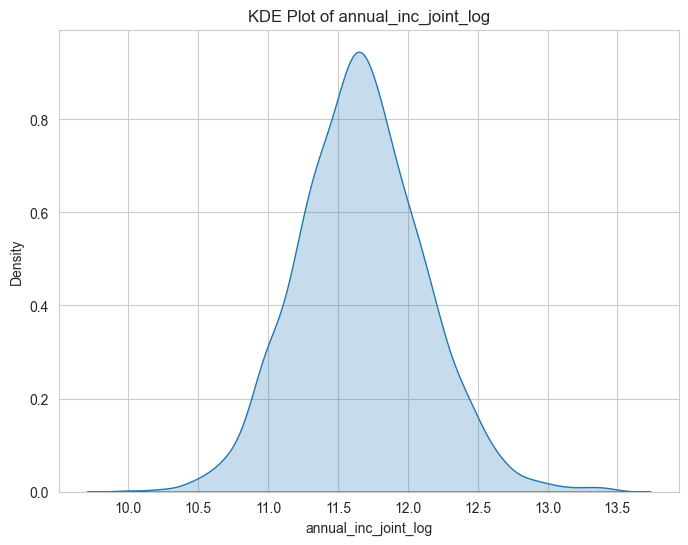

In [100]:
plot_kde(fintech_df_2, 'annual_inc_joint_log')

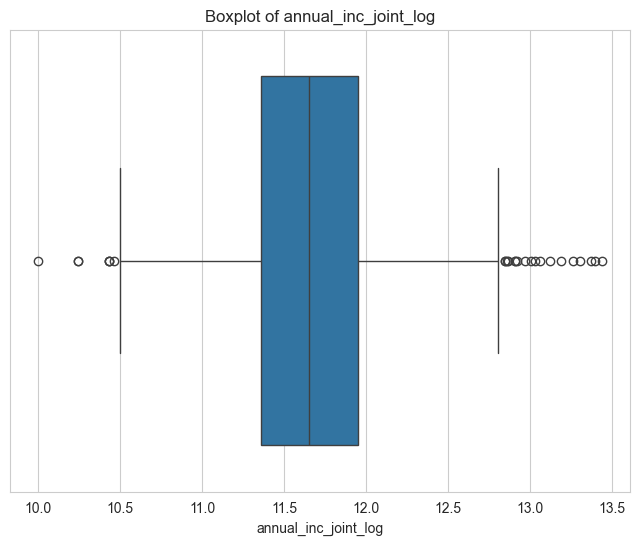

In [101]:
plot_boxplot(fintech_df_2, 'annual_inc_joint_log')

In [102]:
annual_inc_joint_log_iqr_outliers_mask, annual_inc_joint_log_lower_whisker, annual_inc_joint_log_upper_whisker = calculate_whiskers(fintech_df_2, 'annual_inc_joint_log')

In [103]:
print(f'Percentage of outliers: {annual_inc_joint_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {annual_inc_joint_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 0.0924898261191269
Number of outliers: 25


we can leave outliers as is as they are still numbers which could exist as annual_income_joint and there are only 25 outliers now (0.09%)

#### Impute

In [104]:
annual_inc_joint_na_mask = fintech_df_2['annual_inc_joint_log'].isna()
fintech_df_2[annual_inc_joint_na_mask]['type'].unique()

array(['INDIVIDUAL', 'Individual', 'DIRECT_PAY'], dtype=object)

The NaN values in the `annual_inc_joint` column aren’t truly missing but instead represent cases where joint income doesn't apply because the loan type isn’t `Joint`. I filled these values with 0 to clearly indicate that joint income is not relevant for these customers.

In [105]:
def impute_annual_inc_joint(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function imputes the missing values in the 'annual_inc_joint' column of the given DataFrame with value = 0.

    Args:
    - df (pd.DataFrame): The DataFrame containing the 'annual_inc_joint' column.
    - col_name (str): The name of the column to be imputed.

    Returns:
    pd.DataFrame: The DataFrame with the missing values in the 'annual_inc_joint' column imputed.
    """

    orig_col_name = get_orig_col_name(col_name)
    df[f'{orig_col_name}_imputed'] = df[col_name].fillna(0)

    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = [orig_col_name]
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = [0]
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
        
    return df

In [106]:
fintech_df_2 = impute_annual_inc_joint(fintech_df_2, 'annual_inc_joint_log')

In [107]:
fintech_df_2['annual_inc_joint_imputed'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


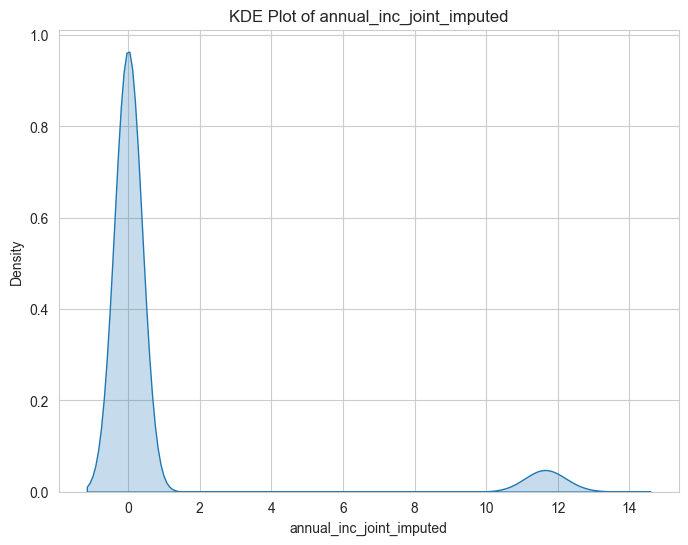

In [108]:
plot_kde(fintech_df_2, 'annual_inc_joint_imputed')

In [109]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0


### verification_status

In [110]:
fintech_df_2['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [111]:
fintech_df_2['verification_status'].isna().sum()

0

#### Encode

I chose to one-hot encode the verification_status column because the values ("Source Verified," "Verified," "Not Verified") are nominal categories without any ordinal relationship. One-hot encoding ensures that the model (if one used later) treats each verification status as a distinct and independent category. If I used label encoding, it would assign numerical values to these categories, potentially implying an order or ranking (e.g., treating "Source Verified" as greater than "Verified"), which could mislead the model (if one used later).

In [112]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'verification_status')

In [113]:
fintech_df_2['verification_status_Not Verified'].unique(), fintech_df_2['verification_status_Source Verified'].unique(), fintech_df_2['verification_status_Verified'].unique() 

(array([0, 1]), array([1, 0]), array([0, 1]))

In [114]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0


### zip_code

In [115]:
fintech_df_2['zip_code'].unique()

array(['333xx', '237xx', '111xx', '070xx', '750xx', '762xx', '452xx',
       '125xx', '082xx', '105xx', '342xx', '786xx', '337xx', '372xx',
       '357xx', '925xx', '989xx', '331xx', '770xx', '852xx', '113xx',
       '284xx', '926xx', '741xx', '064xx', '327xx', '027xx', '761xx',
       '744xx', '484xx', '623xx', '480xx', '841xx', '216xx', '038xx',
       '600xx', '085xx', '294xx', '117xx', '120xx', '973xx', '060xx',
       '182xx', '145xx', '322xx', '278xx', '928xx', '844xx', '151xx',
       '787xx', '605xx', '797xx', '908xx', '606xx', '303xx', '920xx',
       '907xx', '930xx', '546xx', '302xx', '161xx', '550xx', '330xx',
       '363xx', '633xx', '321xx', '351xx', '464xx', '148xx', '021xx',
       '207xx', '104xx', '939xx', '201xx', '785xx', '286xx', '473xx',
       '271xx', '209xx', '384xx', '753xx', '951xx', '087xx', '756xx',
       '956xx', '483xx', '490xx', '225xx', '292xx', '672xx', '958xx',
       '301xx', '193xx', '276xx', '890xx', '328xx', '300xx', '846xx',
       '325xx', '662

In [116]:
fintech_df_2['zip_code'].isna().sum()

0

### addr_state

In [117]:
(fintech_df_2['state'] == fintech_df_2['addr_state']).all()

True

In [118]:
fintech_df_2['addr_state'].isna().sum()

0

#### Encode

I chose label encoding for the `addr_state` column to impose an alphabetical order on the states. By assigning integer labels based on lexicographical order, I provide a consistent, ordered representation without inflating dimensionality because using one-hot encoding would have significantly increased dimensionality, adding around 50 additional columns, one for each state. This would increase both memory usage and computational load, which may not be practical or necessary for this feature.

In [119]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'addr_state', need_to_sort=True)

In [120]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
5,addr_state,AZ,3
6,addr_state,CA,4
7,addr_state,CO,5
8,addr_state,CT,6
9,addr_state,DC,7


### avg_cur_bal

In [121]:
fintech_df_2['avg_cur_bal'].unique()

array([ 8275., 25385.,   282., ..., 24701.,  8393., 13313.])

In [122]:
fintech_df_2['avg_cur_bal'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


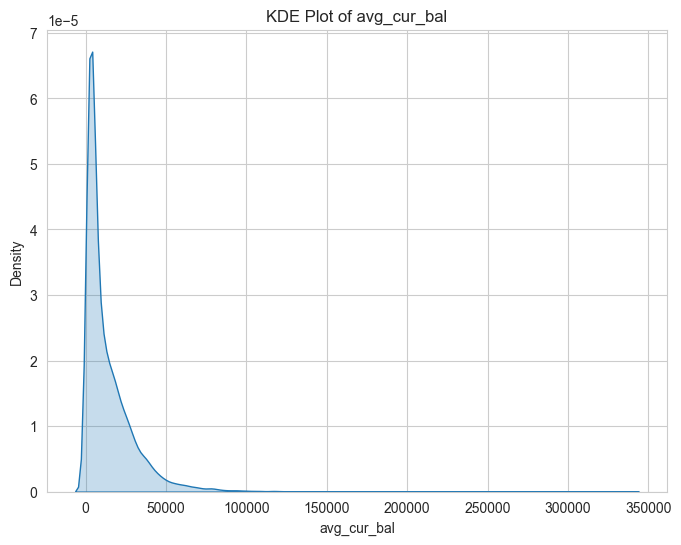

In [123]:
plot_kde(fintech_df_2, 'avg_cur_bal')

##### Boxplots

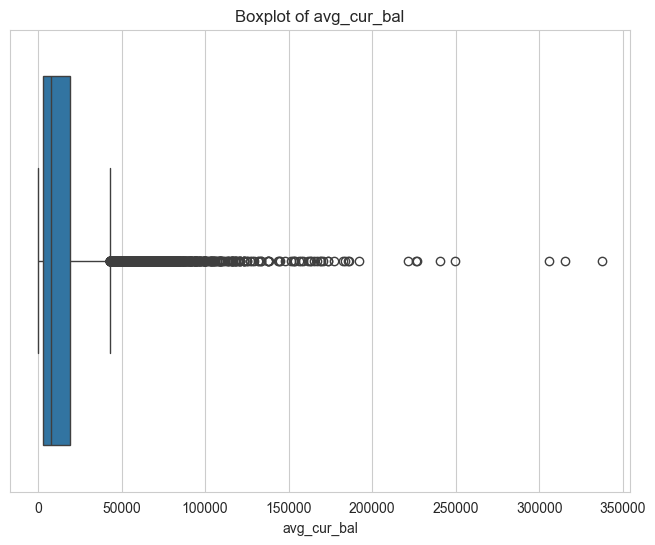

In [124]:
plot_boxplot(fintech_df_2, 'avg_cur_bal')

In [125]:
avg_cur_bal_iqr_outlier_mask, avg_cur_bal_lower_whisker, avg_cur_bal_upper_whisker = calculate_whiskers(fintech_df_2, 'avg_cur_bal')

In [126]:
avg_cur_bal_iqr_outlier_mask.sum()

1402

lets log the avg_cur_bal column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [127]:
fintech_df_2 = log_transform_col(fintech_df_2, 'avg_cur_bal')

In [128]:
fintech_df_2['avg_cur_bal_log1p'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


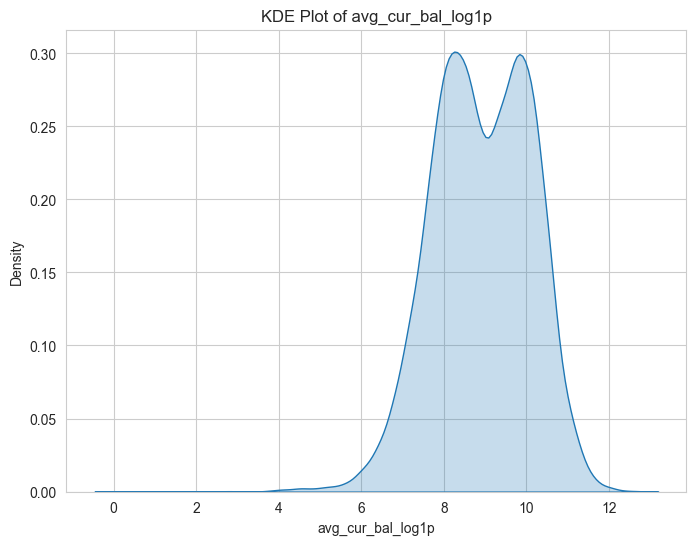

In [129]:
plot_kde(fintech_df_2, 'avg_cur_bal_log1p')

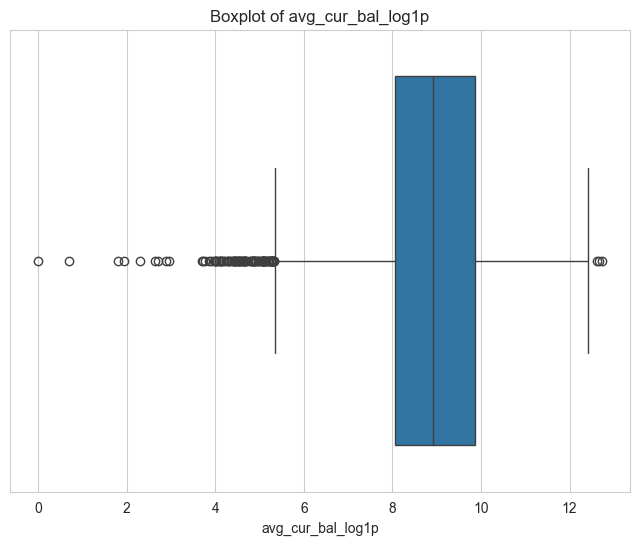

In [130]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_log1p')

In [131]:
avg_cur_bal_log_iqr_outlier_mask, avg_cur_bal_log_lower_whisker, avg_cur_bal_log_upper_whisker = calculate_whiskers(fintech_df_2, 'avg_cur_bal_log1p')

In [132]:
avg_cur_bal_log_iqr_outlier_mask.sum()

103

In [133]:
print(f'Percentage of outliers: {avg_cur_bal_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.3810580836108028
Number of outliers: 103


We could remove the outliers as they only constitute 0.38% of the df but I will chose to leave it as the values could occur in real life

lets try sqrt

In [134]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'avg_cur_bal')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


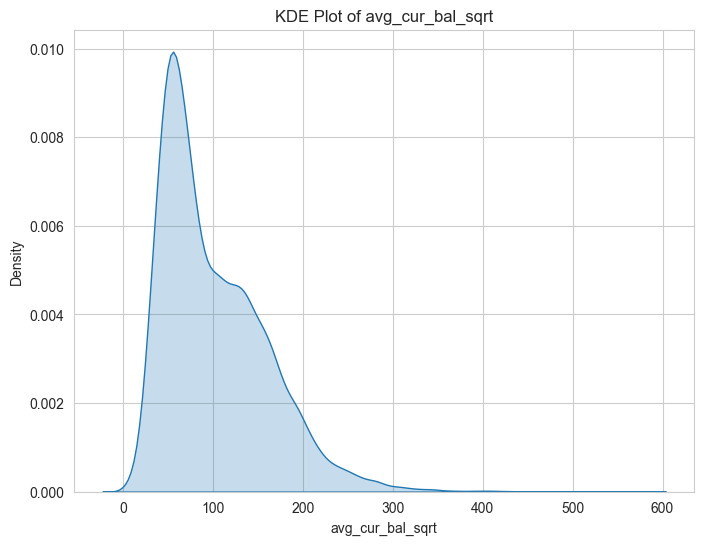

In [135]:
plot_kde(fintech_df_2, 'avg_cur_bal_sqrt')

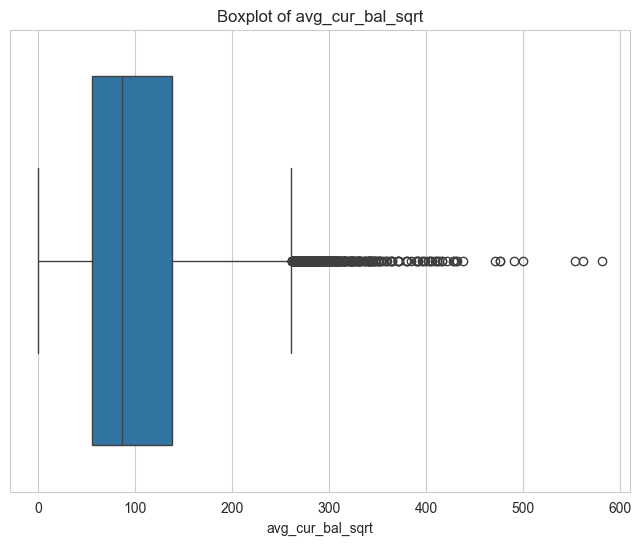

In [136]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_sqrt')

In [137]:
avg_cur_bal_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'avg_cur_bal_sqrt')

In [138]:
print(f'Percentage of outliers: {avg_cur_bal_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.4428412874583796
Number of outliers: 390


lets try box-cox

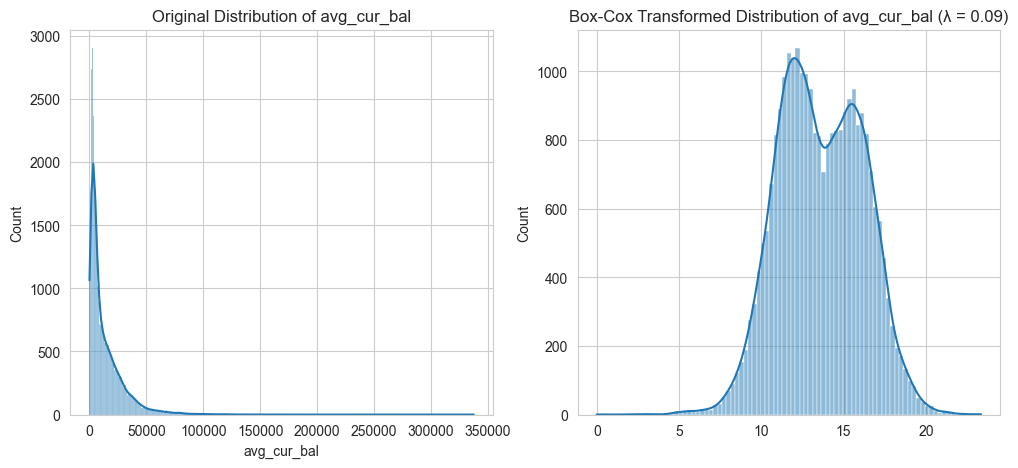

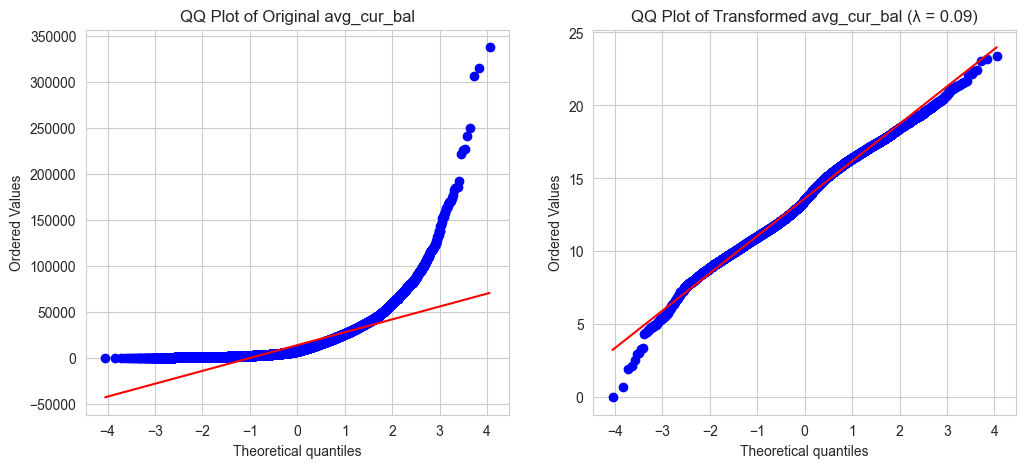

In [139]:
fintech_df_2, avg_cur_bal_boxcox_lambda = apply_boxcox(fintech_df_2, 'avg_cur_bal')

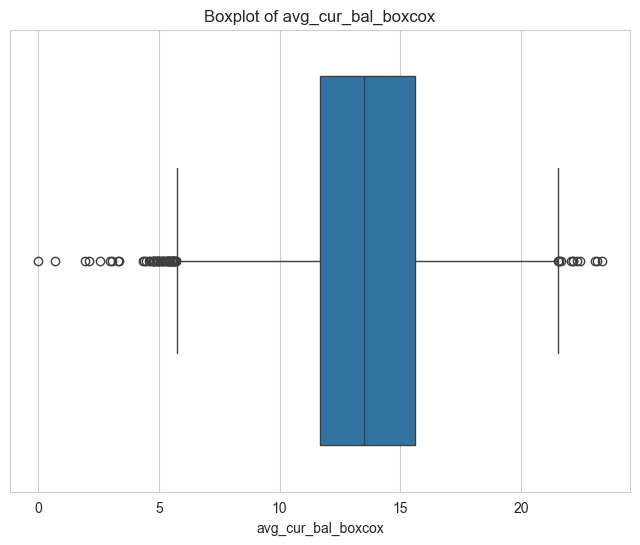

In [140]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_boxcox')

In [141]:
avg_cur_bal_boxcox_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'avg_cur_bal_boxcox')

In [142]:
print(f'Percentage of outliers: {avg_cur_bal_boxcox_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_boxcox_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.2256751757306696
Number of outliers: 61


As seen here boxcox with lambda = 0.09 resulted in most decrease in outliers; therefore, it is the new tranformed column we will adopt from now on. We could remove the outliers as they only constitute 0.23% of the df but I will chose to leave it as the values could occur in real life

### tot_cur_bal

In [143]:
fintech_df_2['tot_cur_bal'].unique()

array([239986., 279232.,   1691., ...,  58754.,  22390., 133129.])

In [144]:
fintech_df_2['tot_cur_bal'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


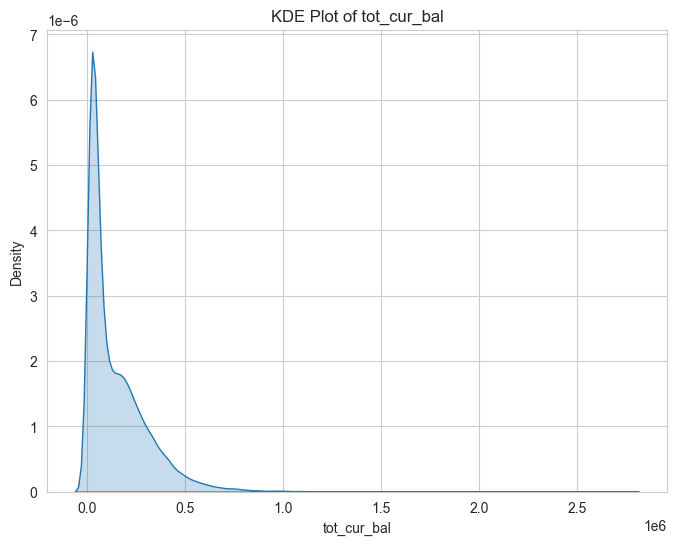

In [145]:
plot_kde(fintech_df_2, 'tot_cur_bal')

##### Boxplots

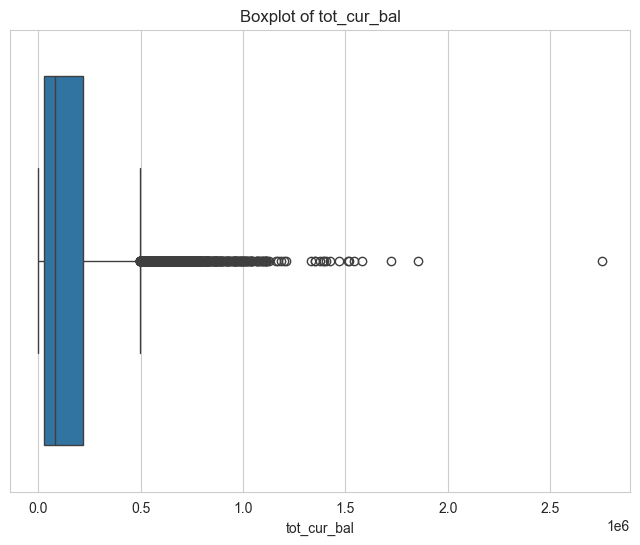

In [146]:
plot_boxplot(fintech_df_2, 'tot_cur_bal')

In [147]:
tot_cur_bal_iqr_outlier_mask, tot_cur_bal_lower_whisker, tot_cur_bal_upper_whisker = calculate_whiskers(fintech_df_2, 'tot_cur_bal')

In [148]:
tot_cur_bal_iqr_outlier_mask.sum()

946

lets log the tot_cur_bal column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [149]:
fintech_df_2 = log_transform_col(fintech_df_2, 'tot_cur_bal')

In [150]:
fintech_df_2['tot_cur_bal_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


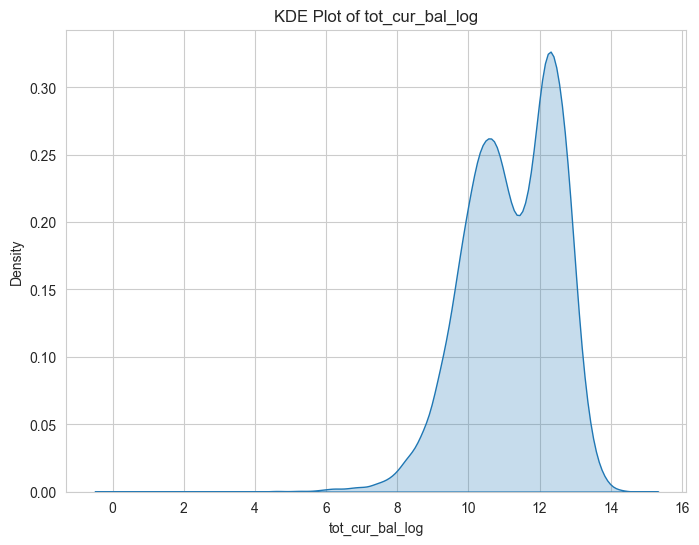

In [151]:
plot_kde(fintech_df_2, 'tot_cur_bal_log')

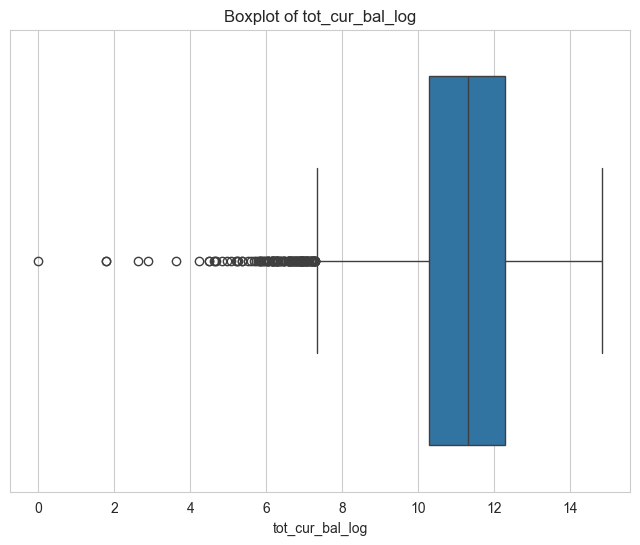

In [152]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_log')

In [153]:
tot_cur_bal_log_iqr_outlier_mask, tot_cur_bal_log_lower_whisker, tot_cur_bal_log_upper_whisker = calculate_whiskers(fintech_df_2, 'tot_cur_bal_log')

In [154]:
tot_cur_bal_log_iqr_outlier_mask.sum()

131

In [155]:
print(f'Percentage of outliers: {tot_cur_bal_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.4846466888642249
Number of outliers: 131


lets try sqrt

In [156]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'tot_cur_bal')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


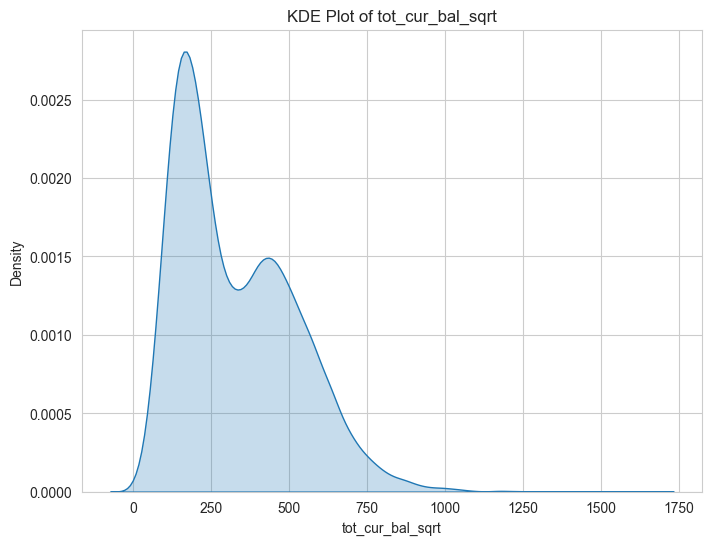

In [157]:
plot_kde(fintech_df_2, 'tot_cur_bal_sqrt')

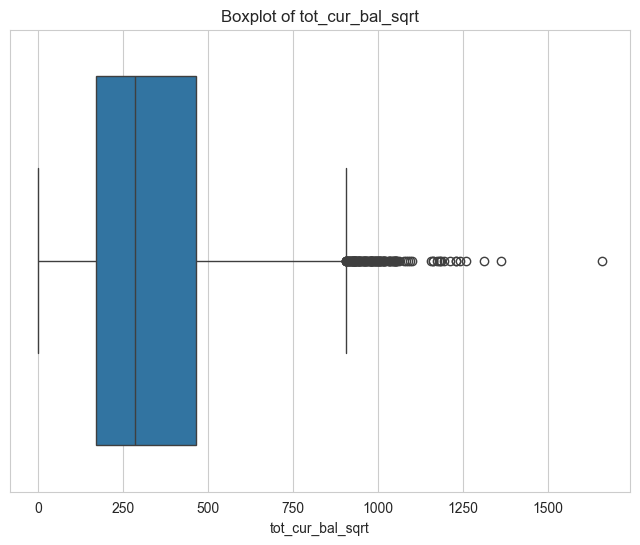

In [158]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_sqrt')

In [159]:
tot_cur_bal_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'tot_cur_bal_sqrt')

In [160]:
print(f'Percentage of outliers: {tot_cur_bal_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.4698483166851646
Number of outliers: 127


lets try box-cox

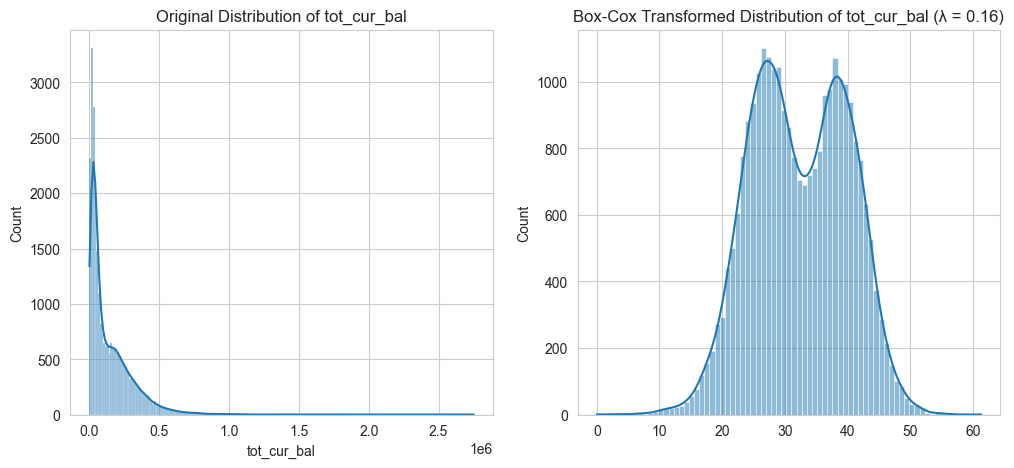

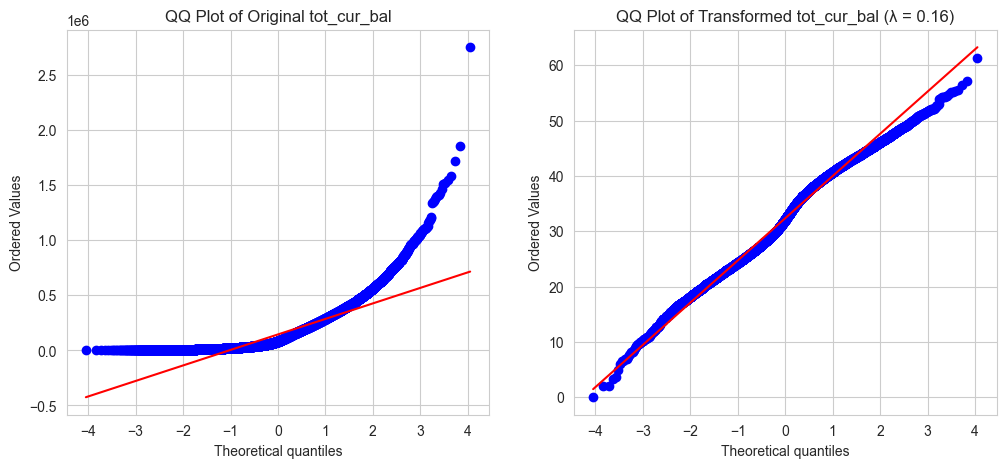

In [161]:
fintech_df_2, avg_cur_bal_boxcox_lambda = apply_boxcox(fintech_df_2, 'tot_cur_bal')

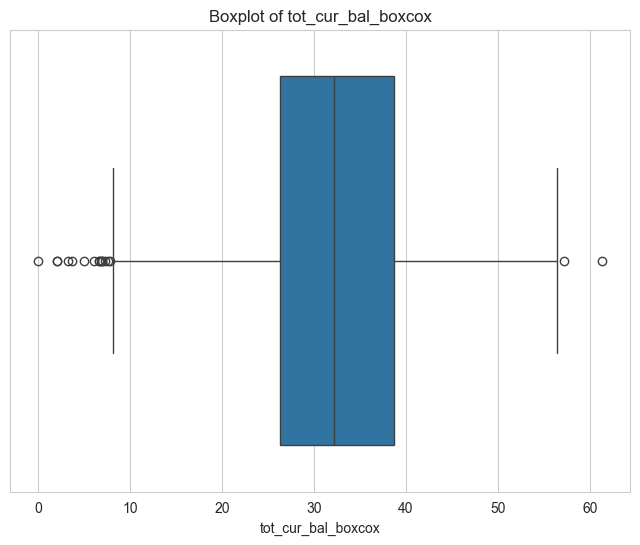

In [162]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_boxcox')

In [163]:
tot_cur_bal_boxcox_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'tot_cur_bal_boxcox')

In [164]:
print(f'Percentage of outliers: {tot_cur_bal_boxcox_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_boxcox_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.06289308176100629
Number of outliers: 17


As seen here boxcox with lambda = 0.16 resulted in most decrease in outliers; therefore, it is the new tranformed column we will adopt from now on. We could remove the outliers as they only constitute 0.06% of the df but I will chose to leave it as the values could occur in real life

### loan_id

In [165]:
fintech_df_2['loan_id'].unique()

array([ 39474, 158200, 113752, ..., 132651,  15314,   5616], dtype=int64)

In [166]:
fintech_df_2['loan_id'].isna().sum()

0

### loan_status

In [167]:
fintech_df_2['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [168]:
fintech_df_2['loan_status'].isna().sum()

0

#### Encode

I chose one-hot encoding for the `loan_status` column because, although there may be a general order of severity in loan statuses, it’s not clear exactly how to order categories like "Default" and "Charged Off." One-hot encoding treats each status as separate and avoids any assumptions about order, ensuring the model doesn’t misinterpret the relationships between these categories. This way, each loan status keeps its unique meaning without implying a specific progression.

In [169]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'loan_status')

In [170]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
5,addr_state,AZ,3
6,addr_state,CA,4
7,addr_state,CO,5
8,addr_state,CT,6
9,addr_state,DC,7


### loan_amount

In [171]:
fintech_df_2['loan_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [172]:
fintech_df_2['loan_amount'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


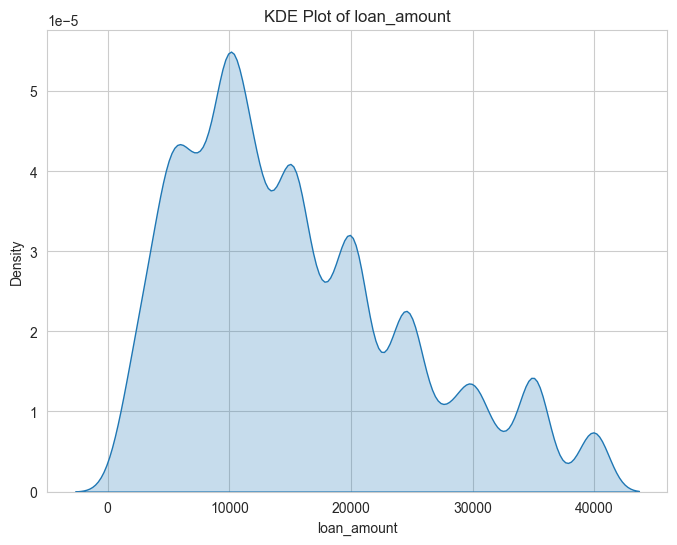

In [173]:
plot_kde(fintech_df_2, 'loan_amount')

##### Boxplots

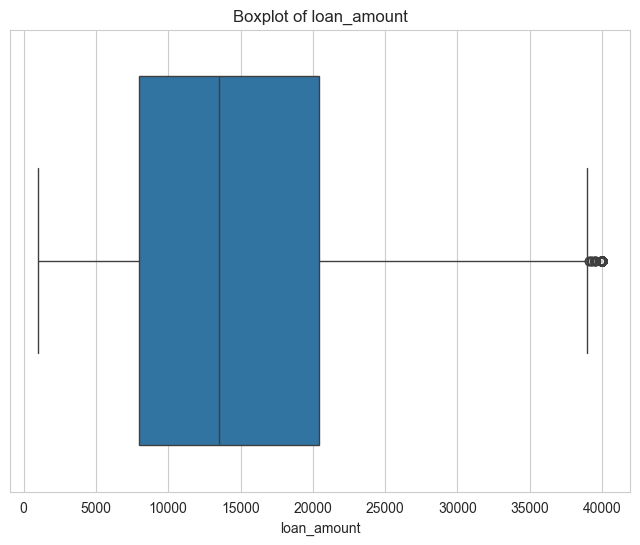

In [174]:
plot_boxplot(fintech_df_2, 'loan_amount')

In [175]:
loan_amount_iqr_outlier_mask, loan_amount_lower_whisker, loan_amount_upper_whisker = calculate_whiskers(fintech_df_2, 'loan_amount')

In [176]:
loan_amount_iqr_outlier_mask.sum()

592

lets log the loan_amount column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [177]:
fintech_df_2 = log_transform_col(fintech_df_2, 'loan_amount')

In [178]:
fintech_df_2['loan_amount_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


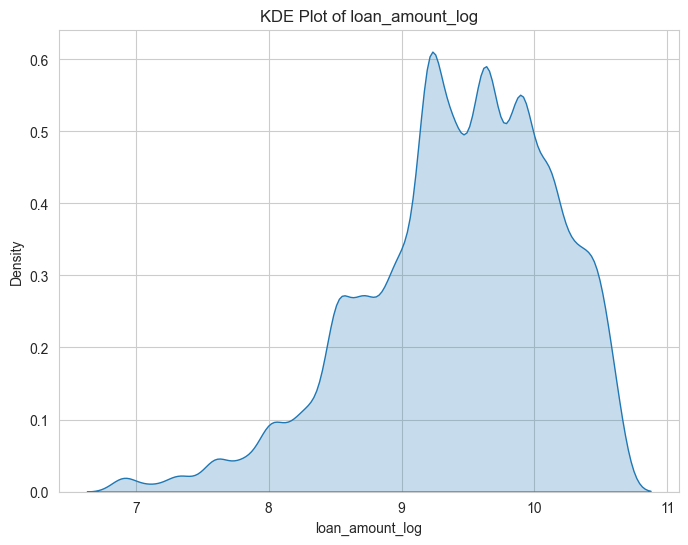

In [179]:
plot_kde(fintech_df_2, 'loan_amount_log')

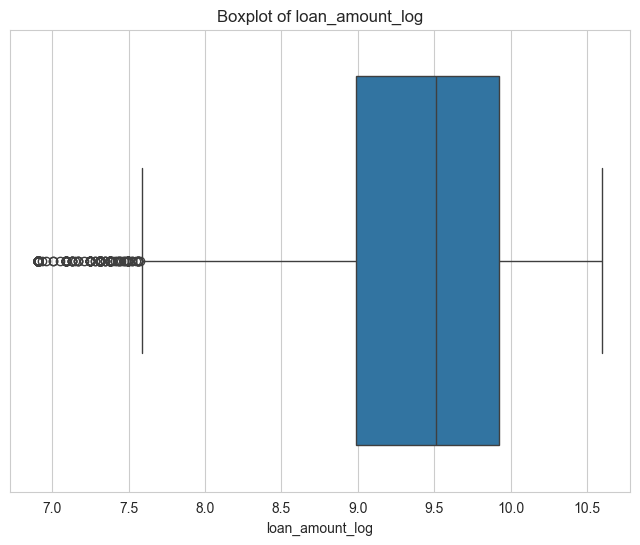

In [180]:
plot_boxplot(fintech_df_2, 'loan_amount_log')

In [181]:
loan_amount_log_iqr_outlier_mask, loan_amount_log_lower_whisker, loan_amount_log_upper_whisker = calculate_whiskers(fintech_df_2, 'loan_amount_log')

In [182]:
loan_amount_log_iqr_outlier_mask.sum()

340

In [183]:
print(f'Percentage of outliers: {loan_amount_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {loan_amount_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.257861635220126
Number of outliers: 340


lets try Sqrt

In [184]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'loan_amount')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


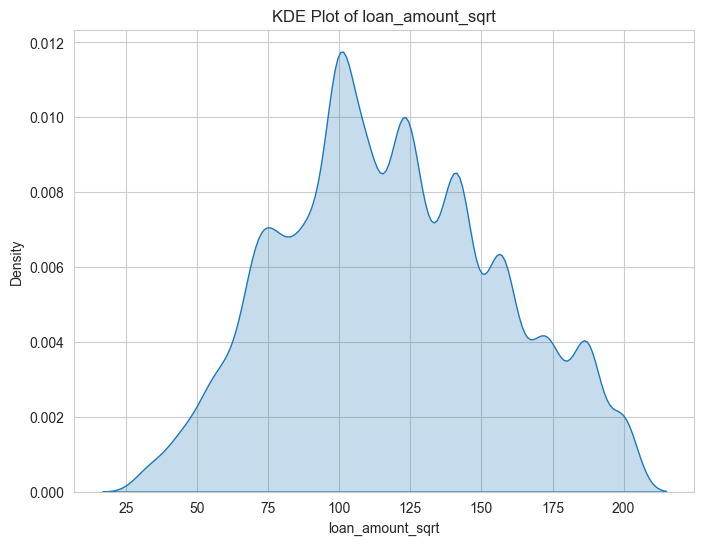

In [185]:
plot_kde(fintech_df_2, 'loan_amount_sqrt')

funded_amount is more normally distributed after using sqrt

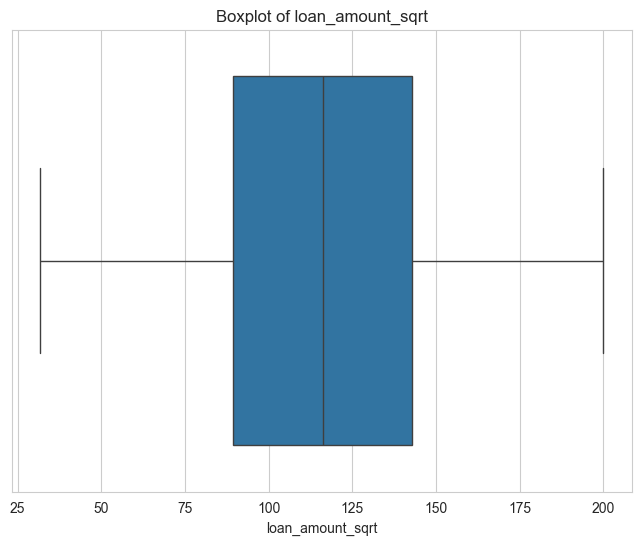

In [186]:
plot_boxplot(fintech_df_2, 'loan_amount_sqrt')

In [187]:
loan_amount_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'loan_amount_sqrt')

In [188]:
print(f'Percentage of outliers: {loan_amount_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {loan_amount_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


We will use the sqrt transformation as it resulted in 0 outliers and made the distribution more normally distributed and less skewed.

##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_44444\3073257041.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


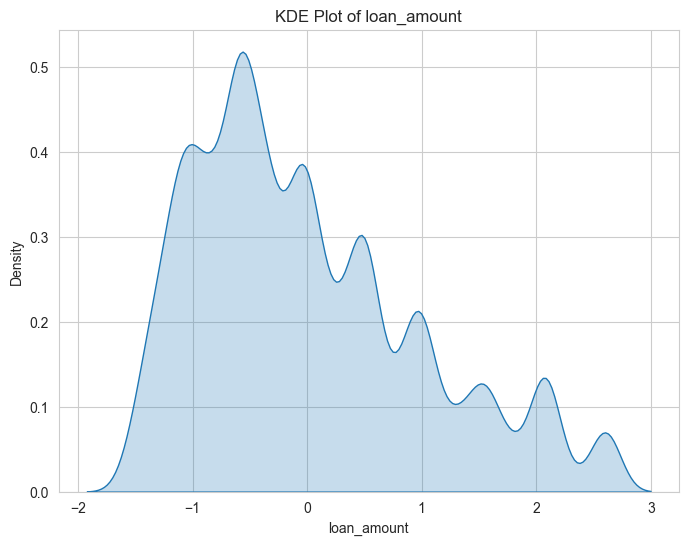

In [189]:
loan_amount_z_score = plot_z_score(fintech_df_2, 'loan_amount')

In [190]:
loan_amount_outlier_mask = loan_amount_z_score[loan_amount_z_score.abs()>3]

In [191]:
len(loan_amount_outlier_mask)

0

According to Z-score method, the loan_amount col has now outliers exceeding 3 standard deviations but we will still use the sqrt transformation one

### state

In [192]:
fintech_df_2['state'].unique()

array(['FL', 'VA', 'NY', 'NJ', 'TX', 'OH', 'TN', 'AL', 'CA', 'WA', 'AZ',
       'NC', 'OK', 'CT', 'MA', 'MI', 'IL', 'UT', 'MD', 'NH', 'SC', 'OR',
       'PA', 'GA', 'WI', 'MN', 'MO', 'IN', 'KS', 'NV', 'CO', 'RI', 'AR',
       'WV', 'NE', 'DE', 'MS', 'SD', 'MT', 'VT', 'LA', 'WY', 'KY', 'DC',
       'ME', 'NM', 'HI', 'AK', 'ND', 'ID'], dtype=object)

In [193]:
fintech_df_2['state'].isna().sum()

0

#### Encode

I chose label encoding for the `state` column to impose an alphabetical order on the states. By assigning integer labels based on lexicographical order, I provide a consistent, ordered representation without inflating dimensionality because using one-hot encoding would have significantly increased dimensionality, adding around 50 additional columns, one for each state. This would increase both memory usage and computational load, which may not be practical or necessary for this feature.

In [194]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'state', need_to_sort=True)

In [195]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
...,...,...,...
97,state,VT,45
98,state,WA,46
99,state,WI,47
100,state,WV,48


### funded_amount

In [196]:
fintech_df_2['funded_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [197]:
fintech_df_2['funded_amount'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


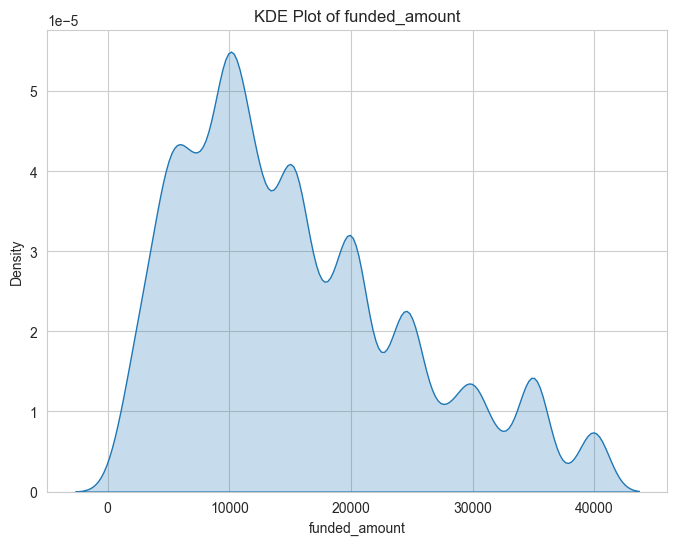

In [198]:
plot_kde(fintech_df_2, 'funded_amount')

##### Boxplots

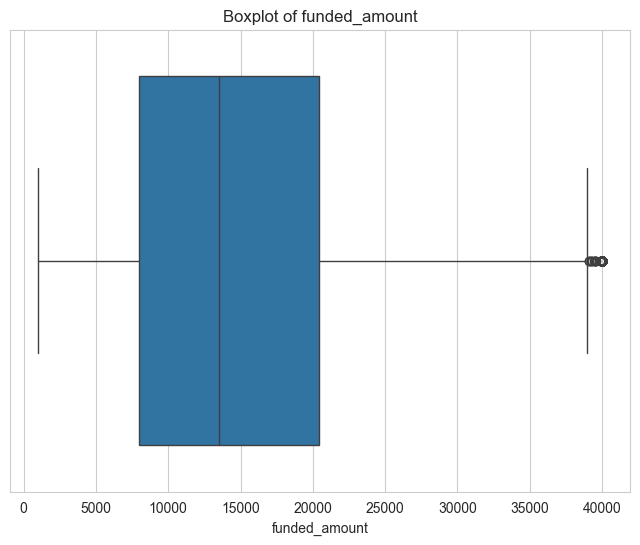

In [199]:
plot_boxplot(fintech_df_2, 'funded_amount')

In [200]:
funded_amount_iqr_outlier_mask, funded_amount_lower_whisker, funded_amount_upper_whisker = calculate_whiskers(fintech_df_2, 'funded_amount')

In [201]:
funded_amount_iqr_outlier_mask.sum()

592

lets log the funded_amount column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [202]:
fintech_df_2 = log_transform_col(fintech_df_2, 'funded_amount')

In [203]:
fintech_df_2['funded_amount_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


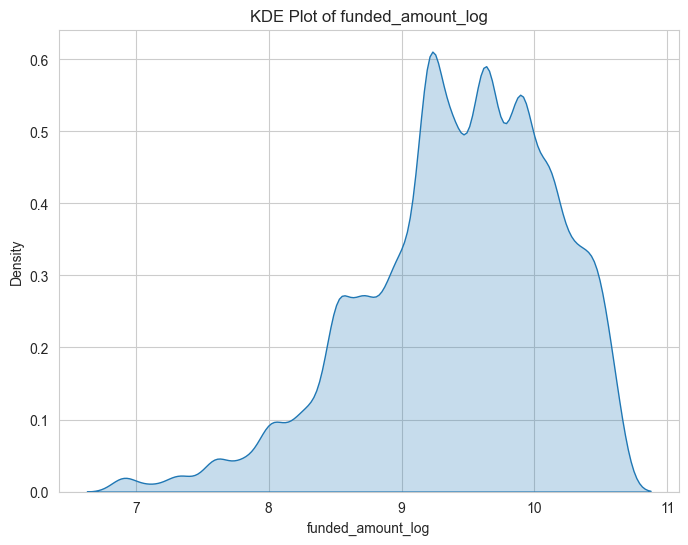

In [204]:
plot_kde(fintech_df_2, 'funded_amount_log')

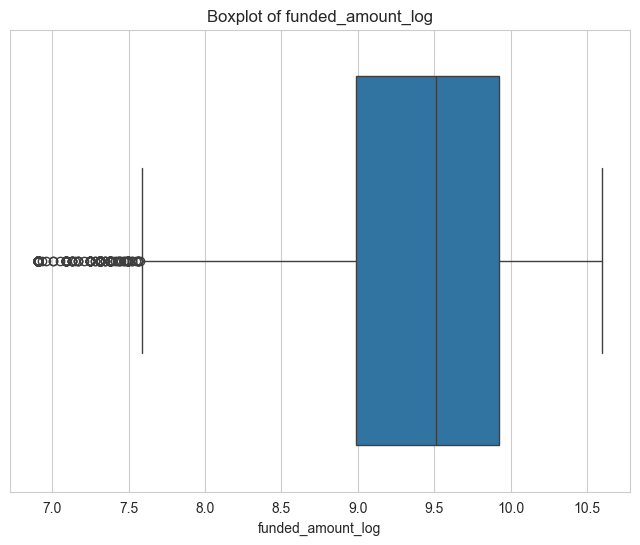

In [205]:
plot_boxplot(fintech_df_2, 'funded_amount_log')

In [206]:
funded_amount_log_iqr_outlier_mask, funded_amount_log_lower_whisker, funded_amount_log_upper_whisker = calculate_whiskers(fintech_df_2, 'funded_amount_log')

In [207]:
funded_amount_log_iqr_outlier_mask.sum()

340

In [208]:
print(f'Percentage of outliers: {funded_amount_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {funded_amount_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.257861635220126
Number of outliers: 340


lets try Sqrt

In [209]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'funded_amount')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


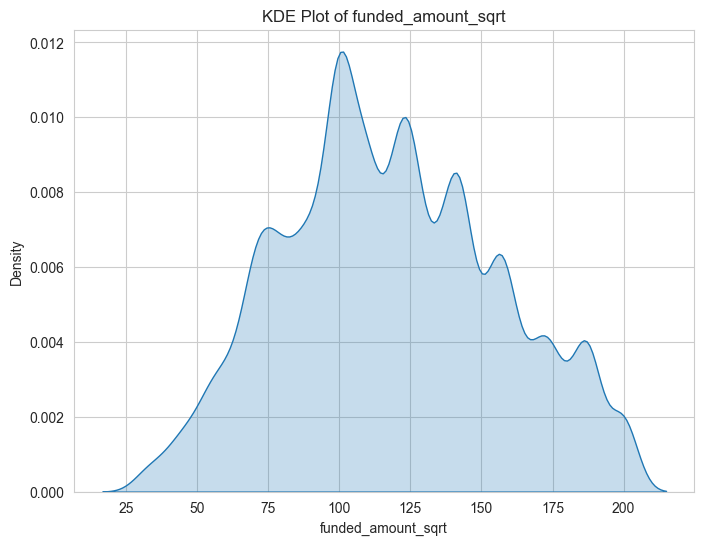

In [210]:
plot_kde(fintech_df_2, 'funded_amount_sqrt')

funded_amount is more normally distributed after using sqrt

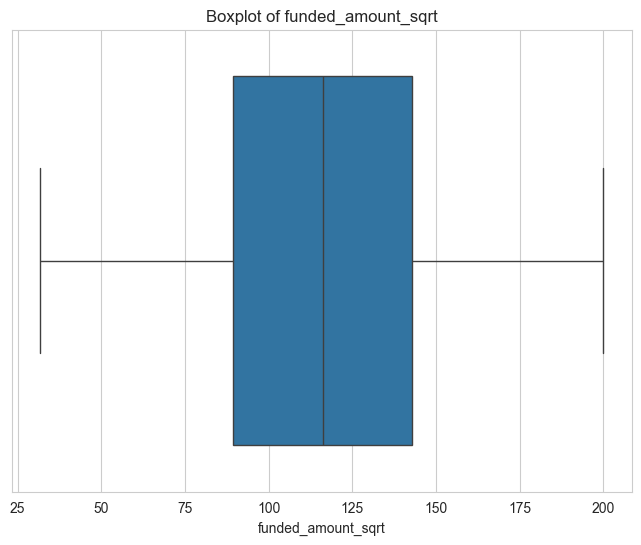

In [211]:
plot_boxplot(fintech_df_2, 'funded_amount_sqrt')

In [212]:
funded_amount_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'funded_amount_sqrt')

In [213]:
print(f'Percentage of outliers: {funded_amount_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {funded_amount_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


We will use the sqrt transformation as it resulted in 0 outliers and made the distribution more normally distributed and less skewed.

##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_44444\3073257041.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


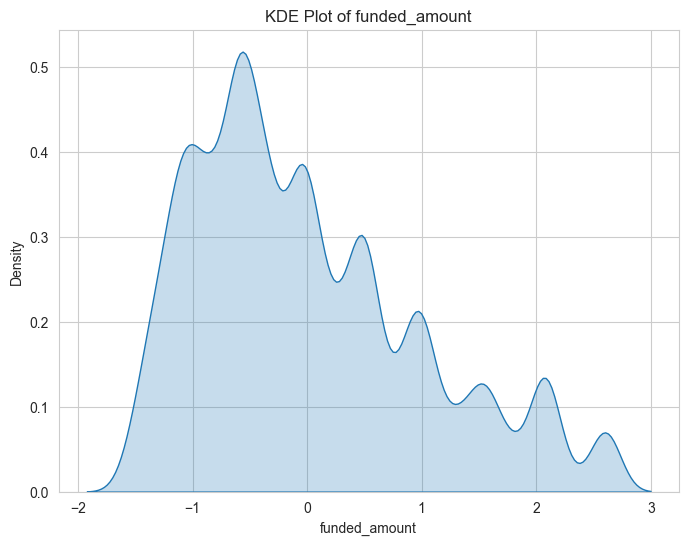

In [214]:
funded_amount_z_score = plot_z_score(fintech_df_2, 'funded_amount')

In [215]:
funded_amount_z_score = funded_amount_z_score[funded_amount_z_score.abs()>3]

In [216]:
len(funded_amount_z_score)

0

### term

In [217]:
fintech_df_2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [218]:
fintech_df_2['term'].isna().sum()

0

In [219]:
def clean_term_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function cleans the term column in a given DataFrame by removing any non-alphanumeric characters and converting it to an integer.

    Args:
    - df (pd.DataFrame): The DataFrame containing the term column to be cleaned.
    - col_name (str): The name of the term column to be cleaned.

    Returns:
    pd.DataFrame: The cleaned DataFrame with the term column converted to an integer.
    """

    df[f'{col_name}_cleaned'] = df[col_name].str.replace('months', '').str.strip()
    df[f'{col_name}_cleaned'] = df[f'{col_name}_cleaned'].astype(int)
    return df

In [220]:
fintech_df_2 = clean_term_col(fintech_df_2, 'term')

In [221]:
fintech_df_2['term_cleaned'].unique()

array([36, 60])

### int_rate

In [222]:
fintech_df_2['int_rate'].unique()

array([0.0649, 0.1806, 0.1114, 0.2149, 0.1171, 0.1899, 0.0967, 0.1499,
       0.0692, 0.0799, 0.288 , 0.1288, 0.1299, 0.1747, 0.1042, 0.0624,
       0.1335, 0.1367, 0.0867, 0.1333, 0.234 , 0.1561, 0.0721, 0.1199,
       0.1356, 0.1757, 0.0532, 0.0707, 0.0944, 0.0619, 0.0759, 0.1399,
       0.1505, 0.1153, 0.1407, 0.1091, 0.1557, 0.1524, 0.0916, 0.0791,
       0.0646, 0.1408, 0.1398, 0.0917, 0.1072, 0.1262, 0.1774,    nan,
       0.1905, 0.1709, 0.143 , 0.124 , 0.164 , 0.1894, 0.1691, 0.1259,
       0.0846, 0.1149, 0.1629, 0.0839, 0.1274, 0.1099, 0.1797, 0.0824,
       0.0881, 0.0789, 0.0689, 0.2779, 0.0818, 0.118 , 0.1273, 0.1504,
       0.1854, 0.0699, 0.0746, 0.089 , 0.0999, 0.1588, 0.1599, 0.0819,
       0.0899, 0.0531, 0.2055, 0.0702, 0.1144, 0.1239, 0.2399, 0.1646,
       0.1903, 0.1999, 0.1269, 0.1952, 0.0667, 0.2534, 0.0762, 0.1308,
       0.0611, 0.2145, 0.0943, 0.1008, 0.1359, 0.227 , 0.2383, 0.1559,
       0.0993, 0.1016, 0.0726, 0.1047, 0.1845, 0.0756, 0.1825, 0.0797,
      

In [223]:
fintech_df_2['int_rate'].isna().sum()

1185

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


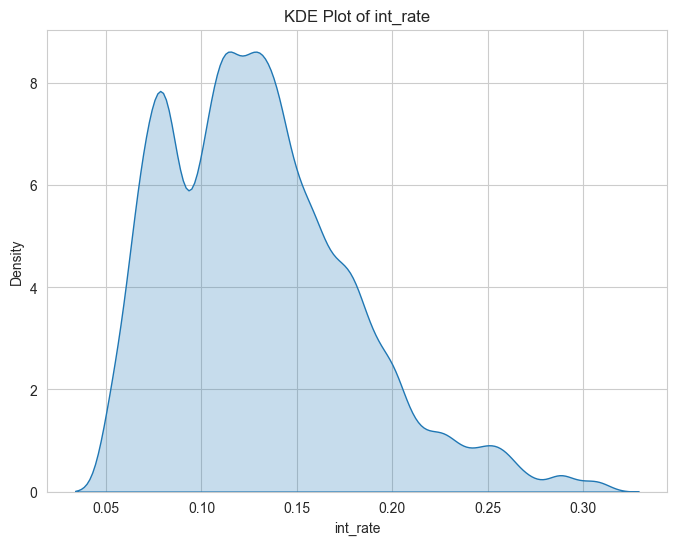

In [224]:
plot_kde(fintech_df_2, 'int_rate')

#### Outliers

##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_44444\3073257041.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


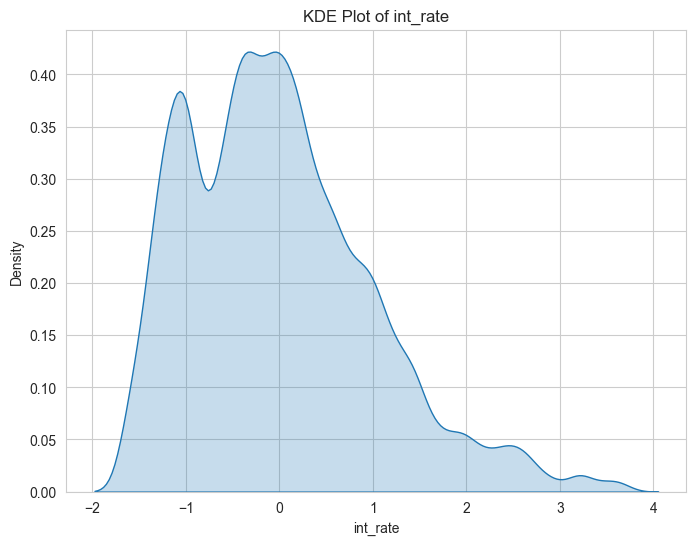

In [225]:
int_rate_z_score = plot_z_score(fintech_df_2, 'int_rate')

In [226]:
int_rate_outlier_mask = int_rate_z_score[int_rate_z_score.abs()>3]

In [227]:
len(int_rate_outlier_mask)

234

##### Boxplots

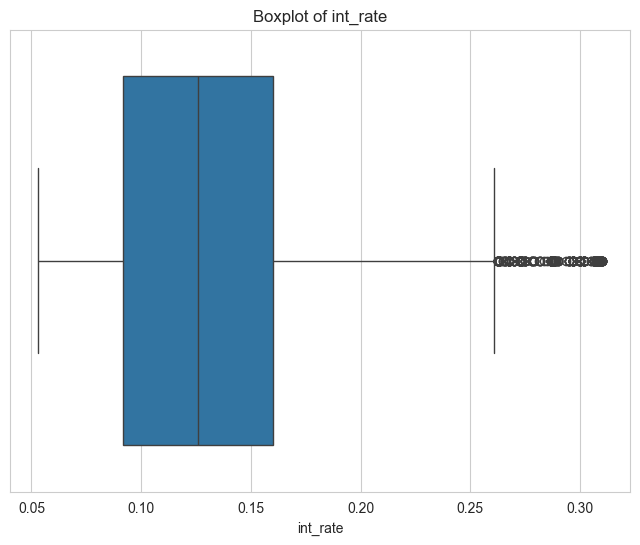

In [228]:
plot_boxplot(fintech_df_2, 'int_rate')

In [229]:
int_rate_iqr_oultlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'int_rate')

In [230]:
int_rate_iqr_oultlier_mask.sum()

401

In [231]:
fintech_df_2 = log_transform_col(fintech_df_2, 'int_rate')

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


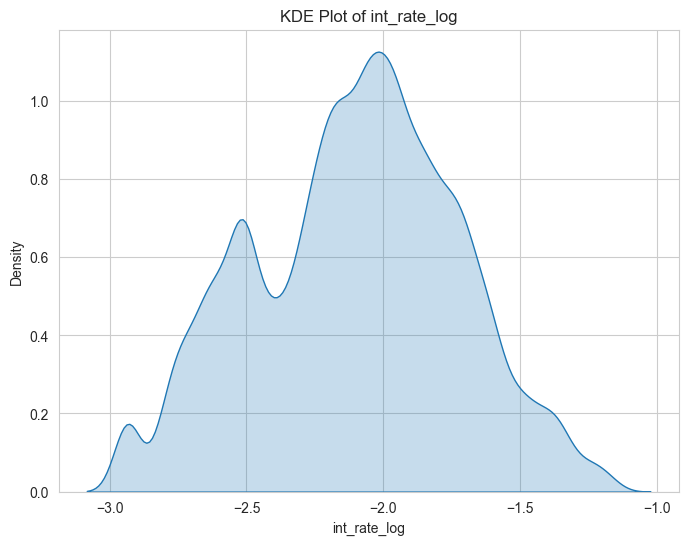

In [232]:
plot_kde(fintech_df_2, 'int_rate_log')

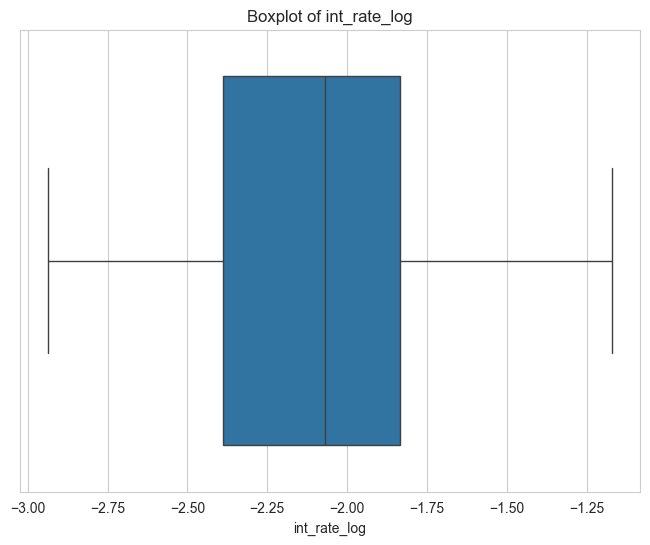

In [233]:
plot_boxplot(fintech_df_2, 'int_rate_log')

In [234]:
int_rate_log_iqr_outliers_mask, _, _ = calculate_whiskers(fintech_df_2, 'int_rate_log')

In [235]:
print(f'Percentage of outliers: {int_rate_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {int_rate_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


#### Impute

The missing values in the int_rate column can be considered `Missing at Random (MAR)` because the likelihood of missing values is related to another observed variable (`grade`) as they both are highly correlated with a correlation of `0.92`. Since the missing interest rates are associated with specific grades, we can reasonably assume that the missingness is influenced by the grade of the loan, making it suitable to impute the missing values based on the average `int_rate` for each grade.

In [236]:
fintech_df_2.corr(numeric_only=True)

,annual_inc,annual_inc_joint,avg_cur_bal,tot_cur_bal,loan_id,loan_amount,funded_amount,int_rate,grade,pymnt_plan,emp_length_cleaned,annual_inc_bins,emp_length_imputed,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,annual_inc_log,annual_inc_joint_log,annual_inc_joint_imputed,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_labelEncoded,avg_cur_bal_log1p,avg_cur_bal_sqrt,avg_cur_bal_boxcox,tot_cur_bal_log,tot_cur_bal_sqrt,tot_cur_bal_boxcox,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),loan_amount_log,loan_amount_sqrt,state_labelEncoded,funded_amount_log,funded_amount_sqrt,term_cleaned,int_rate_log
annual_inc,1.000000,0.700633,0.251727,0.357572,0.254991,0.275219,0.275219,-0.071143,-0.075469,0.002800,0.061805,0.511757,0.031535,-0.007368,0.136903,-0.030696,-0.119789,0.631303,0.667555,-0.050448,-0.039096,0.051233,-0.014540,-0.007199,0.249529,0.264213,0.254514,0.284744,0.331003,0.303004,-0.027656,0.033484,0.026784,-0.019811,0.000387,-0.004411,-0.004102,0.242673,0.265257,-0.007199,0.242673,0.265257,0.054759,-0.081108
annual_inc_joint,0.700633,1.000000,0.348962,0.500142,0.349821,0.380804,0.380804,-0.080443,-0.101787,NaN,0.073745,0.593358,0.002509,NaN,0.176434,-0.074731,-0.144498,0.536400,0.931048,0.931048,0.053627,0.051878,-0.104785,0.014827,0.326122,0.365769,0.337739,0.373210,0.461399,0.409923,-0.048275,0.029707,NaN,0.015301,-0.046307,0.008672,-0.033795,0.343421,0.369871,0.014827,0.343421,0.369871,0.076095,-0.099591
avg_cur_bal,0.251727,0.348962,1.000000,0.814612,0.198628,0.216677,0.216677,-0.079620,-0.081578,-0.002675,0.076944,0.354791,0.055162,-0.012731,0.443332,-0.077024,-0.403263,0.374524,0.349359,0.080672,-0.027071,-0.012696,0.044577,-0.011072,0.790099,0.943038,0.823846,0.680834,0.789479,0.728288,-0.047496,0.015183,-0.002648,0.010940,0.020521,-0.013763,-0.011778,0.186395,0.206661,-0.011072,0.186395,0.206661,0.071355,-0.087240
tot_cur_bal,0.357572,0.500142,0.814612,1.000000,0.283875,0.307601,0.307601,-0.085361,-0.087877,0.005278,0.106305,0.483734,0.074260,-0.014711,0.510994,-0.087620,-0.465560,0.514628,0.516622,0.073275,-0.039379,-0.009706,0.054904,-0.002825,0.778235,0.853575,0.800915,0.816162,0.958072,0.876550,-0.046983,0.030641,0.002911,-0.003618,0.010150,-0.016327,-0.012928,0.268219,0.294984,-0.002825,0.268219,0.294984,0.102511,-0.096536
loan_id,0.254991,0.349821,0.198628,0.283875,1.000000,0.962423,0.962423,0.084627,0.082212,0.006371,0.068709,0.438018,0.037821,-0.006123,0.177839,-0.033601,-0.159936,0.444684,0.408897,0.122847,-0.139611,0.026345,0.125731,0.011542,0.269461,0.243080,0.267183,0.321548,0.311158,0.322041,0.013396,0.066333,0.005186,-0.084801,0.016566,0.007228,0.009773,0.966726,0.988258,0.011542,0.966726,0.988258,0.460133,0.074815
loan_amount,0.275219,0.380804,0.216677,0.307601,0.962423,1.000000,1.000000,0.053682,0.053084,0.006989,0.065898,0.450545,0.037372,-0.006984,0.180757,-0.034525,-0.162262,0.455199,0.435445,0.135926,-0.152717,0.025511,0.141285,0.013726,0.274369,0.256746,0.273887,0.323750,0.326470,0.328925,0.004028,0.076960,0.005803,-0.089054,0.011845,0.004532,0.006352,0.921895,0.983685,0.013726,0.921895,0.983685,0.401253,0.043105
funded_amount,0.275219,0.380804,0.216677,0.307601,0.962423,1.000000,1.000000,0.053682,0.053084,0.006989,0.065898,0.450545,0.037372,-0.006984,0.180757,-0.034525,-0.162262,0.455199,0.435445,0.135926,-0.152717,0.025511,0.141285,0.013726,0.274369,0.256746,0.273887,0.323750,0.326470,0.328925,0.004028,0.076960,0.005803,-0.089054,0.011845,0.004532,0.006352,0.921895,0.983685,0.013726,0.921895,0.983685,0.401253,0.043105
int_rate,-0.071143,-0.080443,-0.079620,-0.085361,0.084627,0.053682,0.053682,1.000000,0.920183,0.003746,-0.010863,-0.116011,-0.010866,0.005004,-0.065587,-0.005056,0.070330,-0.116989,-0.110243,0.040593,-0.189253,0.017899,0.190449,0.010166,-0.073096,-0.084780,-0.

In [237]:
def impute_int_rate(df: pd.DataFrame, col_name: str, col_used_for_imputation: str) -> pd.DataFrame:
    """
    Impute the missing values in the 'int_rate' column based on the mean interest rate for each grade.

    Args:
    - df (pd.DataFrame): The input DataFrame containing the 'int_rate' and 'grade'
    - col_name (str): The name of the column to be imputed
    - col_used_for_imputation (str): The column used for imputation
    
    Returns:
    - pd.DataFrame: The DataFrame with imputed 'int_rate' column
    """
    orig_name = get_orig_col_name(col_name)
    grade_mean_int_rate = df.groupby(col_used_for_imputation)[col_name].mean()

    df[f'{orig_name}_imputed'] = df.apply(
        lambda row: grade_mean_int_rate[row[col_used_for_imputation]] if pd.isna(row[col_name]) else row[col_name],
        axis=1
    )

    return df

In [238]:
fintech_df_2 = impute_int_rate(fintech_df_2, 'int_rate_log', 'grade')

In [239]:
fintech_df_2['int_rate_imputed'].isna().sum()

0

almost same distribution as before imputation and after using log

C:\Users\001\AppData\Local\Temp\ipykernel_44444\1093969407.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


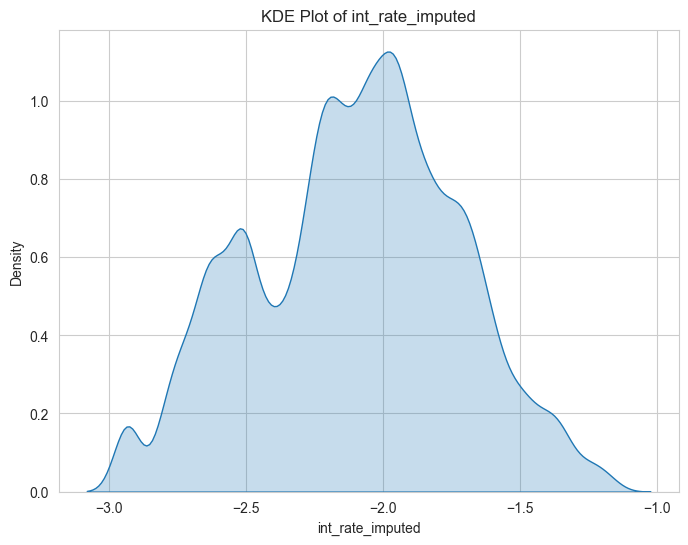

In [240]:
plot_kde(fintech_df_2, 'int_rate_imputed')

### grade

In [241]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

In [242]:
fintech_df_2['grade'].isna().sum()

0

### issue_date

In [243]:
fintech_df_2['issue_date'].unique()

array(['14 August 2014', '17 July 2017', '12 December 2012',
       '12 November 2012', '19 September 2019', '17 January 2017',
       '13 November 2013', '16 December 2016', '15 March 2015',
       '17 March 2017', '19 April 2019', '15 December 2015',
       '15 January 2015', '18 June 2018', '15 November 2015',
       '14 November 2014', '16 February 2016', '15 February 2015',
       '14 February 2014', '18 October 2018', '17 September 2017',
       '18 August 2018', '16 March 2016', '16 May 2016', '17 June 2017',
       '15 October 2015', '16 August 2016', '15 September 2015',
       '17 May 2017', '18 April 2018', '17 August 2017',
       '17 December 2017', '18 December 2018', '14 October 2014',
       '15 June 2015', '19 January 2019', '18 February 2018',
       '19 July 2019', '16 June 2016', '13 June 2013', '17 November 2017',
       '19 June 2019', '19 October 2019', '19 March 2019',
       '18 November 2018', '13 May 2013', '15 July 2015',
       '18 September 2018', '17 Apri

In [244]:
fintech_df_2['issue_date'].isna().sum()

0

In [245]:
def clean_issue_date(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    Clean the issue date column in the given DataFrame by converting it to a datetime object.

    Args:
    - df (pd.DataFrame): The DataFrame containing the issue date column.
    - col_name (str): The name of the issue date column.

    Returns:
    pd.DataFrame: The DataFrame with the issue date column cleaned.
    """
    
    df[f'{col_name}_cleaned'] = pd.to_datetime(df[col_name])
    return df

In [246]:
fintech_df_2 = clean_issue_date(fintech_df_2, 'issue_date')

In [247]:
fintech_df_2['issue_date_cleaned'].unique()

<DatetimeArray>
['2014-08-14 00:00:00', '2017-07-17 00:00:00', '2012-12-12 00:00:00',
 '2012-11-12 00:00:00', '2019-09-19 00:00:00', '2017-01-17 00:00:00',
 '2013-11-13 00:00:00', '2016-12-16 00:00:00', '2015-03-15 00:00:00',
 '2017-03-17 00:00:00', '2019-04-19 00:00:00', '2015-12-15 00:00:00',
 '2015-01-15 00:00:00', '2018-06-18 00:00:00', '2015-11-15 00:00:00',
 '2014-11-14 00:00:00', '2016-02-16 00:00:00', '2015-02-15 00:00:00',
 '2014-02-14 00:00:00', '2018-10-18 00:00:00', '2017-09-17 00:00:00',
 '2018-08-18 00:00:00', '2016-03-16 00:00:00', '2016-05-16 00:00:00',
 '2017-06-17 00:00:00', '2015-10-15 00:00:00', '2016-08-16 00:00:00',
 '2015-09-15 00:00:00', '2017-05-17 00:00:00', '2018-04-18 00:00:00',
 '2017-08-17 00:00:00', '2017-12-17 00:00:00', '2018-12-18 00:00:00',
 '2014-10-14 00:00:00', '2015-06-15 00:00:00', '2019-01-19 00:00:00',
 '2018-02-18 00:00:00', '2019-07-19 00:00:00', '2016-06-16 00:00:00',
 '2013-06-13 00:00:00', '2017-11-17 00:00:00', '2019-06-19 00:00:00',
 '20

### pymnt_plan

In [248]:
fintech_df_2['pymnt_plan'].unique()

array([False,  True])

In [249]:
fintech_df_2['pymnt_plan'].isna().sum()

0

In [250]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'pymnt_plan')

In [251]:
fintech_df_2['pymnt_plan_labelEncoded'].unique()

array([0, 1], dtype=int8)

In [252]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
...,...,...,...
99,state,WI,47
100,state,WV,48
101,state,WY,49
102,pymnt_plan,False,0


### type

In [253]:
fintech_df_2['type'].unique()

array(['INDIVIDUAL', 'Individual', 'Joint App', 'JOINT', 'DIRECT_PAY'],
      dtype=object)

In [254]:
fintech_df_2['type'].isna().sum()

0

In [255]:
def standardize_loan_type(df: pd.DataFrame, type_col: str) -> pd.DataFrame:
    """
    Standardize loan type by mapping it to a correct value which has no inconsistencies.

    Args:
    - df (pd.DataFrame): The DataFrame containing the loan type column.
    - type_col (str): The name of the column containing the loan type.

    Returns:
    pd.DataFrame: The DataFrame with the loan type standardized.
    """

    type_mapping = {
        'INDIVIDUAL': 'Individual',
        'Individual': 'Individual',
        'JOINT': 'Joint',
        'Joint App': 'Joint',
        'DIRECT_PAY': 'Direct_Pay'
    }

    df[f'{type_col}_standardized'] = df[type_col].replace(type_mapping)
    
    return df

In [256]:
fintech_df_2 = standardize_loan_type(fintech_df_2, 'type')

In [257]:
fintech_df_2['type_standardized'].unique()

array(['Individual', 'Joint', 'Direct_Pay'], dtype=object)

#### Encode

I chose one-hot encoding for the `type` column, which has values like "Individual," "Joint," and "Direct Pay," because these categories represent distinct types of loan arrangements without any obvious inherent order. Using label encoding could imply a ranking between these types, which does not seem to exist clearly. One-hot encoding ensures that each category is treated independently, allowing the model to understand that these are separate, non-ordinal options for loan type.

In [258]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'type_standardized')

In [259]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
...,...,...,...
99,state,WI,47
100,state,WV,48
101,state,WY,49
102,pymnt_plan,False,0


### purpose

In [260]:
fintech_df_2['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'major_purchase', 'small_business', 'medical', 'vacation', 'car',
       'moving', 'house', 'wedding', 'renewable_energy'], dtype=object)

In [261]:
fintech_df_2['purpose'].nunique()

13

In [262]:
fintech_df_2['purpose'].isna().sum()

0

#### Encode

I used one-hot encoding for the `purpose` column because it contains various categories, such as "car," "moving," "house," "wedding," and "renewable energy," which represent distinct purposes for the loan without any natural or meaningful order. Label encoding could imply a hierarchy or ranking among these purposes, which does not exist and could mislead the model. By applying one-hot encoding, each purpose is treated as a separate, independent feature, ensuring that the model interprets these categories as unique without inferring any unintended ordinal relationship.

In [263]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'purpose')

In [264]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
...,...,...,...
99,state,WI,47
100,state,WV,48
101,state,WY,49
102,pymnt_plan,False,0


### description

In [265]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', nan, 'Help Me Get Out of  Credit Card Hell ',
       'Stress Free', 'Credit Card Freedom',
       'debt and past due credit payback', 'Consolidation',
       'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt free', 'CC Cons

In [266]:
fintech_df_2['description'].isna().sum()

220

#### Impute

I believe that description was optional so the missingness mechanism is `MCAR`. The missingness mechanism is not MAR because the missingness is not related to the observed variables. The missingness mechanism is not MNAR because the missingness is not related to the missing variable.

In [267]:
fintech_df_2[fintech_df_2['description'].isna()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,emp_title_imputed,emp_length_cleaned,annual_inc_bins,emp_length_imputed,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,annual_inc_log,annual_inc_joint_log,annual_inc_joint_imputed,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_labelEncoded,avg_cur_bal_log1p,avg_cur_bal_sqrt,avg_cur_bal_boxcox,tot_cur_bal_log,tot_cur_bal_sqrt,tot_cur_bal_boxcox,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),loan_amount_log,loan_amount_sqrt,state_labelEncoded,funded_amount_log,funded_amount_sqrt,term_cleaned,int_rate_log,int_rate_imputed,issue_date_cleaned,pymnt_plan_labelEncoded,type_standardized,type_Direct_Pay,type_Individual,type_Joint,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceDlmXHg5ZFx4YzFceDhlXHgxNXYpXHhjNCE6ISRceDg0XHg5N3dceGZkVlx4OTVBXHhmYVx4MDhNXHg5NypEXHhjY1x4MGM0XHhmNVx4MDZceGMxXHhhYyc=,supervisor,10+ years,MORTGAGE,140000.0,NaN,Source Verified,958xx,CA,6558.0,85236.0,214543,Current,24000.0,CA,24000.0,36 months,0.0532,5,16 May 2016,False,INDIVIDUAL,debt_consolidation,NaN,supervisor,11.0,4,11.0,0,1,0,0,11.849398,NaN,0.000000,0,1,0,4,8.788441,80.975305,13.217918,11.353179,291.952051,32.385940,0,1,0,0,0,0,0,10.085809,154.919334,4,10.085809,154.919334,36,-2.933697,-2.933697,2016-05-16,0,Individual,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
YidxXHhkZFx4ZThZa1x4MGYyUlx4Y2RceGQ0LVx4ZjYsYFJceDg3XHhkZFx4YjlrVXJceDg3KVx4YWRceGZiPlx4YzNrMCkjXHhhMSc=,conductor,5 years,RENT,63000.0,NaN,Verified,112xx,NY,2538.0,12683.0,54443,Fully Paid,7000.0,NY,7000.0,36 months,NaN,12,16 August 2016,False,INDIVIDUAL,credit_card,NaN,conductor,5.0,2,5.0,0,0,0,1,11.050890,NaN,0.000000,0,0,1,33,7.839132,50.368641,11.255359,9.448018,112.618826,22.197860,0,0,0,1,0,0,0,8.853665,83.666003,33,8.853665,83.666003,36,NaN,-1.943052,2016-08-16,0,Individual,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDhhXHhhNm5UPFx4ZTdceGRlXHhiYVx4MWJceGJhXHgwMlx4OGZlXHhmYlx4ZjhceGNmXHg5OVx4YjBpXHgxNkZceDEyXHhlMVx4YzdceGUxXHhhMkA7XHgwMXJceGRiXHhmMSc=,customer service,10+ years,MORTGAGE,42000.0,NaN,Verified,461xx,IN,16351.0,163501.0,125202,Current,12000.0,IN,12000.0,60 months,0.1199,11,16 April 2016,False,INDIVIDUAL,credit_card,NaN,customer service,11.0,0,11.0,0,1,0,0,10.645425,NaN,0.000000,0,0,1,14,9.702044,127.867119,15.266662,12.004574,404.352569,36.649689,0,1,0,0,0,0,0,9.392662,109.544512,14,9.392662,109.544512,60,-2.121097,-2.121097,2016-04-16,0,Individual,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDEwXHhkNlx4YzRceDgyXHhmMVx4MTV8RHdcclx4ZGNaXHhiYlx4ZDkiXHhmNlx4ZmZceDE4XHhmYT14XHg4NFx4YWVceGI1M1wnXHgxZFx4YzBceGNmJFx4ODFceDkxJw==,account payable specialist,10+ years,RENT,56000.0,NaN,Source Verified,119xx,NY,3266.0,39182.0,88022,Current,10000.0,NY,10000.0,36 months,0.0916,6,16 June 2016,False,INDIVIDUAL,debt_consolidation,NaN,account payable specialist,11.0,1,11.0,0,0,0,1,10.933107,NaN,0.000000,0,1,0,33,8.091321,57.140179,11.760960,10.575973,197.944437,27.849922,0,1,0,0,0,0,0,9.210340,100.000000,33,9.210340,100.000000,36,-2.390324,-2.390324,2016-06-16,0,Individual,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
YidceDhiXHhjZlx4MThjXHhlYlx4ZWJceGFjeVx4YzRceGM4XHhhNS1ceDExXHhhMlx4ZGZ+bTtceGFmXHhlYVx4ODFceDk4fFx4N2Zwdlx4YjJceGFmXHg5MFx4ZWI0cCc=,mason helper,10+ years,RENT,80000.0,NaN,Source Verified,104xx,NY,2996.0,56905.0,245288,Current,30000.0,NY,30000.0,60 months,0.1449,12,

we will just fill in the missing values with a default value which is `No Description`

In [268]:
def impute_description(df: pd.DataFrame, desc_col: str) -> pd.DataFrame:
    """
    This function imputes missing values in the description column of a given DataFrame with the value = 'No Description'.

    Args:
    - df (pd.DataFrame): The input DataFrame.
    - desc_col (str): The name of the column that contains the description.

    Returns:
    pd.DataFrame: The input DataFrame with missing values in the description column imputed.
    """

    df[f'{desc_col}_imputed'] = df[desc_col].fillna('No Description')
    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = [desc_col]
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = ['No Description']
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    return df

In [269]:
fintech_df_2 = impute_description(fintech_df_2, 'description')

In [270]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', nan, 'Help Me Get Out of  Credit Card Hell ',
       'Stress Free', 'Credit Card Freedom',
       'debt and past due credit payback', 'Consolidation',
       'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt free', 'CC Cons

In [271]:
fintech_df_2['description_imputed'].isna().sum()

0

# Data Transformation and Feature Engineering

## Add 4 Columns

### Add Month Number

In [272]:
def add_month_col(df: pd.DataFrame, date_col_name: str,  month_col_name: str) -> pd.DataFrame:
    """
    This function adds a new column to a given DataFrame with the month of the date in the specified
    date column.

    Args:
    - df (pd.DataFrame): The DataFrame to which the new column will be added.
    - date_col_name (str): The name of the column containing the date.
    - month_col_name (str): The name of the new column that will contain the month of the date.

    Returns:
    - pd.DataFrame: The DataFrame with the new column added.
    """
    
    df[month_col_name] = df[date_col_name].dt.month
    return df

In [273]:
fintech_df_2 = add_month_col(fintech_df_2, 'issue_date_cleaned', 'issue_month')

### Can Salary Cover

In [274]:
fintech_df_2[['annual_inc', 'annual_inc_joint_imputed', 'loan_amount']]

,annual_inc,annual_inc_joint_imputed,loan_amount
customer_id,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,80000.0,0.000000,6000.0
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,75384.0,0.000000,15000.0
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,33800.0,0.000000,11500.0
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,50000.0,0.000000,18000.0
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,75000.0,11.982929,25000.0
...,...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,85000.0,0.000000,35000.0
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,50000.0,0.000000,10000.0
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,60000.0,0.000000,13000.0


In [275]:
global_lookup_table[global_lookup_table['Column']=='type']['Encoded'].values

array([], dtype=object)

In [276]:
def can_salary_cover(df: pd.DataFrame, 
                     annual_income_col: str, 
                     loan_amount_col: str, 
                     annual_joint_col: str,
                     type_col: str) -> pd.DataFrame:
    """
    This function checks if the annual income can cover the loan amount based on the loan type.

    Args:
    - df (pd.DataFrame): The input DataFrame containing the data.
    - annual_income_col (str): The column name for the annual income.
    - loan_amount_col (str): The column name for the loan amount.
    - annual_joint_col (str): The column name for the annual joint income.
    - type_col (str): The column name for the loan type.

    Returns:
    - pd.DataFrame: The input DataFrame with an additional column 'salary_can_cover' indicating whether the annual
    income can cover the loan amount.
    """

    def salary_cover(row: pd.Series) -> bool:
        """
        This function checks if the annual income can cover the loan amount.

        Args:
        - row (pd.Series): The row containing the annual income and loan amount.

        Returns:
        - bool: True if the annual income can cover the loan amount, False otherwise.
        """

        # for i, encoded_col in enumerate(encoded_loan_type_cols):
        #     if row[encoded_col] == 1:
        #         loan_type = original_loan_type_cols[i]
        #         break
        loan_type = row[type_col]
        # print(loan_type)
        loan_amount = row[loan_amount_col]
        # print(loan_amount)
        
        if loan_type == "Joint":
            return row[annual_joint_col] >= loan_amount
        elif loan_type == "Individual" or loan_type == "Direct_Pay":
            return row[annual_income_col] >= loan_amount
        else:
            return False

    # encoded_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Encoded'].values
    # orignal_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Original'].values
    # encoded_loan_type_cols = ['type_Individual', 'type_Direct Pay', 'type_Joint']
    # original_loan_type_cols = ['Individual', 'Direct Pay', 'Joint']
    df['salary_can_cover'] = df.apply(salary_cover, axis=1).astype(int)
    
    return df

In [277]:
fintech_df_2 = can_salary_cover(
    df=fintech_df_2, 
    annual_income_col='annual_inc', 
    loan_amount_col='loan_amount', 
    annual_joint_col='annual_inc_joint',
    type_col='type_standardized')

In [278]:
fintech_df_2[['annual_inc', 'annual_inc_joint_imputed', 'loan_amount', 'salary_can_cover']][fintech_df_2['salary_can_cover']==False]

,annual_inc,annual_inc_joint_imputed,loan_amount,salary_can_cover
customer_id,,,,
Yic/XHgwZlx4ZGNceDg5XHhhMFdbbFx4YjlceDdmXHgwZlx4ZWNceGFmXHgwN1x4ZWVceGY1VVx4YmZceDFiXHhkMVx4ZTNceDEyfXFceDExXHhhOWElXHhhY2lceDk4XHhhNic=,19965.0,0.0,23850.0,0
YidyM3lceGRjV3hceGUxXHhmMFx4OTlceGQ1XHg4M1x4OTg1XHgwMlx4ZWVcXFx4OWZceDllXHhkMFx4ODVcdFx4Y2RceGZjXHhlMVx4MTFlXHhiY1x4YTBceGQ3clx4ZjVccic=,35000.0,0.0,39225.0,0
YidceGU3KVx4ODRceGQyezdceDE4XHhlNlx4OWNzO1x4YmJceGU0XHhkYVx4OTVceDA0Ilx4ZjlceDk2XHg5N0BmXHhlMVx4ZTNcJ1x4ZDlceGE3XHg4YVx4YTRceDhmXHhjYlx4OWQn,19888.0,0.0,20000.0,0


### Letter Grade

In [279]:
def change_number_to_grade(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function converts a numerical column to a letter grade column.

    Args:
    - df (pd.DataFrame): The DataFrame containing the numerical column to be converted.
    - col_name (str): The name of the numerical column to be converted.

    Returns:
    pd.DataFrame: The DataFrame with the numerical column converted to a letter grade column.
    """

    grade_mapping = {
        'A': range(1,6),
        'B': range(6,11),
        'C': range(11,16),
        'D': range(16,21),
        'E': range(21,26),
        'F': range(26,31),
        'G': range(31,36)
    }
    def get_grade(x: int) -> str:
        for k, v in grade_mapping.items():
            if x in v:
                return k

    df['letter_grade'] = df[col_name].apply(lambda x: get_grade(x))
    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    rows = [{'Column': 'grade', 'Original': num, 'Encoded': k} for k, v in grade_mapping.items() for num in v]
    lookup_table = pd.concat([lookup_table, pd.DataFrame(rows)], ignore_index=True)
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)

    return df

In [280]:
fintech_df_2 = change_number_to_grade(fintech_df_2, 'grade')

In [281]:
fintech_df_2[['grade', 'letter_grade']]

,grade,letter_grade
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,4,A
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,20,D
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,7,B
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,23,E
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,10,B
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,17,D
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,6,B
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,1,A


In [282]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'letter_grade', need_to_sort=True)

In [283]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,annual_inc_joint,NaN,0
2,addr_state,AK,0
3,addr_state,AL,1
4,addr_state,AR,2
...,...,...,...
142,letter_grade,C,2
143,letter_grade,D,3
144,letter_grade,E,4
145,letter_grade,F,5


In [284]:
global_lookup_table[global_lookup_table['Column']=='grade']  

,Column,Original,Encoded
105,grade,1,A
106,grade,2,A
107,grade,3,A
108,grade,4,A
109,grade,5,A
110,grade,6,B
111,grade,7,B
112,grade,8,B
113,grade,9,B
114,grade,10,B


### Installment per month

In [285]:
fintech_df_2['term_cleaned'].unique()

array([36, 60])

In [286]:
def calculate_installment_per_month(df: pd.DataFrame, loan_amount_col: str, term_col: str, int_rate_col_imputed: str) -> pd.DataFrame:
    """
    This function calculates the monthly installment amount for each loan based on the loan amount, term, and interest rate.

    Args:
    - df (pd.DataFrame): The input DataFrame containing the loan data.
    - loan_amount_col (str): The column name for the loan amount.
    - term_col (str): The column name for the loan term.
    - int_rate_col_imputed (str): The column name for the imputed interest rate.

    Returns:
    - pd.DataFrame: The input DataFrame with an additional column 'installment_per_month' containing the monthly installment amount.
    """
    
    r = np.exp(df[int_rate_col_imputed])/12
    n = df[term_col]
    P = df[loan_amount_col]
    numerator = r * (1+r)**n
    denominator = (1+r)**n - 1
    df['installment_per_month'] = P * (numerator/denominator)
    return df

In [287]:
fintech_df_2 = calculate_installment_per_month(fintech_df_2, 'loan_amount', 'term_cleaned', 'int_rate_imputed')

In [288]:
fintech_df_2['installment_per_month']

customer_id
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=                                            183.866709
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=                        381.391179
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=                    377.258142
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn                                                    491.935058
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn                                552.454473
                                                                                                                                     

In [289]:
for col in fintech_df_2.columns:
    if(fintech_df_2[col].isna().sum() > 0):
        print(col, fintech_df_2[col].isna().sum())

emp_title 2328
emp_length 1832
annual_inc_joint 25170
int_rate 1185
description 220
emp_length_cleaned 1832
annual_inc_joint_log 25170
int_rate_log 1185


## Normalization

In [290]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize_columns(df: pd.DataFrame, numeric_cols: List[str], norm_type: str='minmax') -> pd.DataFrame:
    """
    Normalizes specified numeric columns in the dataframe using Min-Max or Z-score scaling.
    
    Parameters:
    - df: DataFrame to be normalized
    - numeric_cols: List of column names to be normalized
    - norm_type: Type of normalization ('minmax' or 'z-score')
    
    Returns:
    - DataFrame with normalized columns
    """
    assert norm_type in ['minmax', 'z-score'], 'Invalid normalization type. Choose either "minmax" or "z-score".'
    
    if norm_type == 'minmax':
        scaler = MinMaxScaler()
    else: 
        scaler = StandardScaler()

    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df


In [291]:
fintech_df_2.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'emp_title_imputed',
       'emp_length_cleaned', 'annual_inc_bins', 'emp_length_imputed',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'annual_inc_log', 'annual_inc_joint_log',
       'annual_inc_joint_imputed', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_labelEncoded', 'avg_cur_bal_log1p', 'avg_cur_bal_sqrt',
       'avg_cur_bal_boxcox', 'tot_cur_bal_log', 'tot_cur_bal_sqrt',
       'tot_cur_bal_boxcox', 'loan_status_Charged Off', 'loan_status_Current',
       'loan_status_Default', 'loan_s

In [292]:
numeric_cols = ['annual_inc_log', 'annual_inc_joint_imputed', 'avg_cur_bal_log1p', 'avg_cur_bal_boxcox', 'tot_cur_bal_log', 'tot_cur_bal_boxcox', 'loan_amount_log','loan_amount_sqrt', 'funded_amount_log','funded_amount_sqrt', 'int_rate_imputed', 'installment_per_month']
fintech_df_2 = normalize_columns(fintech_df_2, numeric_cols, norm_type='minmax')


I used MinMax scaling for my numeric columns, even for those that were transformed whether by log or box-cox, to bring all features to the same scale. This was particularly important because some variables, like income, had very large values before transformation, while others, like interest rate, were much smaller in magnitude. By scaling everything to a range, I ensured that each feature contributes more evenly in analyses or models, preventing features with inherently larger values from dominating those with smaller scales.

# Bonus Task

In [293]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_state_names(url: str) -> dict:
    """
    This function takes a URL as input, scrapes the webpage, and returns a dictionary of state abbreviations and names.

    Args:
    url (str): The URL of the webpage to scrape.

    Returns:
    dict: A dictionary where the keys are state abbreviations and the values are state names.
    """

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rows = soup.find_all('tr')[1:] 
    state_dict = {}
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 3:
            state_name = cols[0].text.strip()
            state_abbreviation = cols[2].text.strip()
            state_dict[state_abbreviation] = state_name
    return state_dict

def add_state_names(df: pd.DataFrame, state_col: str, url: str) -> pd.DataFrame:
    """
    This function adds a new column to the DataFrame containing the state names based on the state abbreviations.

    Args:
    df (pd.DataFrame): The DataFrame to add the state names to.
    state_col (str): The column name containing the state abbreviations.
    url (str): The URL of the webpage to scrape.

    Returns:
    pd.DataFrame: The DataFrame with the added state names column.
    """

    state_dict = get_state_names(url)
    df['state_name'] = df[state_col].map(state_dict)
    return df

url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"

fintech_df_2 = add_state_names(fintech_df_2, 'state', url)



In [294]:
fintech_df_2[['state', 'state_name']]

,state,state_name
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,FL,Florida
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,VA,Virginia
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,NY,New York
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,NJ,New Jersey
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,TX,Texas
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,NJ,New Jersey
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,CT,Connecticut
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,WI,Wisconsin


# Remove the uneeded columns

In [295]:
fintech_df_2.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'emp_title_imputed',
       'emp_length_cleaned', 'annual_inc_bins', 'emp_length_imputed',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'annual_inc_log', 'annual_inc_joint_log',
       'annual_inc_joint_imputed', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_labelEncoded', 'avg_cur_bal_log1p', 'avg_cur_bal_sqrt',
       'avg_cur_bal_boxcox', 'tot_cur_bal_log', 'tot_cur_bal_sqrt',
       'tot_cur_bal_boxcox', 'loan_status_Charged Off', 'loan_status_Current',
       'loan_status_Default', 'loan_s

In [296]:
keyword = 'home_ownership'
[col for col in fintech_df_2.columns if keyword in col]

['home_ownership',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT']

In [297]:
cols_to_keep = [
    'emp_title_imputed', 
    'emp_length_imputed',
    'home_ownership_ANY',
    'home_ownership_MORTGAGE',
    'home_ownership_OWN',
    'home_ownership_RENT',
    'annual_inc_log',
    'annual_inc_joint_imputed',
    'verification_status_Not Verified',
    'verification_status_Source Verified',
    'verification_status_Verified',
    'zip_code',
    'addr_state_labelEncoded',
    'avg_cur_bal_boxcox',
    'tot_cur_bal_boxcox',
    'loan_id',
    'loan_status_Charged Off',
    'loan_status_Current',
    'loan_status_Default',
    'loan_status_Fully Paid',
    'loan_status_In Grace Period',
    'loan_status_Late (16-30 days)',
    'loan_status_Late (31-120 days)',
    'loan_amount_sqrt',
    'state_labelEncoded',
    'funded_amount_sqrt',
    'term_cleaned',
    'int_rate_imputed',
    'grade',
    'issue_date_cleaned',
    # 'pymnt_plan_cleaned',
    'pymnt_plan_labelEncoded',
    'type_Direct_Pay',
    'type_Individual',
    'type_Joint',
    'purpose_car',
    'purpose_credit_card',
    'purpose_debt_consolidation',
    'purpose_home_improvement',
    'purpose_house',
    'purpose_major_purchase',
    'purpose_medical',
    'purpose_moving',
    'purpose_other',
    'purpose_renewable_energy',
    'purpose_small_business',
    'purpose_vacation',
    'purpose_wedding',
    'description_imputed',
    'issue_month',
    'salary_can_cover',
    'letter_grade_labelEncoded',
    'installment_per_month',
    'state_name'
]

fintech_df_3 = fintech_df_2[cols_to_keep]

In [298]:
fintech_df_3.isna().sum()

emp_title_imputed                      0
emp_length_imputed                     0
home_ownership_ANY                     0
home_ownership_MORTGAGE                0
home_ownership_OWN                     0
home_ownership_RENT                    0
annual_inc_log                         0
annual_inc_joint_imputed               0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
zip_code                               0
addr_state_labelEncoded                0
avg_cur_bal_boxcox                     0
tot_cur_bal_boxcox                     0
loan_id                                0
loan_status_Charged Off                0
loan_status_Current                    0
loan_status_Default                    0
loan_status_Fully Paid                 0
loan_status_In Grace Period            0
loan_status_Late (16-30 days)          0
loan_status_Late (31-120 days)         0
loan_amount_sqrt                       0
state_labelEncod

In [299]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns in a pandas DataFrame.

    Args:
    - df (pd.DataFrame): The DataFrame to rename columns in.
    
    Returns:
    pd.DataFrame: The DataFrame with renamed columns.
    """
    
    mapping_dict = {}
    for col in fintech_df_3.columns:
        orig_col_name = get_orig_col_name(col)
        mapping_dict[col] = orig_col_name
        print(f'{col} => {orig_col_name}')
    df = df.rename(columns=mapping_dict)
    return df

In [300]:
fintech_df_3 = rename_columns(fintech_df_3)

emp_title_imputed => emp_title
emp_length_imputed => emp_length
home_ownership_ANY => home_ownership_ANY
home_ownership_MORTGAGE => home_ownership_MORTGAGE
home_ownership_OWN => home_ownership_OWN
home_ownership_RENT => home_ownership_RENT
annual_inc_log => annual_inc
annual_inc_joint_imputed => annual_inc_joint
verification_status_Not Verified => verification_status_Not Verified
verification_status_Source Verified => verification_status_Source Verified
verification_status_Verified => verification_status_Verified
zip_code => zip_code
addr_state_labelEncoded => addr_state
avg_cur_bal_boxcox => avg_cur_bal
tot_cur_bal_boxcox => tot_cur_bal
loan_id => loan_id
loan_status_Charged Off => loan_status_Charged Off
loan_status_Current => loan_status_Current
loan_status_Default => loan_status_Default
loan_status_Fully Paid => loan_status_Fully Paid
loan_status_In Grace Period => loan_status_In Grace Period
loan_status_Late (16-30 days) => loan_status_Late (16-30 days)
loan_status_Late (31-120 da

In [301]:
fintech_df_3.columns

Index(['emp_title', 'emp_length', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc', 'annual_inc_joint', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'zip_code', 'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id',
       'loan_status_Charged Off', 'loan_status_Current', 'loan_status_Default',
       'loan_status_Fully Paid', 'loan_status_In Grace Period',
       'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type_Direct_Pay', 'type_Individual',
       'type_Joint', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
     

I left the grade column in the final df because I believe that it is needed as one cannot decode the letter_grade back to original grade as each letter grade consists of a range of numerical grades so I left it in the final df

In [302]:
fintech_df_3.shape

(27030, 53)

# Save the cleaned dataset

In [303]:
fintech_df_3.to_csv('fintech_data_MET_P2_52_1008_clean.csv')

In [304]:
global_lookup_table.to_csv('lookup_table_MET_P2_52_1008.csv')